# Programming

In the development of my project, I’ve leveraged various programming paradigms that have influenced my design decisions and problem-solving approaches. Here’s a brief discussion on how they’ve been utilized:

**Procedural Programming**: This is evident in the use of libraries like pandas, numpy, and matplotlib, where I’ve written sequences of instructions to manipulate data. For instance, pandas, a library based on this paradigm, has been used for data manipulation and analysis.

**Object-Oriented Programming (OOP)**: Python, the language I’ve used, is inherently object-oriented. I’ve used classes and objects implicitly while using libraries like scikit-learn and XGBoost. These libraries use the principles of OOP such as encapsulation and polymorphism to provide a clean interface for model training and prediction.

**Functional Programming**: This paradigm is visible in my use of functions as first-class objects in Python, for example, passing functions as arguments to other functions like backtesting_forecaster and backtesting_forecaster_multiseries from the skforecast library.

**Declarative Programming**: This is evident in my use of libraries like plotly for data visualization. In plotly, I declare what I want to happen (e.g., create a scatter plot), and the library takes care of how it happens.

These paradigms have helped me in various ways. Procedural programming made the data manipulation and preprocessing straightforward. Object-oriented programming allowed me to leverage the power of classes and objects to build complex machine learning models with ease. Functional programming made my code more modular and easier to debug and test. Declarative programming saved me time and effort in creating complex visualizations. Overall, the combination of these paradigms made my code more efficient, readable, and maintainable.

### Library import

In [143]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical analysis
import statistics
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import binom
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Machine Learning
import sklearn.preprocessing as preproc
from xgboost import XGBRegressor
from mlforecast import MLForecast
import optuna
from sklearn.linear_model import LinearRegression

# Time Series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error

# Miscellaneous
from itertools import product
from statistics import mean

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Statistics

The first thing we want to do is to load our dataset:

In [2]:
# Import the csv file into the dataframe df
df = pd.read_csv("../Data/Population_estimates_from_1926.csv")

# Display the first 5 rows of df
df.head()

STATISTIC Label  Year Single Year of Age         Sex  \
0  Population estimates from 1926  1926           All ages  Both sexes   
1  Population estimates from 1926  1926           All ages        Male   
2  Population estimates from 1926  1926           All ages      Female   
3  Population estimates from 1926  1926       Under 1 year  Both sexes   
4  Population estimates from 1926  1926       Under 1 year        Male   

     UNIT    VALUE  
0  Number  2971992  
1  Number  1506889  
2  Number  1465103  
3  Number    55391  
4  Number    28084

The head function gave us an idea of what the dataset looks like, let's check its dimension:

In [3]:
# Dysplay the shape of our dataset
df.shape

(11817, 6)

Let's now see the type of each column, the presence of null values and unique values for each column:

In [4]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


Another important thing we want to look at is the presence of null values:

In [5]:
# Display sum of null values for each column
df.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

Looking at the dataset we see that some of the rows and columns might be unwanted, we then plot unique values for each column:

In [6]:
# Printing of unique values per column
for i in df.columns:
    print(i + ": ")
    print(df[i].unique())
    print("\n")

STATISTIC Label: 
['Population estimates from 1926']


Year: 
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Single Year of Age: 
['All ages' 'Under 1 year' '1 year' '2 years' '3 years' '4 years'
 '5 years' '6 years' '7 years' '8 years' '9 years' '10 years' '11 years'
 '12 years' '13 years' '14 years' '15 years' '16 years' '17 years'
 '18 years' '19 years' '20 years' '21 years' '22 years' '23 years'
 '24 years' '25 years' '26 years' '27 years' '28 years' '29 years'
 '30 years' '31 years' '32 years' '33 years' '34 years' '35 years'
 '36 years' '37 years' '38 years' '39 years' '40 years' '41 years'
 '42 years' '43 years' '44 years' '45 years' '46 years' '47 years'
 '48 years' '49 years' '50 years' '51 years' '52 years' '53 years'
 '54 years' '55 years' '56 years' '57 years' '58 years' '59 years'
 '60 years' '61 years' '62 years' '63 yea

So far we can say that our dataset contains population data in Ireland (people living in Ireland) from 1923 to 2023. We also get information of population age and sex.

Let's see the data distribution when using the describe function

In [7]:
# Display data distribution
df.describe()

Year         VALUE
count  11817.000000  1.181700e+04
mean    1996.410256  5.352461e+04
std       24.463165  2.867754e+05
min     1926.000000  6.000000e+00
25%     1986.000000  1.242700e+04
50%     2004.000000  2.667500e+04
75%     2014.000000  3.557700e+04
max     2023.000000  5.281612e+06

The data we see from the describe function is missleading for multiple reasons:
- the VALUE column represents the population number but the describe function doesn't take into account that we have duplicate values in our datasets (due to data being split on male, female and both sexes)
- descriptive data of the year column doesn't gives us much information, descriptive data for sex and/or age would be more helpful

Before diving into a more detailed descriptive analysis of our dataset, we need to do some transformation to our dataset.
Let's start by demonstrating that the population count of both sexes is equal to the population count of each sex

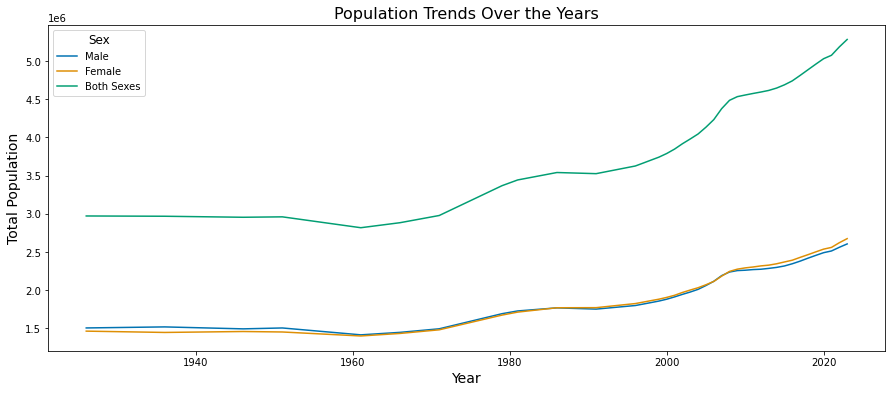

In [8]:
# Filter the DataFrame for rows where Sex is male, female, or both sexes
male_df = df[(df['Sex'] == 'Male') & (df['Single Year of Age'] == 'All ages')]
female_df = df[(df['Sex'] == 'Female') & (df['Single Year of Age'] == 'All ages')]
both_sexes_df = df[(df['Sex'] == 'Both sexes') & (df['Single Year of Age'] == 'All ages')]

# Group by Year and calculate the sum of VALUE for males, females, and both sexes for each year
male_df_grouped = male_df.groupby('Year')['VALUE'].sum()
female_df_grouped = female_df.groupby('Year')['VALUE'].sum()
both_sexes_df_grouped = both_sexes_df.groupby('Year')['VALUE'].sum()

# Create separate figures for better clarity
fig, ax = plt.subplots(figsize=(15, 6))

# Use a color palette that is colorblind-friendly
palette = sns.color_palette("colorblind")

# Plot separate lines for male, female, and both sexes
sns.lineplot(data=male_df_grouped, label="Male", color=palette[0], ax=ax)
sns.lineplot(data=female_df_grouped, label="Female", color=palette[1], ax=ax)
sns.lineplot(data=both_sexes_df_grouped, label="Both Sexes", color=palette[2], ax=ax)

# Increase the font size for labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Population', fontsize=14)
ax.set_title('Population Trends Over the Years', fontsize=16)

# Improve legend placement and add a title
ax.legend(title='Sex', title_fontsize='12')

plt.show()

Above graph shows how population changes over years but it is not the best visualization to demonstrate that, in our dataset, the sum of male and female population is the same to both sexes in each year. 

To do so a stacked bar chard is more suitable:

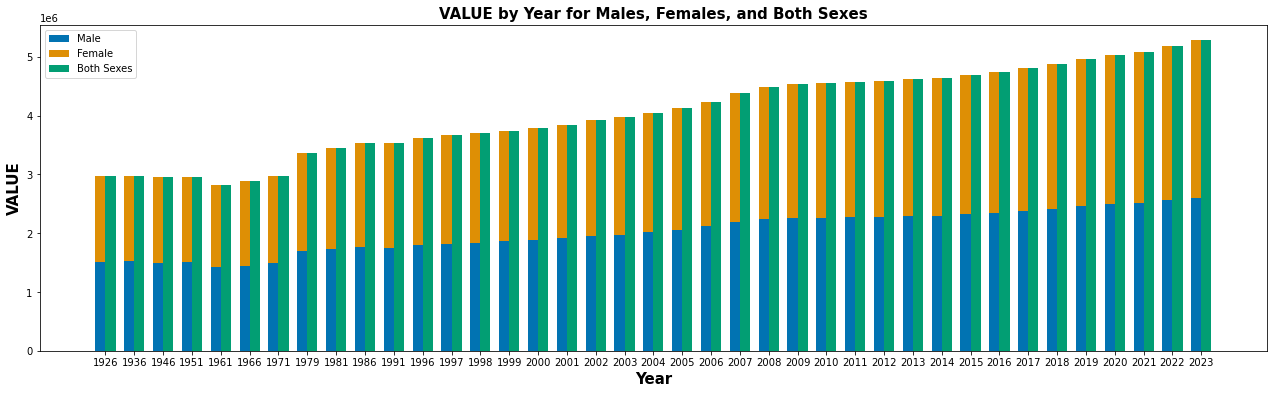

In [9]:
# Group by Year and calculate the sum of VALUE for males, females, and both sexes for each year
male_df_grouped = male_df_grouped.reset_index()
female_df_grouped = female_df_grouped.reset_index()
both_sexes_df_grouped = both_sexes_df_grouped.reset_index()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = male_df_grouped.index
r2 = [x for x in r1]
r3 = [x + bar_width for x in r1]

# Use a color palette that is colorblind-friendly
palette = sns.color_palette("colorblind")

# Create a grouped bar plot with stacked bars for male and female
plt.figure(figsize=(22, 6))
plt.bar(r1, male_df_grouped['VALUE'], width=bar_width, label='Male', color=palette[0])
plt.bar(r2, female_df_grouped['VALUE'], bottom=male_df_grouped['VALUE'], width=bar_width, label='Female', color=palette[1])
plt.bar(r3, both_sexes_df_grouped['VALUE'], width=bar_width, label='Both Sexes', color=palette[2])

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(male_df_grouped))], male_df_grouped['Year'])

plt.ylabel('VALUE', fontweight='bold', fontsize=15)
plt.title('VALUE by Year for Males, Females, and Both Sexes', fontweight='bold', fontsize=15)

# Create legend & Show graphic
plt.legend()
plt.show()

At this point we can proceed with a descriptive analysis for either male, female or both sexes.

Let's see, for example, the average population for each of those categories over time:

In [9]:
# This information can help us understand the central tendency and distribution of the male population data.
male_df.describe()

Year         VALUE
count    39.000000  3.900000e+01
mean   1996.410256  2.018926e+06
std      24.781910  3.548980e+05
min    1926.000000  1.416549e+06
25%    1988.500000  1.761554e+06
50%    2004.000000  2.011914e+06
75%    2013.500000  2.292586e+06
max    2023.000000  2.606170e+06

In [10]:
# This information can help us understand the central tendency and distribution of the female population data.
female_df.describe()

Year         VALUE
count    39.000000  3.900000e+01
mean   1996.410256  2.035564e+06
std      24.781910  3.824662e+05
min    1926.000000  1.401792e+06
25%    1988.500000  1.771627e+06
50%    2004.000000  2.033274e+06
75%    2013.500000  2.337468e+06
max    2023.000000  2.675442e+06

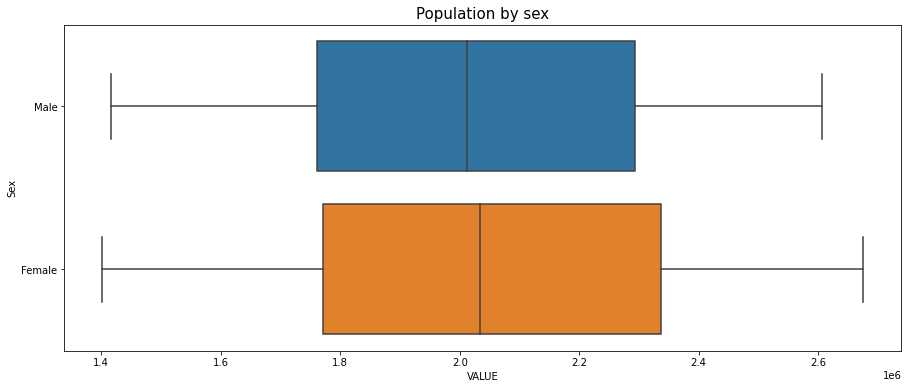

In [11]:
# This plots an horizontal boxplot for male and femals population data

male_female_df = df[(df['Single Year of Age'] == 'All ages') & (df['Sex'] != 'Both sexes')]

plt.figure(figsize=(15, 6))
sns.boxplot(y='Sex', x='VALUE', data=male_female_df)  # Swap x and y variables

plt.title('Population by sex', fontsize=15)
plt.show()

Previous boxplot actually shows population data by sex.
For instance we can say that:
- The minimum population recorded for males and females is about the same while the maximum recorded population for female is higher
- The average female population is higher than the male one

Those are interesting information to look at that couldn't be obtained with previously plotted graphs.

We now obtained multiple info on how female population differs from the male one. But what about how the age infuelces the population value? 

So far we filtered our datasets using the "All ages filter" on the "Single Year of Age" column but we are missing very useful data here. This is mainly because that column is showed as string and not int, let's map it and reduce the columns to the ones we really care.

With the new dataset it would be nice to now to get some descriptive data on the ages. Let's try to perform this analysis without considering the sex of the population

In [12]:
# This subset of data focuses on age-related population statistics for both sexes.
both_sexes_age_df = df[(df['Sex'] == 'Both sexes') & (df['Single Year of Age'] != 'All ages')]

# Next, a dictionary 'age_mapping' is created and used to create a numerica variable "Age"
age_mapping = {age: i for i, age in enumerate(both_sexes_age_df["Single Year of Age"].unique())}
both_sexes_age_df['Age'] = both_sexes_age_df['Single Year of Age'].map(age_mapping)
both_sexes_age_df = both_sexes_age_df[["Year", "Single Year of Age", "Age", "Sex", "VALUE"]]
both_sexes_age_df.describe()

Year          Age         VALUE
count  3900.000000  3900.000000   3900.000000
mean   1996.410256    49.500000  40544.895641
std      24.465267    28.869772  23783.909198
min    1926.000000     0.000000     65.000000
25%    1986.000000    24.750000  20827.500000
50%    2004.000000    49.500000  45819.500000
75%    2014.000000    74.250000  60653.750000
max    2023.000000    99.000000  87281.000000

The describe function doesn't provide us the relevant information we are looking for because we have a compressed dataset where, for each year and age, we represent the number of the population.

To have actual results from this function, we would need to explode the datasets and have "VALUE" x "Age" rows for each age in each year. This would take a long time, instead we apply some mathematical calculation.

First thing we do is to group population by age, so that we know the number of people with a specific age over time:

In [13]:
# The DataFrame is grouped by 'Age', and the sum of 'VALUE' is calculated for each age group
both_sexes_age_df_grouped = both_sexes_age_df.groupby('Age')['VALUE'].sum()

# Initialize variables
weighted_sum = 0
total_population = 0

# Loop through the age groups to calculate the weighted sum of age * population and the total population
for i in range(len(both_sexes_age_df_grouped)):
    weighted_sum += i * both_sexes_age_df_grouped[i]
    total_population += both_sexes_age_df_grouped[i]

# Calculate the mean population age by dividing the weighted sum by the total population.
mean_age = weighted_sum / total_population

# Print the calculated mean population age with two decimal places.
print(f"Mean Population: {mean_age:.2f} years")

Mean Population: 34.95 years


An alternative way to compute the same average would have been:

In [14]:
# Calculate the weighted sum of age * population
weighted_sum = (both_sexes_age_df['Age'] * both_sexes_age_df['VALUE']).sum()

# Calculate the total population
total_population = both_sexes_age_df['VALUE'].sum()

# Calculate the mean population age
mean_age = weighted_sum / total_population

print(f"Mean Population: {mean_age:.2f} years")

Mean Population: 34.95 years


Let's try to perform the same analysis for years in the last decade (2013, 2018 and 2023):

In [15]:
def mean_age_by_year(year):
    # Calculate filtered df for given year
    both_sexes_age_year_df = both_sexes_age_df[both_sexes_age_df["Year"]==year]
    # Calculate the weighted sum of age * population
    weighted_sum_year = (both_sexes_age_year_df['Age'] * both_sexes_age_year_df['VALUE']).sum()
    # Calculate the total population
    total_population_year = both_sexes_age_year_df['VALUE'].sum()
    # Calculate the mean population age
    mean_age_year = weighted_sum_year / total_population_year
    
    return mean_age_year

for i in [2013, 2018, 2023]:
    print(f"Mean population age in {i} is {mean_age_by_year(i):.2f} years")

Mean population age in 2013 is 36.07 years
Mean population age in 2018 is 37.25 years
Mean population age in 2023 is 38.61 years


It's very interesting to see how the mean population age has been increasing in the last decade, meaning that our population is getting older.

We will use this information for further analysis.

Let's now also compute the median and the mode of the population age over time:

In [16]:
# Calculate the cumulative distribution of population counts and add it as a new column 
both_sexes_age_df['Cumulative_Population'] = both_sexes_age_df['VALUE'].cumsum()

# Find the median age by calculating the age where the cumulative population reaches half of the total population.
median_population = both_sexes_age_df['VALUE'].sum() / 2
median_age = both_sexes_age_df[both_sexes_age_df['Cumulative_Population'] >= median_population]['Age'].iloc[0]

print(f"Median population age is {median_age} years")

# Find the mode age by identifying the age with the highest population count.
mode_index = both_sexes_age_df['VALUE'].idxmax()
mode_age = both_sexes_age_df.loc[mode_index, "Age"]

print(f"Mode population age is {mode_age} years")

# Calculate the weighted mean by summing the products of age and population, divided by the total population.
weighted_mean = (both_sexes_age_df['Age'] * both_sexes_age_df['VALUE']).sum() / both_sexes_age_df['VALUE'].sum()

# Calculate the weighted standard deviation using the formula for a weighted standard deviation.
squared_deviations = ((both_sexes_age_df['Age'] - weighted_mean) ** 2) * both_sexes_age_df['VALUE']
weighted_std_dev = (squared_deviations.sum() / both_sexes_age_df['VALUE'].sum()) ** 0.5

print(f"Weighted standard deviation: {weighted_std_dev:.2f} years")

Median population age is 30 years
Mode population age is 43 years
Weighted standard deviation: 22.41 years


- **Mean**: The mean age is the average age of the population. It is calculated by adding up all the ages and dividing by the total number of people in the population. If the mean age is increasing over time, it may suggest that the population is aging, and the older generations are becoming a larger proportion of the population.

- **Median**: The median age is the middle age in a population when ages are sorted from youngest to oldest. It divides the population into two equal halves. If the median age is increasing, it suggests that the population is aging, as the midpoint of ages is moving toward older individuals.

- **Mode**: The mode is the age that appears most frequently in the population. When the mode age is increasing, it could indicate that there is a growing cohort of people at a specific age, which may be due to factors like increased birth rates during a certain period or immigration trends.

- **Weighted Standard Deviation**: The weighted standard deviation is a measure of the spread or dispersion of ages in the population, with each age category weighted by its relative frequency in the population. A higher standard deviation indicates greater variability in ages, which may imply a more diverse age structure in the population.

Here's what these statistics can tell us:

As the mean age increased over time, it suggests that the population is aging, which can have various implications for healthcare, retirement, and labor force dynamics.

As standard deviation is not too low, it suggests a broader range of ages in the population.

To confirm the previous statement on the aging of the population, let's see the notmalized population over time and specific years in the last decade: 

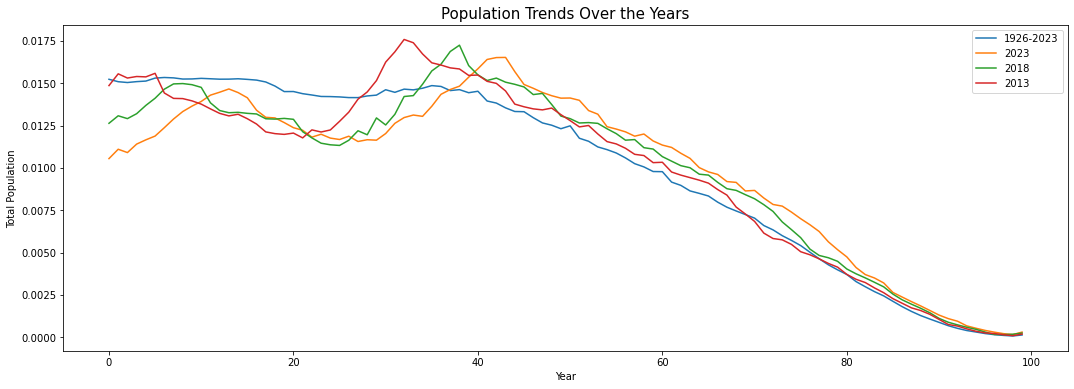

In [17]:
# Calculate the total population distribution for multiple years and normalizing it to obtain a relarive proportion.

total_population_df = both_sexes_age_df.groupby("Age")["VALUE"].sum()
total_population_df = total_population_df/total_population_df.sum()

total_population_2023_df = both_sexes_age_df[both_sexes_age_df["Year"]==2023].groupby("Age")["VALUE"].sum()
total_population_2023_df = total_population_2023_df/total_population_2023_df.sum()

total_population_2018_df = both_sexes_age_df[both_sexes_age_df["Year"]==2018].groupby("Age")["VALUE"].sum()
total_population_2018_df = total_population_2018_df/total_population_2018_df.sum()

total_population_2013_df = both_sexes_age_df[both_sexes_age_df["Year"]==2013].groupby("Age")["VALUE"].sum()
total_population_2013_df = total_population_2013_df/total_population_2013_df.sum()

# Create a line plot to visualize population trends over the years, including 1926-2023, 2023, 2018, and 2013.
plt.figure(figsize=(18, 6))
sns.lineplot(data=total_population_df, label="1926-2023")
sns.lineplot(data=total_population_2023_df, label="2023")
sns.lineplot(data=total_population_2018_df, label="2018")
sns.lineplot(data=total_population_2013_df, label="2013")
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over the Years', fontsize=15)
plt.legend()
plt.show()

As the age is becoming more and more skewed towards the right, we have and older population showing up in last years.

### Poisson distribution

The Poisson distribution is often used to model count data, such as the number of events or occurrences within a fixed interval. As we have data on population growth, we can model it as a Poisson distribution. Each year represents a fixed interval, and the number of births can be counted as events within that interval.

The problem we want to solve is:
- In Ireland there are, in average, mean_births a year. If we watch Ireland any random year, what is the probability of having new births less than the average (mean_births)?

This is how the problem is configured:
- Numer of elements = number of births
- Specific place = in the world
- Time frame = per year

The idea is to first of all compute the mean_births (λ) of the new births population from 1923 to 2023. This will be used as the mean of our Poisson distribution.

Once we got the λ we configure the compute the following two problems:
- In Ireland there are, in average, λ a year. If we watch Ireland any random year from 1926 to 2023, what is the probability of having new births less than λ?
- In Ireland there are, in average, λ a year. If we watch Ireland any random year from last decade (2013 to 2023), what is the probability of having new births less than λ?

The idea is to demonstrata that this probability is much lower in the last decade with respect than to all years.

In [19]:
# Let's filter our dataset only for Age = 0
new_births_df = both_sexes_age_df[both_sexes_age_df["Age"]==0].groupby(["Year", "VALUE"]).sum().reset_index()

# Calculate the mean (λ) of the Poisson distribution from the data
λ = new_births_df['VALUE'].mean()

# Calculate the probability, in a year, to have less births that the average births
probability = poisson.cdf(k = λ, mu= λ)

print(f"The probability, in a random year, to have less that {λ:.0f} births is: {probability:.2f}")

The probability, in a random year, to have less that 61764 births is: 0.50


The previous result makes totally sense given that we were computing the probability on the average.
What we are interested to see is if the same probability still applies for the last decade.

What we want to see now is if the probability of having the same number of births is still the same for the last decade:

In [20]:
# Let's filter our dataset only for Age = 0 and last decade
new_births_last_decade_df = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]>=2013)].groupby(["Year", "VALUE"]).sum().reset_index()

# Calculate the mean (λ) for the last decade
λ_last_decade = new_births_last_decade_df['VALUE'].mean()

# Calculate the probability, in a year, to have less births that the average births
probability_last_decade = poisson.cdf(k = λ, mu= λ_last_decade)

print(f"The probability, in a random year from last decade, to have less that {λ:.0f} births is: {probability_last_decade:.2f}")

The probability, in a random year from last decade, to have less that 61764 births is: 0.95


This data is extremelly helpful to let us understand that one of the reasoning of aging is due to the fact that new births are decreasing:

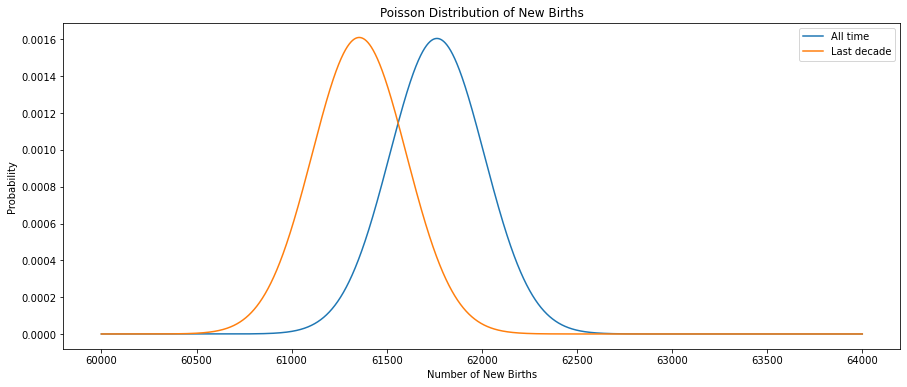

In [21]:
# Fit the Poisson distribution to the data
poisson_dist = poisson(mu=λ)
poisson_dist_last_decade = poisson(mu=λ_last_decade)

# Generate a range of values for the x-axis (number of births)
x = np.arange(60000, 64000)

# Calculate the probability mass function (PMF) for each value of x
pmf = poisson_dist.pmf(x)
pmf_last_decade = poisson_dist_last_decade.pmf(x)

# Plot the Poisson PMF
plt.figure(figsize=(15, 6))
plt.plot(x, pmf, label="All time")
plt.plot(x, pmf_last_decade, label="Last decade")
plt.xlabel('Number of New Births')
plt.ylabel('Probability')
plt.title('Poisson Distribution of New Births')
plt.legend()
plt.show()

### Binomial distribution

Still looking at newborn data, it would be interesting to see, for each year, if we randomly choose 500 people what is the probability to encounter at least 10 new born.

Let's first of all try to solve this problem for the year 2023.

It is know that, in 2023, about 1% of the population is newborn. If we randomly choose 500 people. What is the probability to have at least 10 newbors?

- number of people = number of elements
- newbord = characteristic or attribute
- within 500 people = limit

To compute the binomial distribution the first thing we need to calculate is p. p represents the new born population % in 2023:

In [22]:
# newborn
n = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]==2023)]["VALUE"].values[0]
# total population
t = both_sexes_age_df[both_sexes_age_df["Year"]==2023]["VALUE"].sum()
# percentage of newborn
p = n/t

We can now compute the distribution:

In [23]:
# P(X>10)
result_2023 = binom.sf(k=9, n=500, p=p)

print(f"The probability of finding at least 10 newbors out of 500 people in 2023 is {result_2023*100:.0f}%")

The probability of finding at least 10 newbors out of 500 people in 2023 is 4%


Let's now see what happens for other years

In [24]:
binomial_dict = {}

for i in both_sexes_age_df["Year"].unique():   
    # newborn
    n = both_sexes_age_df[(both_sexes_age_df["Age"]==0) & (both_sexes_age_df["Year"]==i)]["VALUE"].values[0]
    # total population
    t = both_sexes_age_df[both_sexes_age_df["Year"]==i]["VALUE"].sum()
    # percentage of newborn
    p = n/t
    # binomial result
    r = binom.sf(k=9, n=500, p=p)
    
    binomial_dict[i] = r

binomial_dict contains the probability, for each year available from 1926 to 2023, to obey to the rules of the stated problem.

Let's try to better visualize the results with a plot:

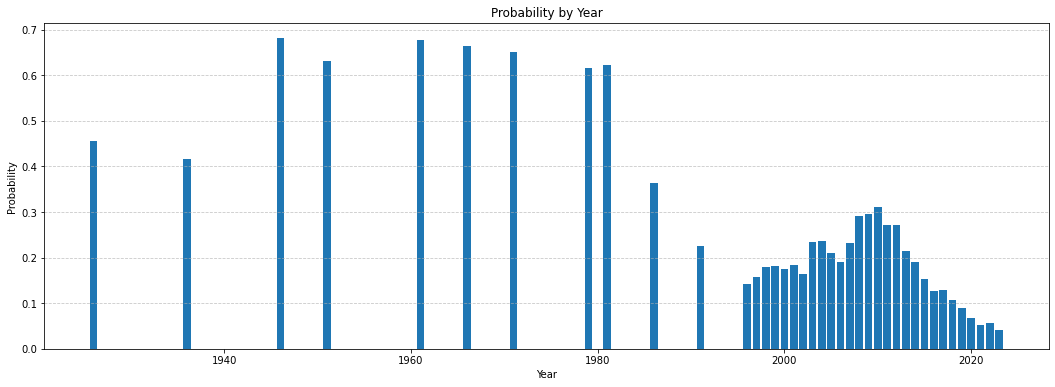

In [25]:
# Convert the dictionary to a DataFrame
df_prob = pd.DataFrame(binomial_dict.items(), columns=["Year", "Probability"])

# Plotting a bar chart for the "Probability" column
plt.figure(figsize=(18, 6))  # Set the figure size
plt.bar(df_prob["Year"], df_prob["Probability"])
plt.xlabel("Year")
plt.ylabel("Probability")
plt.title("Probability by Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.show()

It is clear from previous graph how this probability is decresing in the last few years.

Another very important information we didn't discuss so far is the data available, we start to have a yearly data only from 1996. This will be important during the cleaning process for ML.

### Normal distribution

To use normal distribution we should first of all understand if we have some variable in our dataset that is normally distributed.

The variables we will be looking at are:
- Population over time
- Population average age over time
- Newborn population over time

To check if the data is normally distributed we will use two methods:
- Q-Q Plot
- Shapiro-Wilk Normality Test

A Q-Q plot compares the distribution of the data to a normal distribution by plotting the quantiles of the data against the quantiles of the normal distribution. If the data is normally distributed, the points on the plot will form a straight line.

The Shapiro-Wilk Normality Test measures the difference between the observed distribution and the expected normal distribution. This test produces a p-value that, if less than a significance level, rejects the null hypothesis and conclude that the data is not normally distributed. For our study, we configure the significance level at 0.05 (means we are willing to accept a 5% chance of rejecting the null hypothesis when it's true).

Population over time

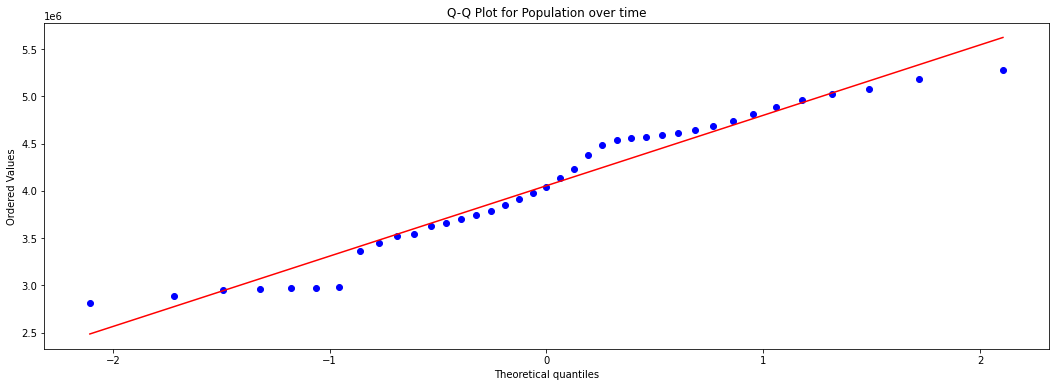

The Population over time data may follow a normal distribution (p-value: 0.0517).


In [26]:
# Select rows where "Single Year of Age" is "All ages" and "Sex" is "Both sexes," and extract "Year" and "VALUE" columns
poo = df[(df["Single Year of Age"] == "All ages") & (df["Sex"] == "Both sexes")].loc[:, ["Year", "VALUE"]]

# Extract the "VALUE" column
data = poo["VALUE"]

# Perform the Shapiro-Wilk Normality Test
shapiro_stat, shapiro_p = stats.shapiro(data)

# Visualize the data with a Q-Q plot
plt.figure(figsize=(18, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Population over time")
plt.show()

# Check the p-value from the Shapiro-Wilk test and determine normality
if shapiro_p > 0.05:
    print(f"The Population over time data may follow a normal distribution (p-value: {shapiro_p:.4f}).")
else:
    print(f"The Population over time data does not follow a normal distribution (p-value: {shapiro_p:.4f}).")

Given that the p-value is not less than 0.05 and that the Q-Q plot shows that the quantiles of the data are kind of forming a straight-line, we can conclude that the population over time is normally distributed. But what does it mean?

A normally distributed variable is one that frequently occurs within a small range of values, reducing the frequency at the tails due to outliers. 

The graph of a normally distributed variable is a a bell curve and whe can demonstrate this by computing mean and standard deviation:

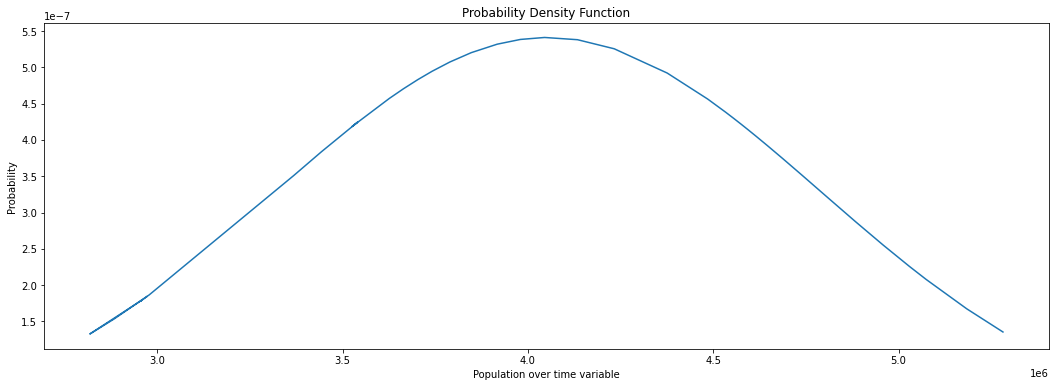

In [27]:
# Calculate the mean and standard deviation of the data
mean = statistics.mean(data)
sd = statistics.stdev(data)

# Plot the probability density function (PDF) of the data using the calculated mean and standard deviation
plt.figure(figsize=(18, 6))
plt.plot(data, norm.pdf(data, mean, sd))

# Add labels to the plot
plt.title('Probability Density Function')
plt.xlabel('Population over time variable')
plt.ylabel('Probability')

# Display the plot
plt.show()

In [28]:
print(f"Mean: {mean:.0f}")
print(f"Std: {sd:.0f}")

Mean: 4054490
Std: 737169


If we want to explain what it means to have a normally distributed data for the population over time variable we can say:
- The simmetry suggests that fluctuations of population over time is balanced, meaning that if there is a year were the population is above average there is also one year where it is below
- There is no high dispersion as the standard deviation value is not big with respect to the mean. This means that there are no years with extremelly low or high population

Overall this analysis allows us to say that the population is growning naturally without any distruptive event creating crazy spikes or deeps of population. Still this analysis doesn't take into consideration the fact that the population is growing because of aging previously analysed.

Newborn population over time

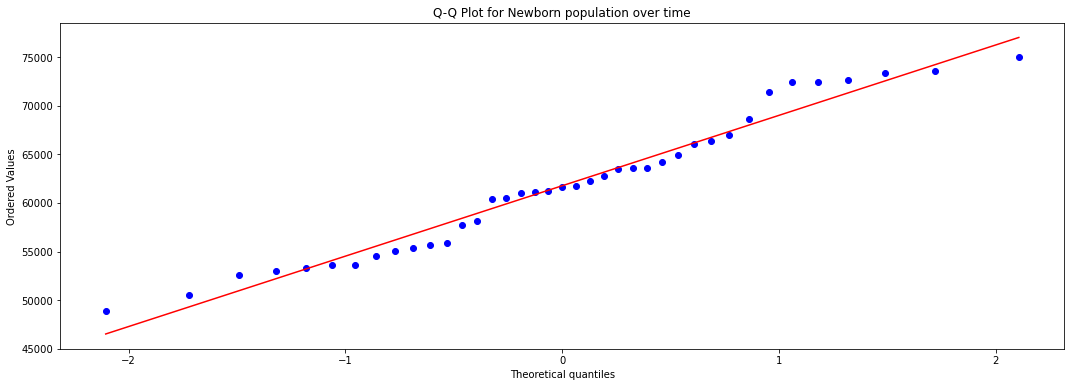

The Newborn population over time data may follow a normal distribution (p-value: 0.1679).


In [29]:
# Create a DataFrame from the 'new_births_year' dictionary
nbpot = pd.DataFrame(new_births_df, columns=["Year", "VALUE"])

# Extract the "VALUE" column
data = nbpot["VALUE"]

# Perform the Shapiro-Wilk Normality Test
shapiro_stat, shapiro_p = stats.shapiro(data)

# Visualize the data with a Q-Q plot
plt.figure(figsize=(18, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Newborn population over time")
plt.show()

# Check the p-value from the Shapiro-Wilk test and determine normality
if shapiro_p > 0.05:
    print(f"The Newborn population over time data may follow a normal distribution (p-value: {shapiro_p:.4f}).")
else:
    print(f"The Newborn population over time data does not follow a normal distribution (p-value: {shapiro_p:.4f}).")

# Data Preparation & Visualisation

We now start to work with the original version of the dataset, having in mind what is our final objective: to prepare our dataset for the population forecasting by age.

We start again by quickly looking at the dataset with the head function:

In [2]:
# import the csv file into the dataframe df
df = pd.read_csv("../Data/Population_estimates_from_1926.csv")

# Quickly show the dataset
df.head()

STATISTIC Label  Year Single Year of Age         Sex  \
0  Population estimates from 1926  1926           All ages  Both sexes   
1  Population estimates from 1926  1926           All ages        Male   
2  Population estimates from 1926  1926           All ages      Female   
3  Population estimates from 1926  1926       Under 1 year  Both sexes   
4  Population estimates from 1926  1926       Under 1 year        Male   

     UNIT    VALUE  
0  Number  2971992  
1  Number  1506889  
2  Number  1465103  
3  Number    55391  
4  Number    28084

As we are interested in the age of the population and not the sex, we immediatelly filter the dataset to obtain relevant data:

In [3]:
# We filter the dataset to get population by age for both sexes
df = df[(df["Single Year of Age"]!="All ages") & (df["Sex"]=="Both sexes")]

We now gain information from the dataset using the info and describe functions

In [4]:
# We aim at understanding the datatypes of available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 3 to 11814
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     3900 non-null   object
 1   Year                3900 non-null   int64 
 2   Single Year of Age  3900 non-null   object
 3   Sex                 3900 non-null   object
 4   UNIT                3900 non-null   object
 5   VALUE               3900 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 213.3+ KB


In [5]:
# We aim at having a statistical description of our dataset
df.describe()

Year         VALUE
count  3900.000000   3900.000000
mean   1996.410256  40544.895641
std      24.465267  23783.909198
min    1926.000000     65.000000
25%    1986.000000  20827.500000
50%    2004.000000  45819.500000
75%    2014.000000  60653.750000
max    2023.000000  87281.000000

From previous functions we realize that numerical features available are only the "Year" and "VALUE", out of other features available we would be interested in the "Single Year of Age" one but at the moment it is a string (object). 

That being said, if we look at results from describe we can say that:
- Given that the min year is 1926, the max is 2023 and the mean is about 1996 we can say that for sure we are missing some population data for years from 1926 to 1996 (as already demonstrated before)
- The mean population si about 40k, this is the mean population considering different ages and multiple years

As we will use this dataset for appropriate forecasting, it is good to see if we have enough samples and/or null values:

In [6]:
# Let's get the shape of the dataset
df.shape

(3900, 6)

In [7]:
# And check if there is any null value
df.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

From previous executions it seems that we don't have null values (like NaN) and the dataset is big enogh given the 3900 samples. Keep in mind that this applies for population data within available years but we already know that we are missing multiple years.

Let's then see what are the unique values for each column:

In [8]:
# Let's loop over column and print unique values
for i in df.columns:
    print(f"Column {i} has following unique values:")
    print(df[i].unique())
    print("\n")

Column STATISTIC Label has following unique values:
['Population estimates from 1926']


Column Year has following unique values:
[1926 1936 1946 1951 1961 1966 1971 1979 1981 1986 1991 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


Column Single Year of Age has following unique values:
['Under 1 year' '1 year' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '10 years' '11 years' '12 years' '13 years'
 '14 years' '15 years' '16 years' '17 years' '18 years' '19 years'
 '20 years' '21 years' '22 years' '23 years' '24 years' '25 years'
 '26 years' '27 years' '28 years' '29 years' '30 years' '31 years'
 '32 years' '33 years' '34 years' '35 years' '36 years' '37 years'
 '38 years' '39 years' '40 years' '41 years' '42 years' '43 years'
 '44 years' '45 years' '46 years' '47 years' '48 years' '49 years'
 '50 years' '51 years' '52 years' '53 years' '54 years' '55 ye

This very quick function allows us to gain multiple relevant data:
- Columns "STATISTIC Label", "Sex" and "UNIT" are useless as they have only static data
- Column "Year" contains missing years, as expected, between 1926 and 1996 
- Column "Single Year of Age" has very helpful data but it must be converted into a numerical value

We will now do some data transformation to have an easier to analyze data for our EDA before mooving into the data preparation for ML.

The only two transformations we will do are:
- Drop of unwanted columns
- Conversion of Single Year of Age into years

In [9]:
# Drop of unwanted columns
df = df.loc[:, ["Year", "Single Year of Age", "VALUE"]]
df.head()

Year Single Year of Age  VALUE
3   1926       Under 1 year  55391
6   1926             1 year  55876
9   1926            2 years  58273
12  1926            3 years  59050
15  1926            4 years  59123

To convert the "Single Year of Age" column into a numeric one we simply create a mapping between string and the numeric value. If we get the numerical order of the unique values we are lucky enough to build a simple mapping function that makes sense.

The mapping would be:
- Under 1 year -> 0
- 1 year -> 1
- 2 years -> 2
- 3 years -> 3
....
- 99 years or over -> 99

In [10]:
# Let's create an age mapping dictionary
age_mapping = {age: i for i, age in enumerate(df["Single Year of Age"].unique())}

print(age_mapping)

{'Under 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10 years': 10, '11 years': 11, '12 years': 12, '13 years': 13, '14 years': 14, '15 years': 15, '16 years': 16, '17 years': 17, '18 years': 18, '19 years': 19, '20 years': 20, '21 years': 21, '22 years': 22, '23 years': 23, '24 years': 24, '25 years': 25, '26 years': 26, '27 years': 27, '28 years': 28, '29 years': 29, '30 years': 30, '31 years': 31, '32 years': 32, '33 years': 33, '34 years': 34, '35 years': 35, '36 years': 36, '37 years': 37, '38 years': 38, '39 years': 39, '40 years': 40, '41 years': 41, '42 years': 42, '43 years': 43, '44 years': 44, '45 years': 45, '46 years': 46, '47 years': 47, '48 years': 48, '49 years': 49, '50 years': 50, '51 years': 51, '52 years': 52, '53 years': 53, '54 years': 54, '55 years': 55, '56 years': 56, '57 years': 57, '58 years': 58, '59 years': 59, '60 years': 60, '61 years': 61, '62 years': 62, '63 yea

In [11]:
# And let's now apply this mapping into the dataset creating a simpler to refer column "Age"
df['Age'] = df['Single Year of Age'].map(age_mapping)
df = df[["Year", "Single Year of Age", "Age", "VALUE"]]

df.head()

Year Single Year of Age  Age  VALUE
3   1926       Under 1 year    0  55391
6   1926             1 year    1  55876
9   1926            2 years    2  58273
12  1926            3 years    3  59050
15  1926            4 years    4  59123

Let's now work on building some visulaizations that will hopefully allow us to gain some valuable insight for our preparation process.

For the first visualization we want to plot the population change, over time, by age. Given that multiple years are available, we will plot a dynamic visualization using the plotly library:

In [12]:
# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
df_grouped = df.groupby(["Age", "Year"])["VALUE"].sum().reset_index()

# Create an interactive bar chart
fig = px.bar(df_grouped, x='Year', y='VALUE', animation_frame='Age',
             title='Population by Year Over Age')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')

# Show the plot
fig.show()

The visualization represents the population distribution over time and ages in Ireland. The x-axis represents the year and the y-axis represents the population. The bars are blue and represent the population at different ages.

This visualization adheres to Tufts Principles by being clear, accurate, and efficient in communicating the information. It simplifies the complex data into an easily interpretable format, highlights the important features, maximizes the data-ink ratio, uses appropriate scales, provides necessary context, and maintains a balance between complexity and readability:

- (Simplify) The chart is simple and easy to understand. It uses a bar chart, which is a common and familiar format. The use of a single color (blue) avoids unnecessary complexity.

- (Highlight the important features) The chart effectively highlights the changes in population over time and across different age groups. The height of the bars directly corresponds to the population, making it easy to compare different years and age groups thanks to the slider.

- (Maximize the data-ink ratio) All ink in the plot presents data, maximizing the data-ink ratio.

- (Appropriate scales) The scales on both axes are linear, which is appropriate for this type of data. The y-axis starts at zero, accurately representing the values.

- (Provide context) The title of the chart provides clear context about what the chart represents. The axes are clearly labeled, providing necessary context for interpreting the bars.

- (Keep a balance between complexity and readability) While the chart presents complex data (population distribution over time and across different age groups), it remains readable and interpretable due to its effective design.

From previous graph we realize that the missing data is well distributed, meaning that we will probably be able to fill missing years looking at adjacents ones. Also we can expect to see some outliers but this will be better seen looking at the box-plots:

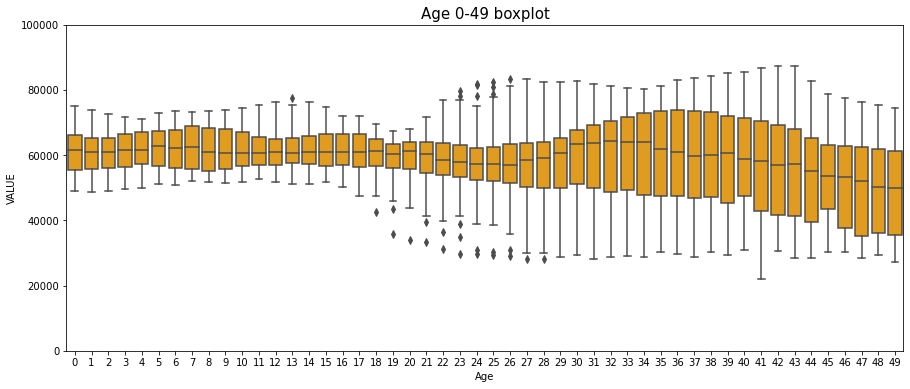

In [13]:
# Boxplot graph for ages from 0 to 49
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=df[df["Age"]<50], color="#FFA500")
plt.title('Age 0-49 boxplot', fontsize=15)
plt.ylim(0,100000)
plt.show()

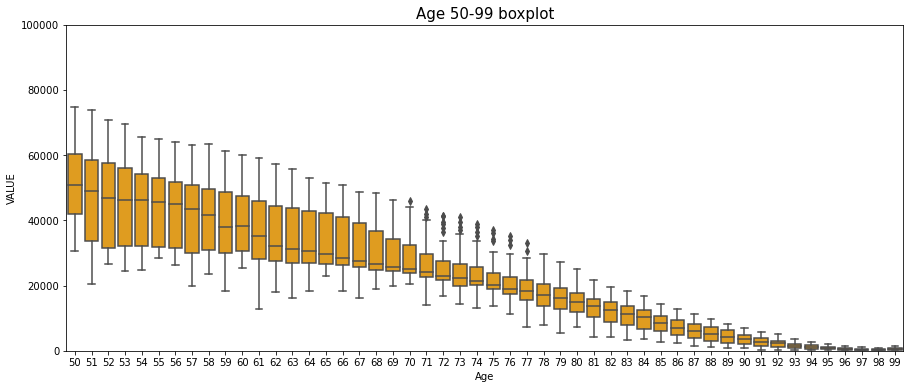

In [14]:
# Boxplot graph for ages from 50 to 99
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=df[(df["Age"]<100) & (df["Age"]>=50)], color="#FFA500")
plt.title('Age 50-99 boxplot', fontsize=15)
plt.ylim(0,100000)
plt.show()

From previous graphs we see that outliers are presents for specific ages but we don't know from which year this is coming from as there could be a subset of years causing multiple outliers.

Below function is built to flag outliers for specific ages when passing the dataframe. Hopefully this will allow us to better spot and then visualize the outliers:

In [15]:
# Create an empty column for outliers
df["outlier"] = "No"

for age in df["Age"].unique():
    # Filter the DataFrame for the specific age
    age_subset = df[df["Age"] == age]
    
    # Calculate Q1 and Q3 for the age subset
    Q1 = age_subset["VALUE"].quantile(0.25)
    Q3 = age_subset["VALUE"].quantile(0.75)
    
    # Calculate the IQR for the age subset
    IQR = Q3 - Q1
    
    # Identify outliers and set the "outlier" column for the age subset
    age_subset["outlier"] = np.where((age_subset["VALUE"] < (Q1 - 1.5 * IQR)) | (age_subset["VALUE"] > (Q3 + 1.5 * IQR)), "Yes", "No")
    
    # Update the original DataFrame with the results for the age subset
    df.loc[df["Age"] == age, "outlier"] = age_subset["outlier"]

Let's now look at the outliers table:

In [16]:
df[df["outlier"]=="Yes"].head()

Year Single Year of Age  Age  VALUE outlier
969   1951           19 years   19  43348     Yes
981   1951           23 years   23  38781     Yes
1269  1961           18 years   18  42696     Yes
1272  1961           19 years   19  35868     Yes
1275  1961           20 years   20  34006     Yes

If we carefully look at the table we can see that outliers come from group of ages in specific years:
- 1951-1966 few ages from 19 to 28
- 2006-2009 few ages from 23 to 26
- 2018-2023 few ages from 70 to 77

This can be better visualized from below graph where we intentinally left blank spots instead of outlier values:

In [17]:
df.loc[(df["Year"]==1926) & (df["Age"]==99), "outlier"] = "Yes"

colors = {'Yes': '#FFA500', 'No': '#636EFA'}

# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
df_grouped = df.groupby(["Year", "Age", "outlier"])["VALUE"].sum().reset_index()

# Create an interactive bar chart
fig = px.bar(df_grouped, x='Age', y='VALUE', animation_frame='Year',
             title='Population by Age Over Year', color='outlier', color_discrete_map=colors)
fig.update_layout(xaxis_title='Age', yaxis_title='Population')

# Show the plot
fig.show()

### Preparation for ML 

From previous EDA we can better prepare the data on the following aspects:
- Filling data for missing years
- Normalizing the population data
- Drop the outliers

Let's start by filling the missing data and then see if we want to proceed with any other data preparation.

We saw that between 1926 and 1996 we are missing a lot of data, more precisely:

In [18]:
delta = 1996 - 1926 - len(df[(df["Year"]>=1926) & (df["Year"]<=1996)]["Year"].unique())

print(f"There are {delta} missing years between 1926 and 1996")

There are 58 missing years between 1926 and 1996


In [19]:
years_available = len(df["Year"].unique())

print(f"There are {years_available} years available in our dataset")

There are 39 years available in our dataset


Given that the number of missing data is greater that the number of total years available, it might be worth just tropping years before 1926. 

But by doing so I'm afraid we would loose valuable data useful for our forecasting model.
Let's then create a second version of the dataset where this data is filled with Linear Interpolation.

Linear interpolation estimates missing values by drawing a straight line between the nearest available data points and filling in the missing values along that line. This is suitable when the population changes relatively smoothly over time.

Let's now find the actual years we need to interpolate:

In [20]:
# Years to be interpolated
all_years = [year for year in range(1926, 2023 + 1)]
years_to_remove = df[(df["Year"]>=1926) & (df["Year"]<=2023)]["Year"].unique()
filtered_years = [year for year in all_years if year not in years_to_remove]

And create a dataframe that we can concatenate with the original one:

In [21]:
# Create an empty list to store data
data = []

# Loop through each year and age, creating a row for each combination
for year in filtered_years:
    for age in range(100):
        data.append([year, age])

# Create the DataFrame
df_missing_years = pd.DataFrame(data, columns=['Year', 'Age'])

In [22]:
df_missing_years

Year  Age
0     1927    0
1     1927    1
2     1927    2
3     1927    3
4     1927    4
...    ...  ...
5895  1995   95
5896  1995   96
5897  1995   97
5898  1995   98
5899  1995   99

[5900 rows x 2 columns]

In [23]:
# We now concatenate previous dataframe and the old one
concat_df = pd.concat([df, df_missing_years]).sort_values(by=["Year", "Age"])
concat_df = concat_df.drop(["Single Year of Age", "outlier"], axis=1)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 3 to 11814
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9800 non-null   int64  
 1   Age     9800 non-null   int64  
 2   VALUE   3900 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 306.2 KB


And let's prepare the concatenated dataset for interpolation (we need to convert the year into a date format):

In [24]:
# First, convert the "Year" column to a datetime object for proper interpolation
concat_df['Year'] = pd.to_datetime(concat_df['Year'], format='%Y')

# Sort the DataFrame by "Year" and "Age" for proper interpolation
concat_df.sort_values(by=['Year', 'Age'], inplace=True)

# Use linear interpolation to fill missing values in the "VALUE" column
concat_df['VALUE'] = concat_df.groupby('Age')['VALUE'].transform(lambda x: x.interpolate())

# Reset the index if needed
concat_df.reset_index(drop=True, inplace=True)

And let's convert the year back to an int (we will see later which format we need):

In [25]:
# Use the .dt.year attribute to extract the year and convert it to an integer
concat_df['Year'] = concat_df['Year'].dt.year

We can now use the "population by age over time" plot we previously used to see the interpolated data:

In [26]:
# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
concat_df_grouped = concat_df.groupby(["Age", "Year"])["VALUE"].sum().reset_index()

# Create an interactive bar chart
fig = px.bar(concat_df_grouped, x='Year', y='VALUE', animation_frame='Age',
             title='Population by Age Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')

# Show the plot
fig.show()

Given that we now added a lot of new syntetic data, it is interesting to check again the boxblot to see if new outliers are available: 

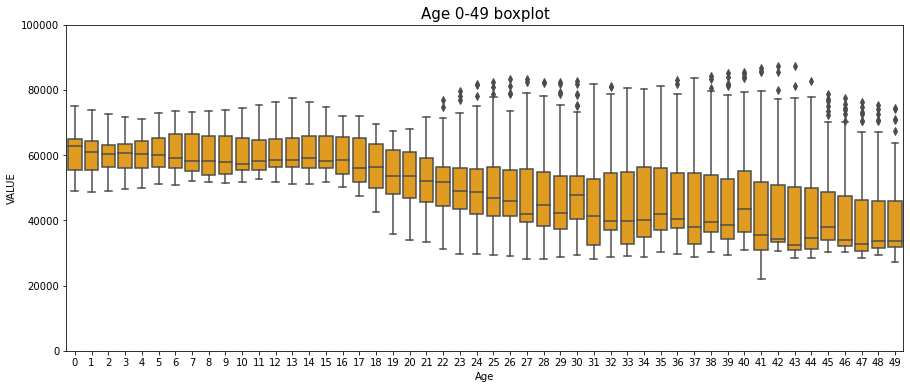

In [27]:
# Boxplot graph for ages from 0 to 49
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=concat_df[concat_df["Age"]<50], color="#FFA500")
plt.title('Age 0-49 boxplot', fontsize=15)
plt.ylim(0,100000)
plt.show()

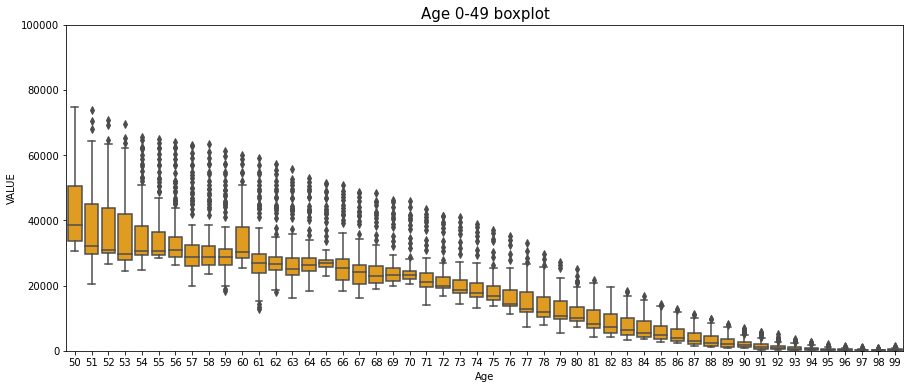

In [28]:
# Boxplot graph for ages from 0 to 49
plt.figure(figsize=(15, 6))
sns.boxplot(x='Age', y ='VALUE', data=concat_df[concat_df["Age"]>=50], color="#FFA500")
plt.title('Age 0-49 boxplot', fontsize=15)
plt.ylim(0,100000)
plt.show()

Indeed there are many more but it would be interesting to see if those new outliers are from syntetic data or not. Let's then see from which years they belong to: 

In [29]:
# Create an empty column for outliers
concat_df["outlier"] = "No"

for age in concat_df["Age"].unique():
    # Filter the DataFrame for the specific age
    age_subset = concat_df[concat_df["Age"] == age]
    
    # Calculate Q1 and Q3 for the age subset
    Q1 = age_subset["VALUE"].quantile(0.25)
    Q3 = age_subset["VALUE"].quantile(0.75)
    
    # Calculate the IQR for the age subset
    IQR = Q3 - Q1
    
    # Identify outliers and set the "outlier" column for the age subset
    age_subset["outlier"] = np.where((age_subset["VALUE"] < (Q1 - 1.5 * IQR)) | (age_subset["VALUE"] > (Q3 + 1.5 * IQR)), "Yes", "No")
    
    # Update the original DataFrame with the results for the age subset
    concat_df.loc[concat_df["Age"] == age, "outlier"] = age_subset["outlier"]

In [30]:
# Assuming you have a DataFrame simple_ages_df with columns 'Year', 'Age_Int', and 'VALUE'
# Group by 'Year' and 'Age_Int' and calculate the sum
concat_df_grouped = concat_df.groupby(["Year", "Age", "outlier"])["VALUE"].sum().reset_index()

# Define a color dictionary
colors = {'Yes': '#FFA500', 'No': '#636EFA'}

# Use the dictionary in the color argument of the plot
fig = px.bar(concat_df_grouped, x='Age', y='VALUE', animation_frame='Year',
             title='Population by Age Over Year', color='outlier',
             color_discrete_map=colors)  # Use the color map
fig.update_layout(xaxis_title='Age', yaxis_title='Population')

# Show the plot
fig.show()

As we can see most of the outliers are identified from the last decade. This means that by filling the missing data we are just weighting more the fact that population is changing much over the following decade. 

Let's see if we can visually spot a reduction in outliers if we only select last decade vs all years:

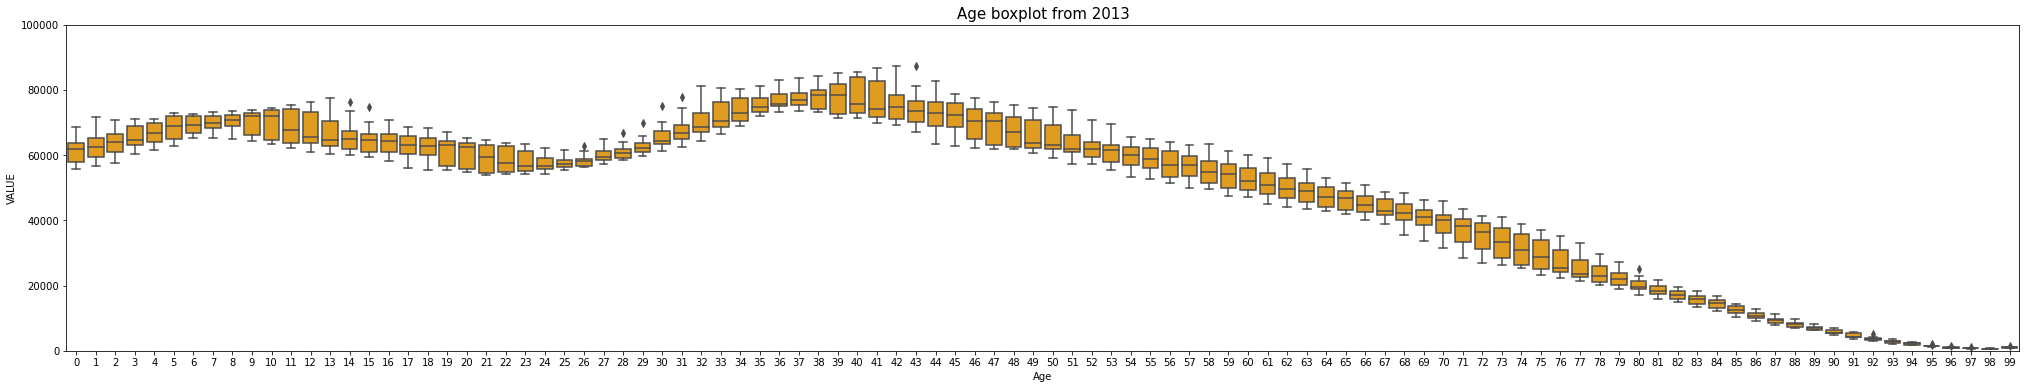

In [31]:
# Box-plot for all ages after 2013
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='VALUE', data=concat_df[concat_df["Year"]>=2013], color="#FFA500")
plt.title('Age boxplot from 2013', fontsize=15)
plt.ylim(0,100000)
plt.show()

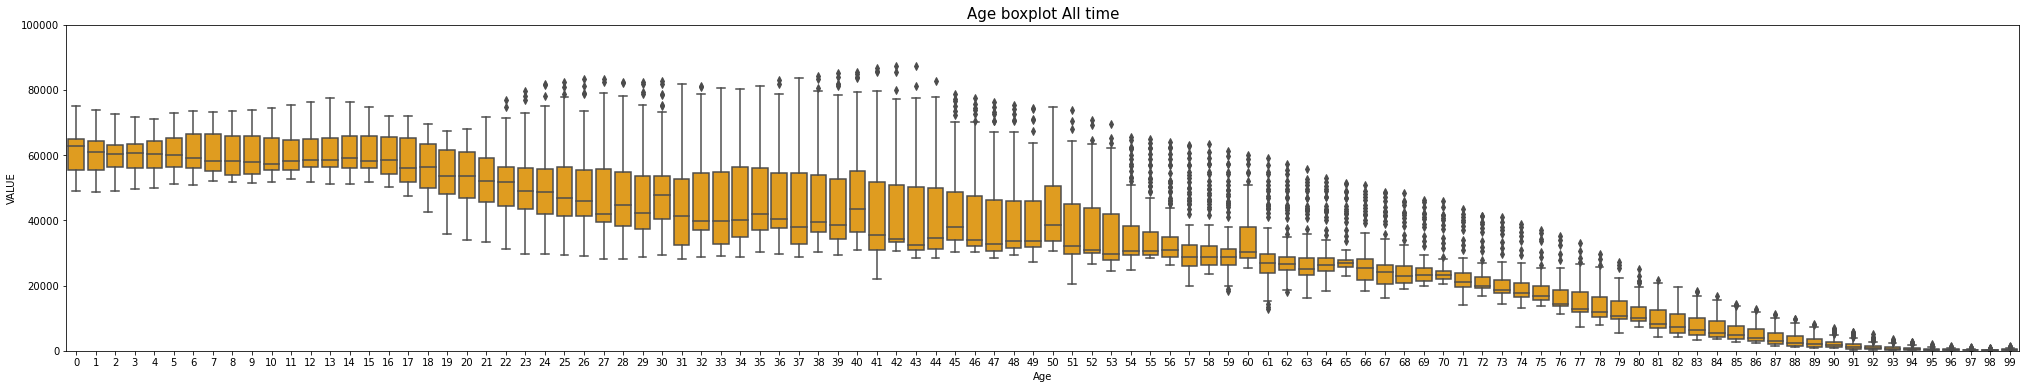

In [32]:
# Box-plot for all ages and all years
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='VALUE', data=concat_df[concat_df["Year"]>=1926], color="#FFA500")
plt.title('Age boxplot All time', fontsize=15)
plt.ylim(0,100000)
plt.show()

It is clearly visible that, taken alone, data from last decade doen't have many outliers. To see if there is any increase in performance, eventually, we will only consider data from last decade.

We know that some of the models we are going to be testing will not need data to be normilized (for example: ARIMA, XGBoost). That being said, it's good practice to test models with both normalized and not normalized data to see if some models would benefit from this normalization.

We now create a version of our dataset that contains the normalized and not normalized data

As we still don't know if the model we will be using is sensitive to normalization or not, we create a second version of the dataset that is normalized.

We decide to use StandardScaler as normalization method so that each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset. We decide to use this method as it is one of the most commonly used.

In [33]:
# Dataset definition for future ml modelling
ml_df = concat_df
ml_df["standardized"]=preproc.StandardScaler().fit_transform(concat_df[["VALUE"]])

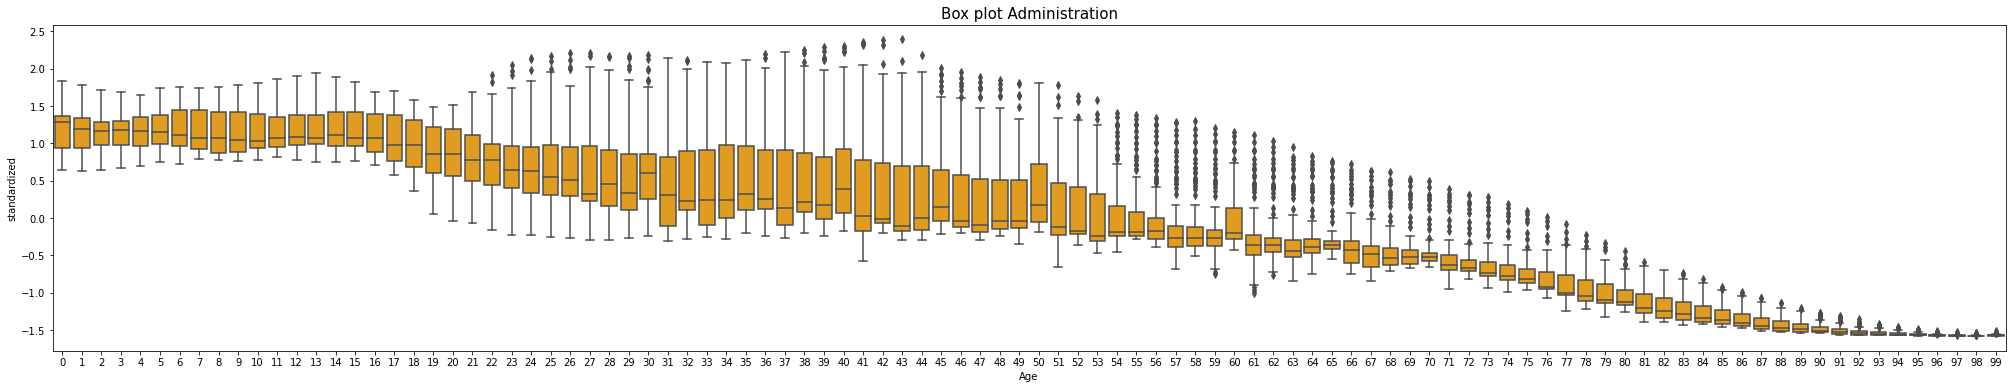

In [34]:
# Box-plot of ml dataset, showing presence of outliers
plt.figure(figsize=(35, 6))
sns.boxplot(x='Age', y ='standardized', data=ml_df,color="#FFA500")
plt.title('Box plot Administration', fontsize=15)
plt.show()

# Machine Learning

Our objective for the modeling is to be able to build a model that allows us to have accurate forecasts of how the population will change in the following 5 years by age.

For this task multiple models will be created, optimized and finally compared:
- Regression
- ARIMA
- VAR
- XGBoost

The following dictionary will be used to store models MSE for further analysis:

In [129]:
MSE_results = {}

### Linear Regression

The very first model we will try to work on is a Linear Regression.

Linear regression can be used for forecasting by treating the time steps as the independent variable and the quantity to be forecasted as the dependent variable.

Let's assume we are only working with a single age. For that age we know the Irish population from 1926 to 2023. Each year is a time step and it is considered to be our independent variable x while y, the actual population for that year, is our dependent variable. 

If instead of the timestamp we use the population data of the previous year as the independent variable x, then we are talking about an autoregressive model that is what we will actually use with ForecasterAutoreg from skforecast.

The linear regression model would then find the best fit line that minimizes the sum of the squared differences between the actual population for different years and the population predicted by the line.

Let's start our computation for Age 0:

In [134]:
# Age 0 df
ml_0_df = ml_df[ml_df["Age"]==0]
ml_0_df = ml_0_df.reset_index(drop=True)

In the following code the ForecasterAutoreg class is used to create a forecaster object that uses the last 10 observations of the time series to predict the next one.

The backtesting_forecaster function is used to evaluate the performance of the forecaster on historical population data. It does this by performing a rolling origin forecast, where the model is trained on an initial training set and then makes a forecast for the next steps observations. 

The training set is then expanded to include these new observations, and the process is repeated until all observations have been forecasted. The mean_absolute_error is used as the metric to evaluate the forecasts.

Parameters are configured as follows:
- y is the time series data you want to forecast. In this case, it’s the “standardized” column from the ml_0_df DataFrame.
- initial_train_size is the number of initial observations to use for training. In this case, it’s 80% of the total number of observations.
- steps is the number of steps ahead to forecast at each iteration. In this case, it’s 5 steps.
- metric is the metric to use for evaluating the forecasts. In this case, it’s the mean absolute error.

The function returns two outputs:
- metric is the mean absolute error of the forecasts.
- preds is an array of the forecasted values.

In [169]:
# Define forecaster
forecaster_lr_0 = ForecasterAutoreg(
                 regressor     = LinearRegression(),
                 lags          = 2
             )

# Backtesting forecaster
metric_lr_0, preds_lr_0 = backtesting_forecaster(
                    forecaster         = forecaster_lr_0,
                    y                  = ml_0_df["standardized"],
                    initial_train_size = int(len(ml_0_df)*0.8),
                    steps              = 5,
                    metric             = 'mean_absolute_error'
                )

  0%|          | 0/4 [00:00<?, ?it/s]

In [170]:
print(f"Mean Absolute Error for age 0 is {metric_lr_0:.4f}")

Mean Absolute Error for age 0 is 0.2036


Now that we understood how to build the model for a single time-series, let's do the same for other ages using the ForecasterAutoregMultiSeries.

before to do so we need to transform and pivot our dataset so that each column is an age time-series:

In [137]:
# Create a copy of the ml_df DataFrame and store it in ml_reg_df while formatting the Year column
ml_reg_df = ml_df.copy()
ml_reg_df['Year'] = pd.to_datetime(ml_reg_df['Year'], format="%Y")

# Pivot the DataFrame to have 'standardized' values as entries, with 'Year' as the index and 'Age' as columns
ml_reg_df = pd.pivot_table(
           data    = ml_reg_df,
           values  = 'standardized',
           index   = 'Year',
           columns = 'Age'
       )

# Column renaming to align with ages
ml_reg_df.columns.name = None
ml_reg_df.columns = [f"age_{col}" for col in ml_reg_df.columns]
ml_reg_df = ml_reg_df.sort_index()
ml_reg_df = ml_reg_df.resample('AS', label='left').asfreq("Y")

ml_reg_df.head()

age_0     age_1     age_2     age_3     age_4     age_5  \
Year                                                                     
1926-01-01  0.939497  0.961567  1.070643  1.106000  1.109322  1.164429   
1927-01-01  0.931374  0.950732  1.052991  1.078538  1.084899  1.137262   
1928-01-01  0.923251  0.939897  1.035340  1.051075  1.060477  1.110095   
1929-01-01  0.915129  0.929062  1.017688  1.023613  1.036054  1.082929   
1930-01-01  0.907006  0.918228  1.000037  0.996151  1.011631  1.055762   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
Year                                                ...                       
1926-01-01  1.146363  0.969030  0.849715  0.917336  ... -1.519737 -1.562967   
1927-01-01  1.116170  0.957084  0.852841  0.913946  ... -1.521657 -1.562976   
1928-01-01  1.085978  0.945139  0.855968  0.910555  ... -1.523578 -1.562985   
1929-01-01  1.055785  0.933194  0.859094  0.907165  ... -1.525498 -1.562994   
1930-01-01  1.025592  0.921249  0.862220  0.903775  ... -1.527418 -1.563003   

              age_92    age_93    age_94    age_95    age_96    age_97  \
Year                                                                     
1926-01-01 -1.561511 -1.568064 -1.568473 -1.569975 -1.572569 -1.576072   
1927-01-01 -1.561779 -1.568018 -1.568746 -1.570293 -1.572682 -1.576150   
1928-01-01 -1.562048 -1.567973 -1.569019 -1.570612 -1.572796 -1.576227   
1929-01-01 -1.562316 -1.567927 -1.569292 -1.570930 -1.572910 -1.576305   
1930-01-01 -1.562585 -1.567882 -1.569565 -1.571249 -1.573024 -1.576382   

            age_98    age_99  
Year                          
1926-01-01 -1.5763 -1.572978  
1927-01-01 -1.5764 -1.573360  
1928-01-01 -1.5765 -1.573743  
1929-01-01 -1.5766 -1.574125  
1930-01-01 -1.5767 -1.574507  

[5 rows x 100 columns]

We can now work on the modelling:

In [144]:
# Define forecaster
forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = LinearRegression(),
                    lags               = 2
                )

# Backtesting forecaster for all items
multi_metric, multi_preds = backtesting_forecaster_multiseries(
                                       forecaster         = forecaster_ms,
                                       series             = ml_reg_df,
                                       levels             = list(ml_reg_df.columns),
                                       steps              = 5,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = int(len(ml_reg_df)*0.8),
                                       show_progress      = True                                   )

# Results
display(multi_metric.head())
print('')
display(multi_preds.head())

  0%|          | 0/4 [00:00<?, ?it/s]

levels  mean_absolute_error
0  age_0             0.197881
1  age_1             0.274731
2  age_2             0.194063
3  age_3             0.143593
4  age_4             0.094390

age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.369092  0.881383  0.931974  0.994942  1.080684  1.046923   
2005-01-01  1.515517  0.865327  0.916168  1.001356  1.125829  1.091717   
2006-01-01  1.623137  0.854645  0.904608  1.005915  1.158749  1.124195   
2007-01-01  1.702225  0.847894  0.896168  1.009115  1.182684  1.147626   
2008-01-01  1.760336  0.844013  0.890023  1.011317  1.200018  1.164412   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.996039  0.855226  0.822514  0.753890  ... -1.410519 -1.452157   
2005-01-01  1.051648  0.877769  0.839994  0.728868  ... -1.403857 -1.447690   
2006-01-01  1.090843  0.894956  0.853902  0.712637  ... -1.399059 -1.444426   
2007-01-01  1.118000  0.908194  0.865166  0.702831  ... -1.395628 -1.442045   
2008-01-01  1.136336  0.918518  0.874466  0.697708  ... -1.393202 -1.440313   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.483917 -1.516583 -1.540379 -1.547751 -1.555146 -1.567991   
2005-01-01 -1.479639 -1.514711 -1.541496 -1.547709 -1.553894 -1.568769   
2006-01-01 -1.476536 -1.513348 -1.542308 -1.547683 -1.552990 -1.569335   
2007-01-01 -1.474296 -1.512358 -1.542897 -1.547667 -1.552341 -1.569746   
2008-01-01 -1.472690 -1.511643 -1.543322 -1.547660 -1.551878 -1.570043   

              age_98    age_99  
2004-01-01 -1.570998 -1.567813  
2005-01-01 -1.571151 -1.569916  
2006-01-01 -1.571266 -1.571441  
2007-01-01 -1.571354 -1.572542  
2008-01-01 -1.571421 -1.573331  

[5 rows x 100 columns]

The reason why we use ForecasterAutoregMultiSeries is because it is used for multivariate time series forecasting. 

This means that, given multiple series of data, we can predict future values of one series based on its own past values as well as the past values of other series.

Let's now see if we can get metric for multiple lags:

In [146]:
# Define a list of lag values to evaluate
lag_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

# Create empty dictionaries to store results
lag_metrics = {}
lag_predictions = {}

# Iterate through different lag values
for lag in lag_values:
    # Define forecaster with the current lag
    forecaster_ms = ForecasterAutoregMultiSeries(
        regressor=LinearRegression(),
        lags=lag
    )

    # Backtesting forecaster for all items
    multi_metric, multi_preds = backtesting_forecaster_multiseries(
        forecaster=forecaster_ms,
        series=ml_reg_df,
        levels=list(ml_reg_df.columns),
        steps=5,
        metric='mean_absolute_error',
        initial_train_size=int(len(ml_reg_df) * 0.8),
        show_progress=True
    )

    # Store the results for the current lag value
    lag_metrics[lag] = multi_metric
    lag_predictions[lag] = multi_preds

# Results for different lag values
for lag, metric_result in lag_metrics.items():
    print(f"Metrics for lag {lag}:")
    display(metric_result.head())
    print("")

for lag, predictions in lag_predictions.items():
    print(f"Predictions for lag {lag}:")
    display(predictions.head())
    print("")

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Metrics for lag 1:


levels  mean_absolute_error
0  age_0             0.179582
1  age_1             0.290790
2  age_2             0.242217
3  age_3             0.184922
4  age_4             0.158716


Metrics for lag 2:


levels  mean_absolute_error
0  age_0             0.197881
1  age_1             0.274731
2  age_2             0.194063
3  age_3             0.143593
4  age_4             0.094390


Metrics for lag 3:


levels  mean_absolute_error
0  age_0             0.219393
1  age_1             0.259126
2  age_2             0.179697
3  age_3             0.145169
4  age_4             0.099113


Metrics for lag 4:


levels  mean_absolute_error
0  age_0             0.216539
1  age_1             0.248539
2  age_2             0.174958
3  age_3             0.146387
4  age_4             0.111215


Metrics for lag 5:


levels  mean_absolute_error
0  age_0             0.217660
1  age_1             0.249172
2  age_2             0.175917
3  age_3             0.146432
4  age_4             0.111060


Metrics for lag 6:


levels  mean_absolute_error
0  age_0             0.225379
1  age_1             0.249662
2  age_2             0.170209
3  age_3             0.144634
4  age_4             0.116753


Metrics for lag 7:


levels  mean_absolute_error
0  age_0             0.242113
1  age_1             0.270033
2  age_2             0.173735
3  age_3             0.147589
4  age_4             0.105724


Metrics for lag 8:


levels  mean_absolute_error
0  age_0             0.248390
1  age_1             0.267987
2  age_2             0.172576
3  age_3             0.146969
4  age_4             0.104300


Metrics for lag 9:


levels  mean_absolute_error
0  age_0             0.249763
1  age_1             0.268176
2  age_2             0.172852
3  age_3             0.148238
4  age_4             0.103355


Metrics for lag 10:


levels  mean_absolute_error
0  age_0             0.250571
1  age_1             0.268078
2  age_2             0.172500
3  age_3             0.148718
4  age_4             0.103951


Predictions for lag 1:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.172663  0.899761  0.948214  0.981737  1.015102  0.981087   
2005-01-01  1.175490  0.894650  0.942768  0.977389  1.011228  0.976727   
2006-01-01  1.178371  0.889442  0.937219  0.972959  1.007280  0.972284   
2007-01-01  1.181306  0.884136  0.931564  0.968445  1.003258  0.967756   
2008-01-01  1.184297  0.878728  0.925802  0.963845  0.999159  0.963143   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.911281  0.819640  0.795006  0.789681  ... -1.416668 -1.455435   
2005-01-01  0.904369  0.813756  0.789709  0.788417  ... -1.413560 -1.452557   
2006-01-01  0.897326  0.807760  0.784310  0.787128  ... -1.410394 -1.449624   
2007-01-01  0.890149  0.801650  0.778809  0.785815  ... -1.407168 -1.446635   
2008-01-01  0.882836  0.795423  0.773204  0.784477  ... -1.403880 -1.443590   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.487765 -1.517808 -1.538025 -1.547175 -1.556406 -1.566671   
2005-01-01 -1.485697 -1.516445 -1.537186 -1.546523 -1.555933 -1.566410   
2006-01-01 -1.483589 -1.515056 -1.536331 -1.545860 -1.555452 -1.566145   
2007-01-01 -1.481442 -1.513641 -1.535459 -1.545183 -1.554962 -1.565875   
2008-01-01 -1.479254 -1.512199 -1.534571 -1.544494 -1.554462 -1.565600   

              age_98    age_99  
2004-01-01 -1.570622 -1.564707  
2005-01-01 -1.570446 -1.564487  
2006-01-01 -1.570267 -1.564262  
2007-01-01 -1.570085 -1.564033  
2008-01-01 -1.569899 -1.563800  

[5 rows x 100 columns]


Predictions for lag 2:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.369092  0.881383  0.931974  0.994942  1.080684  1.046923   
2005-01-01  1.515517  0.865327  0.916168  1.001356  1.125829  1.091717   
2006-01-01  1.623137  0.854645  0.904608  1.005915  1.158749  1.124195   
2007-01-01  1.702225  0.847894  0.896168  1.009115  1.182684  1.147626   
2008-01-01  1.760336  0.844013  0.890023  1.011317  1.200018  1.164412   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.996039  0.855226  0.822514  0.753890  ... -1.410519 -1.452157   
2005-01-01  1.051648  0.877769  0.839994  0.728868  ... -1.403857 -1.447690   
2006-01-01  1.090843  0.894956  0.853902  0.712637  ... -1.399059 -1.444426   
2007-01-01  1.118000  0.908194  0.865166  0.702831  ... -1.395628 -1.442045   
2008-01-01  1.136336  0.918518  0.874466  0.697708  ... -1.393202 -1.440313   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.483917 -1.516583 -1.540379 -1.547751 -1.555146 -1.567991   
2005-01-01 -1.479639 -1.514711 -1.541496 -1.547709 -1.553894 -1.568769   
2006-01-01 -1.476536 -1.513348 -1.542308 -1.547683 -1.552990 -1.569335   
2007-01-01 -1.474296 -1.512358 -1.542897 -1.547667 -1.552341 -1.569746   
2008-01-01 -1.472690 -1.511643 -1.543322 -1.547660 -1.551878 -1.570043   

              age_98    age_99  
2004-01-01 -1.570998 -1.567813  
2005-01-01 -1.571151 -1.569916  
2006-01-01 -1.571266 -1.571441  
2007-01-01 -1.571354 -1.572542  
2008-01-01 -1.571421 -1.573331  

[5 rows x 100 columns]


Predictions for lag 3:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.331816  0.895061  0.943583  0.998478  1.092437  1.050016   
2005-01-01  1.481524  0.884841  0.932467  1.008833  1.153136  1.105090   
2006-01-01  1.602589  0.878758  0.924335  1.017846  1.203613  1.150322   
2007-01-01  1.703175  0.875123  0.917857  1.025587  1.245161  1.187498   
2008-01-01  1.785340  0.873750  0.912976  1.032252  1.279114  1.217709   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.998965  0.847564  0.814503  0.745148  ... -1.410554 -1.453734   
2005-01-01  1.067256  0.870101  0.830772  0.710053  ... -1.403063 -1.449758   
2006-01-01  1.122332  0.889464  0.845416  0.683080  ... -1.397281 -1.446847   
2007-01-01  1.166683  0.906829  0.859326  0.663181  ... -1.392883 -1.444700   
2008-01-01  1.201785  0.922264  0.872381  0.649197  ... -1.389669 -1.443227   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482359 -1.515253 -1.540730 -1.547416 -1.555680 -1.567594   
2005-01-01 -1.476604 -1.512398 -1.542359 -1.547238 -1.554581 -1.568302   
2006-01-01 -1.472021 -1.510119 -1.543783 -1.547137 -1.553763 -1.568882   
2007-01-01 -1.468491 -1.508396 -1.545026 -1.547125 -1.553136 -1.569388   
2008-01-01 -1.465839 -1.507128 -1.546113 -1.547180 -1.552681 -1.569822   

              age_98    age_99  
2004-01-01 -1.571479 -1.565873  
2005-01-01 -1.571971 -1.567204  
2006-01-01 -1.572419 -1.568201  
2007-01-01 -1.572801 -1.569058  
2008-01-01 -1.573132 -1.569763  

[5 rows x 100 columns]


Predictions for lag 4:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.337263  0.894736  0.946799  1.009936  1.091862  1.053659   
2005-01-01  1.469383  0.891824  0.943998  1.028859  1.158251  1.112171   
2006-01-01  1.596786  0.887837  0.939215  1.044923  1.215516  1.163878   
2007-01-01  1.705169  0.886524  0.936116  1.059690  1.264829  1.208188   
2008-01-01  1.797046  0.887395  0.934199  1.072675  1.307144  1.245840   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.989981  0.846242  0.807141  0.743601  ... -1.411682 -1.452096   
2005-01-01  1.054417  0.863786  0.814596  0.702920  ... -1.404902 -1.448014   
2006-01-01  1.111802  0.883032  0.825562  0.670488  ... -1.399228 -1.444488   
2007-01-01  1.159790  0.900757  0.836322  0.644704  ... -1.394891 -1.441805   
2008-01-01  1.200105  0.917282  0.847341  0.624808  ... -1.391654 -1.439930   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482368 -1.516343 -1.540320 -1.547658 -1.555074 -1.567849   
2005-01-01 -1.475790 -1.513420 -1.541887 -1.547440 -1.553909 -1.568488   
2006-01-01 -1.470548 -1.511231 -1.543356 -1.547403 -1.552852 -1.569175   
2007-01-01 -1.466319 -1.509552 -1.544702 -1.547459 -1.552005 -1.569793   
2008-01-01 -1.462983 -1.508271 -1.545959 -1.547584 -1.551369 -1.570341   

              age_98    age_99  
2004-01-01 -1.570782 -1.566082  
2005-01-01 -1.571120 -1.566477  
2006-01-01 -1.571384 -1.567288  
2007-01-01 -1.571616 -1.567956  
2008-01-01 -1.571854 -1.568507  

[5 rows x 100 columns]


Predictions for lag 5:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.337524  0.894614  0.946253  1.009890  1.091794  1.054061   
2005-01-01  1.469446  0.891714  0.942955  1.028093  1.158173  1.112543   
2006-01-01  1.598080  0.887308  0.937443  1.043658  1.215043  1.164169   
2007-01-01  1.706184  0.885942  0.933975  1.058089  1.263904  1.208206   
2008-01-01  1.797585  0.886811  0.931749  1.070702  1.305752  1.245492   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.990104  0.846684  0.807290  0.743238  ... -1.411789 -1.452088   
2005-01-01  1.055137  0.864585  0.815340  0.702552  ... -1.404995 -1.448099   
2006-01-01  1.112748  0.884368  0.826990  0.670473  ... -1.399317 -1.444566   
2007-01-01  1.160524  0.902307  0.838086  0.645071  ... -1.395012 -1.441899   
2008-01-01  1.200589  0.918977  0.849438  0.625639  ... -1.391788 -1.440045   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482273 -1.516342 -1.540301 -1.547689 -1.555030 -1.567897   
2005-01-01 -1.475638 -1.513349 -1.541878 -1.547473 -1.553877 -1.568547   
2006-01-01 -1.470402 -1.511161 -1.543335 -1.547449 -1.552802 -1.569259   
2007-01-01 -1.466166 -1.509477 -1.544660 -1.547511 -1.551947 -1.569890   
2008-01-01 -1.462829 -1.508184 -1.545895 -1.547637 -1.551308 -1.570445   

              age_98    age_99  
2004-01-01 -1.570755 -1.566082  
2005-01-01 -1.571120 -1.566461  
2006-01-01 -1.571379 -1.567328  
2007-01-01 -1.571606 -1.568003  
2008-01-01 -1.571843 -1.568555  

[5 rows x 100 columns]


Predictions for lag 6:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.334787  0.888587  0.945718  1.008295  1.095578  1.055933   
2005-01-01  1.468156  0.880125  0.935825  1.025600  1.163547  1.120756   
2006-01-01  1.592385  0.872351  0.924422  1.032205  1.222640  1.173593   
2007-01-01  1.714403  0.862007  0.911876  1.040098  1.269140  1.218496   
2008-01-01  1.802116  0.858096  0.904671  1.048048  1.307807  1.254424   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.995344  0.846457  0.802548  0.742068  ... -1.411286 -1.450830   
2005-01-01  1.064839  0.869191  0.808621  0.695119  ... -1.405577 -1.445956   
2006-01-01  1.132544  0.892709  0.823955  0.660299  ... -1.399606 -1.442989   
2007-01-01  1.186512  0.916856  0.840051  0.635933  ... -1.395136 -1.439718   
2008-01-01  1.227620  0.936011  0.852399  0.617500  ... -1.392236 -1.437600   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482246 -1.516244 -1.540742 -1.547204 -1.555419 -1.567391   
2005-01-01 -1.474466 -1.513243 -1.542370 -1.547097 -1.553953 -1.568328   
2006-01-01 -1.468484 -1.510177 -1.544224 -1.546882 -1.553206 -1.568942   
2007-01-01 -1.464255 -1.508494 -1.545697 -1.546929 -1.552311 -1.569670   
2008-01-01 -1.460797 -1.507125 -1.546971 -1.546982 -1.551730 -1.570209   

              age_98    age_99  
2004-01-01 -1.570985 -1.565731  
2005-01-01 -1.571137 -1.565908  
2006-01-01 -1.571832 -1.566398  
2007-01-01 -1.572113 -1.567598  
2008-01-01 -1.572394 -1.568124  

[5 rows x 100 columns]


Predictions for lag 7:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.354513  0.890367  0.944195  0.993185  1.086548  1.042730   
2005-01-01  1.508013  0.900662  0.933507  1.006077  1.137739  1.094578   
2006-01-01  1.637371  0.910331  0.939250  1.006907  1.187433  1.121689   
2007-01-01  1.783380  0.910343  0.941538  1.034087  1.222098  1.156045   
2008-01-01  1.836835  0.933918  0.959444  1.055404  1.262876  1.182531   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  0.999176  0.861715  0.808910  0.718024  ... -1.413210 -1.449576   
2005-01-01  1.055565  0.895106  0.833247  0.660117  ... -1.410330 -1.447690   
2006-01-01  1.112492  0.912395  0.858936  0.633469  ... -1.402036 -1.446944   
2007-01-01  1.137654  0.933118  0.868454  0.608824  ... -1.399264 -1.441464   
2008-01-01  1.160279  0.940039  0.868981  0.580298  ... -1.397642 -1.440617   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482430 -1.515312 -1.542004 -1.545842 -1.556548 -1.566655   
2005-01-01 -1.474652 -1.512008 -1.543045 -1.546405 -1.554539 -1.568736   
2006-01-01 -1.472055 -1.508368 -1.545357 -1.545208 -1.555285 -1.568176   
2007-01-01 -1.470173 -1.508858 -1.546170 -1.545229 -1.553899 -1.568905   
2008-01-01 -1.466828 -1.507097 -1.547451 -1.544744 -1.553899 -1.568851   

              age_98    age_99  
2004-01-01 -1.571567 -1.566179  
2005-01-01 -1.571350 -1.567652  
2006-01-01 -1.573011 -1.568954  
2007-01-01 -1.572258 -1.571595  
2008-01-01 -1.572608 -1.570764  

[5 rows x 100 columns]


Predictions for lag 8:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.353374  0.890771  0.942321  0.991573  1.083246  1.043126   
2005-01-01  1.510976  0.901543  0.930196  0.999698  1.130331  1.091910   
2006-01-01  1.644792  0.916026  0.934678  0.998633  1.174229  1.116099   
2007-01-01  1.791466  0.920574  0.940342  1.023260  1.205046  1.144002   
2008-01-01  1.851105  0.946680  0.961052  1.048646  1.241286  1.167830   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  1.002709  0.862692  0.802057  0.714843  ... -1.413231 -1.449756   
2005-01-01  1.062319  0.900500  0.823830  0.649101  ... -1.410842 -1.447596   
2006-01-01  1.117790  0.921144  0.851005  0.618204  ... -1.403327 -1.447661   
2007-01-01  1.142214  0.940906  0.860596  0.594530  ... -1.399962 -1.442846   
2008-01-01  1.159106  0.947567  0.857303  0.565323  ... -1.398771 -1.441489   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482372 -1.515658 -1.541751 -1.546260 -1.556340 -1.566846   
2005-01-01 -1.474596 -1.512322 -1.542977 -1.546706 -1.554507 -1.568834   
2006-01-01 -1.471910 -1.508765 -1.545018 -1.545885 -1.555001 -1.568669   
2007-01-01 -1.470823 -1.509224 -1.545847 -1.545836 -1.553915 -1.569182   
2008-01-01 -1.468047 -1.508156 -1.546853 -1.545517 -1.553699 -1.569214   

              age_98    age_99  
2004-01-01 -1.571519 -1.566297  
2005-01-01 -1.571426 -1.567933  
2006-01-01 -1.572962 -1.569603  
2007-01-01 -1.572451 -1.572486  
2008-01-01 -1.572518 -1.572089  

[5 rows x 100 columns]


Predictions for lag 9:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.354805  0.892037  0.942770  0.991676  1.082752  1.043092   
2005-01-01  1.513735  0.903559  0.931452  1.000283  1.130405  1.091649   
2006-01-01  1.647268  0.918806  0.936599  1.000641  1.175103  1.116546   
2007-01-01  1.793482  0.922916  0.942992  1.025915  1.207245  1.145019   
2008-01-01  1.853749  0.948611  0.963145  1.052317  1.244282  1.170471   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  1.003902  0.864340  0.802140  0.714577  ... -1.413213 -1.449814   
2005-01-01  1.063217  0.902940  0.825932  0.649590  ... -1.410816 -1.447625   
2006-01-01  1.118225  0.923208  0.854036  0.620940  ... -1.403167 -1.447806   
2007-01-01  1.143417  0.942724  0.863435  0.598744  ... -1.399554 -1.442799   
2008-01-01  1.160676  0.950250  0.860245  0.569631  ... -1.398514 -1.441258   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482400 -1.515716 -1.541722 -1.546327 -1.556322 -1.566874   
2005-01-01 -1.474656 -1.512314 -1.543004 -1.546689 -1.554540 -1.568822   
2006-01-01 -1.471980 -1.508790 -1.544970 -1.545935 -1.554973 -1.568703   
2007-01-01 -1.470948 -1.509246 -1.545856 -1.545803 -1.553955 -1.569111   
2008-01-01 -1.467976 -1.508221 -1.546831 -1.545527 -1.553645 -1.569213   

              age_98    age_99  
2004-01-01 -1.571523 -1.566371  
2005-01-01 -1.571448 -1.568018  
2006-01-01 -1.572949 -1.569682  
2007-01-01 -1.572479 -1.572497  
2008-01-01 -1.572472 -1.572066  

[5 rows x 100 columns]


Predictions for lag 10:


age_0     age_1     age_2     age_3     age_4     age_5  \
2004-01-01  1.354833  0.892097  0.942763  0.991789  1.082862  1.043222   
2005-01-01  1.514382  0.904248  0.931652  1.000535  1.130394  1.091851   
2006-01-01  1.648504  0.919886  0.937156  1.001198  1.175428  1.116728   
2007-01-01  1.794581  0.924406  0.943839  1.027186  1.207993  1.145587   
2008-01-01  1.854618  0.950007  0.964306  1.053945  1.245671  1.171346   

               age_6     age_7     age_8     age_9  ...    age_90    age_91  \
2004-01-01  1.003938  0.864489  0.802341  0.714787  ... -1.413221 -1.449804   
2005-01-01  1.063797  0.903904  0.826348  0.649928  ... -1.410816 -1.447636   
2006-01-01  1.118699  0.924606  0.855496  0.621888  ... -1.403159 -1.447795   
2007-01-01  1.143710  0.944060  0.865456  0.600959  ... -1.399486 -1.442828   
2008-01-01  1.161326  0.951586  0.862359  0.572796  ... -1.398335 -1.441196   

              age_92    age_93    age_94    age_95    age_96    age_97  \
2004-01-01 -1.482384 -1.515713 -1.541720 -1.546327 -1.556317 -1.566878   
2005-01-01 -1.474641 -1.512333 -1.542987 -1.546717 -1.554524 -1.568840   
2006-01-01 -1.471971 -1.508778 -1.544973 -1.545923 -1.554978 -1.568704   
2007-01-01 -1.470933 -1.509246 -1.545822 -1.545819 -1.553931 -1.569133   
2008-01-01 -1.467974 -1.508215 -1.546817 -1.545504 -1.553649 -1.569190   

              age_98    age_99  
2004-01-01 -1.571519 -1.566364  
2005-01-01 -1.571444 -1.568037  
2006-01-01 -1.572950 -1.569699  
2007-01-01 -1.572462 -1.572504  
2008-01-01 -1.572472 -1.572035  

[5 rows x 100 columns]

In [147]:
# Calculate the average metric result for each lag
average_metrics = {lag: mean(metric_result["mean_absolute_error"]) for lag, metric_result in lag_metrics.items()}

# Find the lag with the lowest average metric result
best_lag = min(average_metrics, key=average_metrics.get)

# Print the average metrics for all lags
for lag, avg_metric in average_metrics.items():
    print(f"Average MAE for lag {lag}: {avg_metric}")

# Print the best lag based on the lowest average metric result
print(f"\nThe best lag is {best_lag} with an average MAE of {average_metrics[best_lag]}")

# Storing the best MAE
MSE_results["LR"] = average_metrics[best_lag]

Average MAE for lag 1: 0.12771929688277076
Average MAE for lag 2: 0.12420164567555969
Average MAE for lag 3: 0.12837004884088063
Average MAE for lag 4: 0.1306969391409962
Average MAE for lag 5: 0.13054482023834318
Average MAE for lag 6: 0.1297281258632371
Average MAE for lag 7: 0.13141434740358424
Average MAE for lag 8: 0.13222899138066802
Average MAE for lag 9: 0.1319622049533209
Average MAE for lag 10: 0.13186035134960938

The best lag is 2 with an average MAE of 0.12420164567555969


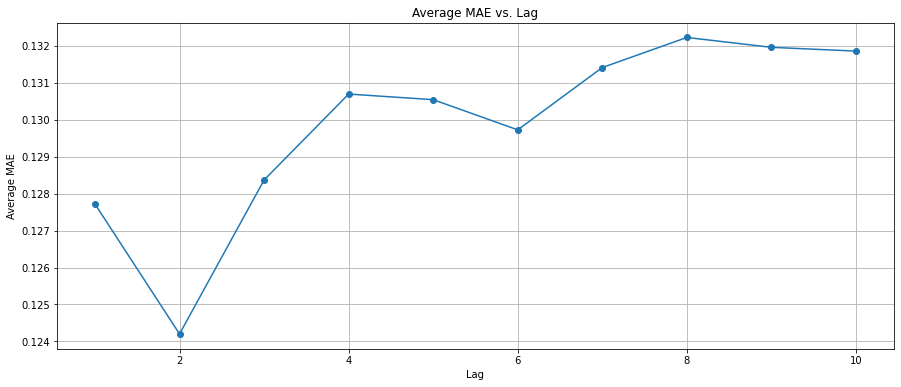

In [148]:
# Extract lag values and average MAE values
lags = list(average_metrics.keys())
mae_values = list(average_metrics.values())

# Create a plot
plt.figure(figsize=(15, 6))
plt.plot(lags, mae_values, marker='o', linestyle='-')
plt.title('Average MAE vs. Lag')
plt.xlabel('Lag')
plt.ylabel('Average MAE')
plt.grid(True)

# Show the plot
plt.show()

### ARIMA

The next model we want to test is Arima.

ARIMA stands for Autoregressive Integrated Moving Average and the idea at the base is that the information in the past values of the time series can be used to forecast future values.

This is what ARIMA does:

- **Autoregressive (AR)**: The autoregressive part of ARIMA indicates that the evolving variable of interest is regressed on its own previous values.

- **Integrated (I)**: The integrated part refers to the differencing of actual observations to allow for the time series to become stationary. This means that if the time series is non-stationary, it will be made so by differenciating it multiple times. 

Remember that a time-series is said to be stationary if statistical proprierties such as mean and variance do not change over time.

- **Moving Average (MA)**: The moving average part indicates that the regression error is actually a linear combination of error whose values occurred contemporaneously and at various times in the past.

Non-seasonal ARIMA models are denoted by parameters p, d, and q.
- p represents the number of time lags 
- d is the degree of differencing (according to the stationary concept previosuly explained)
- q is the order of the moving-average model

Let's now model our ARIMA for the age 0:

In [211]:
# Data preparation
ml_0_df['Year'] = pd.to_datetime(ml_0_df['Year'], format="%Y")
ml_0_df = ml_0_df.loc[:, ["Year", "standardized"]]
ml_0_df

Year  standardized
0  1926-01-01      0.939497
1  1927-01-01      0.931374
2  1928-01-01      0.923251
3  1929-01-01      0.915129
4  1930-01-01      0.907006
..        ...           ...
93 2019-01-01      1.167523
94 2020-01-01      1.065819
95 2021-01-01      0.961203
96 2022-01-01      1.043840
97 2023-01-01      0.954286

[98 rows x 2 columns]

In [212]:
# Modelling for age 0
lag = 5

# split into train and test sets
X = ml_0_df.standardized.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

model = ARIMA(history, order=(lag,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=5)
errors = list()

# walk-forward validation
for t in range(len(test)-5):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=5)
    error = mean_squared_error(test[t:t+5], predictions)
    errors.append(error)
    
error = mean(errors)

print(f"MAE for lag {lag}: {error}")

MAE for lag 5: 0.09764567858101296


In [222]:
# predictions from 2004 to 2023
age_0_arima_2004_2023 = model_fit.forecast(steps=19)

We are now ready to compute the same for all time series:

In [155]:
# Modelling for all ages

ml_arima_df = ml_reg_df.copy()
lag = 5
# This list is needed to store MSE of each time series
errors = list()

for age in ml_arima_df.columns:
    
    # split into train and test sets
    X = ml_arima_df[age].values
    size = int(len(X) * 0.80)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]

    model = ARIMA(history, order=(lag,1,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=5)
    errors = list()

    # walk-forward validation
    for t in range(len(test)-5):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=5)
        error = mean_squared_error(test[t:t+5], predictions)
        errors.append(error)

# All errors are averaged to get a final result
error = mean(errors)
print(f"MAE for lag {lag}: {error}")

# Storing error result
MSE_results["ARIMA"] = error

MAE for lag 5: 0.0967141047917398


Even if we could further increase the performance of this model by changing parameters p, d and q we decide not to further proceed with this approach as different time-series are forecasted without considering the values of other time-series. For this purpose we now implement a VAR model.

### VAR

VAR stands for Vector Autoregression and it is a model capable of capturing the linear interdependencies among the multiple time-series.

To make sure that we can build a VAR model, we have to make sure that there is a bi-directional relationship between multiple time-series. Also, we need to make sure that the time-series data is stationary. If not, we will need to differentiate the time-series and eventually convert it back to the original state if we want to exctract the actual forecasted values.

In [264]:
ml_var_df = ml_arima_df.copy()

As a first step we want to investigate the relationship between values in multiple time-series. 

To do so, Granger casuality test is used. This test will allow us to understand if one time-series is useful in forecasting another.

The output of this test is the p-value and, if this value is small (typically ≤ 0.05), we reject the null hypothesis. This means that the first variable does influence the second.

For this purpose we want to build a matrix where each value of the time-series is evaluated to the p-value of the other time-series. If majority of p-values are less than 0.05, we conclude that there is a correlation and we can proceed with VAR.

In [265]:
# Variable definition
maxlag=10
test = 'ssr_chi2test'
    
# Function to check Granger Causality of all combinations of the time-series
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    # Let's create an empty age x age matrix with nulle values 
    matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    
    for r, c in product(matrix.index, matrix.columns):
        p_values = [round(grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)[i+1][0][test][1],4) for i in range(maxlag)]
        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
        matrix.at[r, c] = min(p_values)
    matrix.columns = [var + '_x' for var in variables]
    matrix.index = [var + '_y' for var in variables]
    return matrix
    
grangers_causation_matrix(ml_var_df, variables = ml_var_df.columns)  

age_0_x  age_1_x  age_2_x  age_3_x  age_4_x  age_5_x  age_6_x  \
age_0_y       1.0      0.0   0.0000      0.0   0.0000   0.0000   0.0000   
age_1_y       0.0      1.0   0.0012      0.0   0.0000   0.0000   0.0000   
age_2_y       0.0      0.0   1.0000      0.0   0.0000   0.0000   0.0000   
age_3_y       0.0      0.0   0.0000      1.0   0.0000   0.0000   0.0000   
age_4_y       0.0      0.0   0.0000      0.0   1.0000   0.0000   0.0000   
...           ...      ...      ...      ...      ...      ...      ...   
age_95_y      0.0      0.0   0.0000      0.0   0.0000   0.0001   0.0005   
age_96_y      0.0      0.0   0.0000      0.0   0.0000   0.0056   0.0001   
age_97_y      0.0      0.0   0.0000      0.0   0.0805   0.0007   0.0004   
age_98_y      0.0      0.0   0.0000      0.0   0.0000   0.0000   0.0000   
age_99_y      0.0      0.0   0.0000      0.0   0.0000   0.0000   0.0000   

          age_7_x  age_8_x  age_9_x  ...  age_90_x  age_91_x  age_92_x  \
age_0_y    0.0000   0.0000   0.0000  ...       0.0    0.0000     0.000   
age_1_y    0.0000   0.0000   0.0003  ...       0.0    0.0000     0.001   
age_2_y    0.0000   0.0000   0.0000  ...       0.0    0.0005     0.000   
age_3_y    0.0000   0.0000   0.0000  ...       0.0    0.0000     0.000   
age_4_y    0.0004   0.0000   0.0001  ...       0.0    0.0009     0.000   
...           ...      ...      ...  ...       ...       ...       ...   
age_95_y   0.0000   0.0011   0.0001  ...       0.0    0.0000     0.000   
age_96_y   0.0000   0.0000   0.0004  ...       0.0    0.0000     0.000   
age_97_y   0.0000   0.0000   0.0000  ...       0.0    0.0000     0.000   
age_98_y   0.0000   0.0000   0.0000  ...       0.0    0.0000     0.000   
age_99_y   0.0000   0.0000   0.0000  ...       0.0    0.0000     0.000   

          age_93_x  age_94_x  age_95_x  age_96_x  age_97_x  age_98_x  age_99_x  
age_0_y        0.0       0.0    0.0057    0.0000    0.0005       0.0    0.0003  
age_1_y        0.0       0.0    0.0010    0.0007    0.0089       0.0    0.0050  
age_2_y        0.0       0.0    0.0061    0.0005    0.0053       0.0    0.0002  
age_3_y        0.0       0.0    0.0000    0.0000    0.0000       0.0    0.0003  
age_4_y        0.0       0.0    0.1000    0.0000    0.0000       0.0    0.0020  
...            ...       ...       ...       ...       ...       ...       ...  
age_95_y       0.0       0.0    1.0000    0.0000    0.0000       0.0    0.0000  
age_96_y       0.0       0.0    0.0000    1.0000    0.0000       0.0    0.0000  
age_97_y       0.0       0.0    0.0000    0.0000    1.0000       0.0    0.0000  
age_98_y       0.0       0.0    0.0000    0.0000    0.0000       1.0    0.0000  
age_99_y       0.0       0.0    0.0000    0.0000    0.0000       0.0    1.0000  

[100 rows x 100 columns]

As most of the values in the matrix are below 0.05 we can conclude that we can proceed with next steps.

Let's now split our dataset into train and test:

In [240]:
ml_var_train_df, ml_var_test_df = ml_var_df[0:int(len(ml_var_df)*0.8)], ml_var_df[int(len(ml_var_df)*0.8):]

Now we also want to know if time-series are stationary. To do so, the ADF test will be used. As with the Granger casuality test, if the p-value is small (we will use again 0.05 as reference) we can say that the time-series is stationary. Let's proceed:

In [241]:
cnt = 0

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    if p_value <= signif:
        return 0
    else:
        return 1
        
# ADF Test on each column
for name, column in ml_var_train_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 95 non-stationary time-series


From first adf test we get 95 non-stationary time-series, let's start with a first order differentiation:

In [462]:
# 1st difference
ml_var_train_differenced_df = ml_var_train_df.diff().dropna()

cnt = 0

# ADF Test on each column of 1st Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 78 non-stationary time-series


We are reducing non-stationary time-series but this is still not 0. Let's continue until we reach 0:

In [463]:
# 2nd difference
ml_var_train_differenced_df = ml_var_train_differenced_df.diff().dropna()

cnt = 0

# ADF Test on each column of 2nd Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    adfuller_test(column, name=column.name)
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 15 non-stationary time-series


In [464]:
# 3rd difference
ml_var_train_differenced_df = ml_var_train_differenced_df.diff().dropna()

cnt = 0

# ADF Test on each column of 3rd Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    adfuller_test(column, name=column.name)
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 3 non-stationary time-series


In [465]:
# 4th difference
ml_var_train_differenced_df = ml_var_train_differenced_df.diff().dropna()

cnt = 0

# ADF Test on each column of 4th Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 0 non-stationary time-series


We can now finally train our VAR model by setting the lag. Let's start with a lag value of 2:

In [466]:
# Trainig the model with a small lag
lag = 2

model = VAR(ml_var_train_differenced_df)
model_fit = model.fit(lag)

To understand if we selected a good lag value, one way is to look at the AIC value of the model.
AIC (Akaike Information Criterion) provides a trade-off between the goodness-of-fit of the model and the complexity of the model. Usually, a lower AIC indicates better-fitting models:

In [467]:
# Printing model metrics, specifically AIC
print('Lag Order =', 2)
print('AIC : ', model_fit.aic)

Lag Order = 2


LinAlgError: 55-th leading minor of the array is not positive definite

The error we receive is caused by the exhagerated dimension of the matrix we are working on. For this reason, we decide only to forecast a subset of ages to forecast:

In [242]:
# Creation of a dataset containing a subset of ages
selected_ages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
ml_var_df = ml_var_df.iloc[:, selected_ages]

# Splitting of train and test
ml_var_train_df, ml_var_test_df = ml_var_df[0:int(len(ml_var_df)*0.8)], ml_var_df[int(len(ml_var_df)*0.8):]

We can now start differenciating until we have stationary data:

In [243]:
cnt = 0

# ADF Test on each column
for name, column in ml_var_train_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 9 non-stationary time-series


In [244]:
# 1st difference
ml_var_train_differenced_df = ml_var_train_df.diff().dropna()

cnt = 0

# ADF Test on each column of 1st Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 9 non-stationary time-series


In [245]:
# 2nd difference
ml_var_train_differenced_df = ml_var_train_differenced_df.diff().dropna()

cnt = 0

# ADF Test on each column of 2nd Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 1 non-stationary time-series


In [246]:
# 3rd difference
ml_var_train_differenced_df = ml_var_train_differenced_df.diff().dropna()

cnt = 0

# ADF Test on each column of 3rd Differences Dataframe
for name, column in ml_var_train_differenced_df.iteritems():
    cnt += adfuller_test(column, name=column.name)
    
print(f"There are {cnt} non-stationary time-series")

There are 0 non-stationary time-series


Now that the data is stationary we can start training our model with a small lag:

In [247]:
# Model training with lag=2
lag = 2

model = VAR(ml_var_train_differenced_df)
model_fit = model.fit(lag)

Now that the model has been fitted, we can also extract a summary where the table, for each equation, provides coefficients, standard errors, t-statistics, and probabilities for each lag (L1 and L2):

In [248]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Nov, 2023
Time:                     11:28:24
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -94.0412
Nobs:                     73.0000    HQIC:                  -98.8159
Log likelihood:           2835.84    FPE:                6.56028e-45
AIC:                     -101.979    Det(Omega_mle):     3.22471e-46
--------------------------------------------------------------------
Results for equation age_0
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000390         0.003572            0.109           0.913
L1.age_0         -0.366623         0.236672           -1.549           0.121
L1.age_10         0.972150         0.392163            2.479           0.013

Now that our model is trained, let's select last two lags of our time-series that will be used for our forecast:

In [249]:
# Input data for forecasting from lags
forecast_input = ml_var_train_differenced_df.values[-lag:]
forecast_input

array([[-0.14584395, -0.07808681,  0.13774403, -0.13096377, -0.19093953,
         0.01902114,  0.18111042, -0.0337193 ,  0.0363586 ,  0.03340077,
         0.00523309],
       [ 0.39047953,  0.06438976,  0.00109212, -0.05374156,  0.32686336,
         0.07308124, -0.01551725,  0.08568616,  0.05961172, -0.00914653,
        -0.017747  ]])

And let's now start inferencing our model:

In [250]:
# Forecast
fc = model_fit.forecast(y=forecast_input, steps=5)
df_forecast = pd.DataFrame(fc, index=ml_var_df.index[-5:], columns=ml_var_train_differenced_df.columns + '_3d')
df_forecast

age_0_3d  age_10_3d  age_20_3d  age_30_3d  age_40_3d  age_50_3d  \
Year                                                                          
2019-01-01 -0.353145  -0.035743   0.134448   0.103148  -0.265437  -0.223725   
2020-01-01 -0.020661   0.182841  -0.169416   0.261035  -0.005674   0.235965   
2021-01-01  0.099013  -0.140554   0.215912  -0.669820   0.336316  -0.197014   
2022-01-01  0.224405  -0.013375  -0.529708   0.722886  -0.191908   0.123554   
2023-01-01 -0.671645  -0.101107   0.573310  -0.411682  -0.551662  -0.043857   

            age_60_3d  age_70_3d  age_80_3d  age_90_3d  age_99_3d  
Year                                                               
2019-01-01  -0.350452  -0.112789  -0.265844  -0.016756   0.025583  
2020-01-01   0.698114   0.211348   0.577979   0.028377  -0.016318  
2021-01-01  -0.635173  -0.246383  -0.581691   0.012648   0.008442  
2022-01-01   0.011535   0.127239   0.153508  -0.093115  -0.012413  
2023-01-01   0.504250  -0.092132   0.112699   0.117493   0.028109

We should be aware of the fact that differenciated is causing the forecasted values to not be aligned with the original non-differenciated data.

For this reason, the invert_transformation function is used to de-differenciate our data:

In [251]:
# Function that rollsback differenciated data:
def invert_transformation(df_train, df_forecast, second_diff=False):
    # Revert back the differencing to get the forecast to original scale
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 3nd Diff
        df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()
        # Roll back 2nd Diff
        df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [253]:
# Let's rollback the forecasted result
df_results = invert_transformation(ml_var_train_differenced_df, df_forecast)
df_results.loc[:, ['age_0_forecast', 'age_10_forecast', 'age_20_forecast', 'age_30_forecast',
                   'age_40_forecast', 'age_50_forecast', 'age_60_forecast', 'age_70_forecast',
                   'age_80_forecast', 'age_90_forecast', 'age_99_forecast']]

age_0_forecast  age_10_forecast  age_20_forecast  age_30_forecast  \
Year                                                                            
2019-01-01        1.036354         0.409388         0.121889         0.031477   
2020-01-01        1.771120         1.139749         0.330718         0.385726   
2021-01-01        2.693788         2.114918         0.843492         0.339187   
2022-01-01        4.028764         3.321521         1.130502         0.614743   
2023-01-01        5.104403         4.658450         1.765059         0.800713   

            age_40_forecast  age_50_forecast  age_60_forecast  \
Year                                                            
2019-01-01         1.170750        -0.115833        -0.717087   
2020-01-01         2.335047        -0.311755        -1.225485   
2021-01-01         4.156070        -0.711699        -2.175884   
2022-01-01         6.441911        -1.192111        -3.556748   
2023-01-01         8.640909        -1.796850        -4.863826   

            age_70_forecast  age_80_forecast  age_90_forecast  age_99_forecast  
Year                                                                            
2019-01-01         0.215804        -0.138839        -0.077824        -0.034347  
2020-01-01         0.567982         0.018985        -0.144256        -0.060885  
2021-01-01         0.895839        -0.048607        -0.195793        -0.088919  
2022-01-01         1.326611        -0.188106        -0.325551        -0.130861  
2023-01-01         1.768167        -0.286815        -0.416036        -0.158603

In [494]:
# And let's finally compute the average MAE of all time-series forecasted by this model
errors = list()

# Computing of MAE for each age available
for col in ml_var_df.columns:
    actual = ml_var_test_df[col][-5:].values
    forecast = df_results[str(col)+"_forecast"].values 
    error = mean_squared_error(actual, forecast)
    errors.append(error)
    print(f"MAE for {col}: {error}")

# Computing average MAE
error = mean(errors)
print(f"\nMAE avrage is {error}")

MAE for age_0: 1.5102733706367542
MAE for age_10: 3.2565372457893877
MAE for age_20: 1.7745220348886979
MAE for age_30: 1.9735935038164858
MAE for age_40: 5.619374601709465
MAE for age_50: 2.704699240988162
MAE for age_60: 1.1875039236550609
MAE for age_70: 0.18108117190772915
MAE for age_80: 0.4653170261459227
MAE for age_90: 1.6887069115871438
MAE for age_99: 2.3494922254077535

MAE avrage is 2.0646455687756875


The only tunable parameter here is the orther of the model p or, better known as, the lag - the number of previous steps needed to predict the next time step.

Let's try to find the optimal lag value:

In [503]:
# Below function loops over lags from 1 to 11 to try to find the best value that reduces MAE

for i in range(10):
    
    # +1 is needed as we cannot set lag=0
    lag = i+1
    
    model = VAR(ml_var_train_differenced_df)
    model_fit = model.fit(lag)
    
    # Input data for forecasting from lags
    forecast_input = ml_var_train_differenced_df.values[-lag:]
    
    # Forecast
    fc = model_fit.forecast(y=forecast_input, steps=5)
    df_forecast = pd.DataFrame(fc, index=ml_var_df.index[-5:], columns=ml_var_train_differenced_df.columns + '_3d')
    df_results = invert_transformation_test(ml_var_train_differenced_df, df_forecast)
    df_results.loc[:, ['age_0_forecast', 'age_10_forecast', 'age_20_forecast', 'age_30_forecast',
                   'age_40_forecast', 'age_50_forecast', 'age_60_forecast', 'age_70_forecast',
                   'age_80_forecast', 'age_90_forecast', 'age_99_forecast']]
    
    errors = list()

    for col in ml_var_df.columns:
        actual = ml_var_test_df[col][-5:].values
        forecast = df_results[str(col)+"_forecast"].values 
        error = mean_squared_error(actual, forecast)
        errors.append(error)

    error = mean(errors)
    print(f"MAE average for lag {lag} is {error}")

MAE average for lag 1 is 2.018573172574033
MAE average for lag 2 is 2.0646455687756875
MAE average for lag 3 is 3.135326737788031
MAE average for lag 4 is 2.539028412499653
MAE average for lag 5 is 16.82600491304189
MAE average for lag 6 is 22.937440528664176
MAE average for lag 7 is 6.469860070418326e+41
MAE average for lag 8 is 5.437218940509799e+51
MAE average for lag 9 is 6.647218394027858
MAE average for lag 10 is 2.0586126218073413


In [157]:
MSE_results["VAR"] = 2.018573172574033

From previous results we can clearly say that the best result, even if not great, is obtained with lag 1.

### XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm that belongs to the family of gradient boosting methods. It is particularly well-suited for regression and classification problems but can be adapted for time series forecasting as well.

It is an ensemble learning method, specifically a boosting algorithm. It builds a series of weak learners (typically decision trees) sequentially, with each tree attempting to correct the errors of its predecessor.
The algorithm minimizes a loss function by optimizing the weights assigned to each training instance and the predictions of each weak learner.

XGBoost uses decision trees as its base learners. Decision trees are simple models that recursively split the data into subsets based on the values of input features, assigning predictions to each leaf node.

Let's try to build a model withouth configuring any hyperparameter:

In [274]:
# Dataset preparation
ml_xgb_df = ml_df.copy()
ml_xgb_df = ml_xgb_df.loc[:, ["Year", "Age", "standardized"]] 
ml_xgb_df['Year'] = pd.to_datetime(ml_xgb_df['Year'], format="%Y")

Now that our dataset is ready we need to train-split it. Given that the structure of the dataset is different from the previous models, we now divide the dataset based on an end date that corresponds to the 80% of data for years from 1926 to 2023:

In [275]:
# Train-test split
end_date = "2004-01-01T00:00:00.000000000" # 80-20 split
train = ml_xgb_df.loc[ml_xgb_df['Year'] < end_date]
test = ml_xgb_df.loc[ml_xgb_df['Year'] > end_date]

We can now build a first model by fixing some of the hyperparameters:
- The regressor is set to use 100 trees
- Freq parameter is set to 'Y', indicating that the time series data has a yearly frequency
- The lags parameter specifies lag values of 1, 7, and 14. This will determine the number of steps to use for the forecasting

In [77]:
# Model definition
models = [XGBRegressor(random_state=42, n_estimators=100)]

# Model creation
model = MLForecast(models=models,
                   freq='Y',
                   lags=[1,7,14],
                   date_features=['year'])

# Model training
model.fit(train, id_col='Age', time_col='Year', target_col='standardized', static_features=[])

MLForecast(models=[XGBRegressor], freq=<YearEnd: month=12>, lag_features=['lag1', 'lag7', 'lag14'], date_features=['year'], num_threads=1)

Now that the model has been trained we want to do some forecasting. To do so we simply need to configure the years at which we want to forecast.

For this purpose we use the years contained in the test dataset (also referred as horizon), this way we will be able to compute the MSE:

In [78]:
# Dates to forecast
h = test['Year'].nunique()
# Forecasting
forecast = model.predict(horizon=h)
forecast["Year"] = forecast["Year"] + pd.Timedelta(days=1)
# Merging of actual (standardized) and forecasted (XGBRegressor) data
forecast = forecast.merge(test[['Age', 'Year', 'standardized']], on=['Age', 'Year'], how='left')

We can now compute the MSE:

In [79]:
# MSE error computation
forecast = forecast.dropna()
error = mean_squared_error(forecast["standardized"], forecast["XGBRegressor"])
print(f"MSE error is {error}")

MSE error is 0.06045953613721358


From previous result we see that we are getting a better result than Linear Regression and ARIMA models. For this reason we want to make sure to build the best model we can by finding the best parameters possible by using Optuna.

Optuna is an open-source hyperparameter optimization framework used to automatically search for the best hyperparameters of a given machine learning model. Great thing about Optuna is that it uses a framework-agnostic approach, meaning it can optimize hyperparameters for any machine learning library.

Hyperparameters we decide to tune are the following

**Learning Rate**:

The learning rate (or eta) controls the step size during the optimization process. A lower learning rate often leads to better generalization, but it requires more boosting rounds. On the other hand, a higher learning rate may speed up the training process but might cause the model to converge too quickly and overfit. Tuning the learning rate is crucial to finding the right balance between training speed and model accuracy.

**Max Depth**:

The maximum depth of a tree (max_depth) controls the complexity of the individual trees in the ensemble. Deeper trees can capture more complex relationships in the data but may lead to overfitting. Shallower trees are simpler and might generalize better. Tuning max_depth helps find the right level of complexity for the trees in the ensemble.

**Estimators (n_estimators)**:

The number of boosting rounds or estimators (n_estimators) determines how many weak learners (trees) are combined to form the final model. Too few estimators might lead to underfitting, while too many may lead to overfitting. Tuning n_estimators is important to find the optimal balance between training time and model performance.

**Lags**:

In a time-series forecasting problem, lags represent the historical values of the target variable at different time points. Including relevant lags as features can help the model capture temporal dependencies and patterns in the data. Tuning the lag values is crucial because using an appropriate set of lags can significantly improve the model's ability to make accurate predictions in a time-dependent context.

In the models we are building with XGBoost we are using multiple lags to capture different temporal dependencies in the data. Some patterns or trends might be based on recent data (lag 1), while others might be based on data from a bit further in the past (lag 3). So, by passing these three values, we’re telling the model to consider the value of the target variable at three different points in the past when making a prediction for the future. This can help the model capture more complex temporal patterns in the data, potentially leading to more accurate forecasts.

In [90]:
# Define the objective function for Optuna optimization
def objective(trial):
     # Hyperparameter search space
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    max_depth = trial.suggest_int('max_depth', 3, 8)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)    
    lags = trial.suggest_int('lags', 6, 15, step=3) # step means we only try multiples of 3 starting from 6

    # Create an XGBoost model with the suggested hyperparameters
    models = [XGBRegressor(random_state=42, n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)]

    # Create an MLForecast model with the XGBoost model, lag values, and other settings
    model = MLForecast(models=models,
                    freq='Y',
                    lags=[1,3, lags],
                    date_features=['year'])

    # Fit the model to the training data
    model.fit(train, id_col='Age', time_col='Year', target_col='standardized', static_features=[])

    # Define the forecast horizon based on the test data
    h = test['Year'].nunique()
    
    # Generate predictions for the defined horizon
    forecast = model.predict(horizon=h)
    forecast["Year"] = forecast["Year"] + pd.Timedelta(days=1)
    forecast = forecast.merge(test[['Age', 'Year', 'standardized']], on=['Age', 'Year'], how='left')

    # Drop NaN values before calculating the mean squared error
    forecast = forecast.dropna(subset=['standardized', 'XGBRegressor'])

    # Calculate the MSE
    error = mean_squared_error(forecast['standardized'], forecast['XGBRegressor'])
    
    return error

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective)

[I 2023-11-10 18:08:16,783] A new study created in memory with name: no-name-08bdd63e-4fe2-4d32-a534-20bded1829a2
[I 2023-11-10 18:08:19,924] Trial 0 finished with value: 0.8692008102865567 and parameters: {'learning_rate': 0.004539418644549878, 'max_depth': 8, 'n_estimators': 400, 'lags': 12}. Best is trial 0 with value: 0.8692008102865567.
[I 2023-11-10 18:08:26,033] Trial 1 finished with value: 0.0715566134285409 and parameters: {'learning_rate': 0.09192592447316447, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 1 with value: 0.0715566134285409.
[I 2023-11-10 18:08:28,160] Trial 2 finished with value: 0.4563964909734207 and parameters: {'learning_rate': 0.006418890354673951, 'max_depth': 4, 'n_estimators': 400, 'lags': 6}. Best is trial 1 with value: 0.0715566134285409.
[I 2023-11-10 18:08:28,902] Trial 3 finished with value: 1.2521748387411586 and parameters: {'learning_rate': 0.0016639942479075255, 'max_depth': 4, 'n_estimators': 100, 'lags': 9}. Best is trial 1

[I 2023-11-10 18:10:25,649] Trial 35 finished with value: 0.06233117410219882 and parameters: {'learning_rate': 0.08069920216985729, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:10:29,084] Trial 36 finished with value: 0.06140594308732239 and parameters: {'learning_rate': 0.09491527968359169, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:10:32,254] Trial 37 finished with value: 0.09279363583040028 and parameters: {'learning_rate': 0.03496932743281332, 'max_depth': 4, 'n_estimators': 600, 'lags': 6}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:10:35,026] Trial 38 finished with value: 0.05979848512892393 and parameters: {'learning_rate': 0.054684425848081586, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:10:39,926] Trial 39 finished with value: 0.072

[I 2023-11-10 18:12:37,691] Trial 70 finished with value: 0.12610397577815718 and parameters: {'learning_rate': 0.03658277217568078, 'max_depth': 4, 'n_estimators': 100, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:12:41,375] Trial 71 finished with value: 0.056784111541463136 and parameters: {'learning_rate': 0.04334712819972917, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:12:44,862] Trial 72 finished with value: 0.053972520740329974 and parameters: {'learning_rate': 0.03359594216648697, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:12:47,964] Trial 73 finished with value: 0.060898643397673535 and parameters: {'learning_rate': 0.05459854647641981, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 22 with value: 0.051268487242657715.
[I 2023-11-10 18:12:51,401] Trial 74 finished with value: 0

[I 2023-11-10 18:14:46,955] Trial 106 finished with value: 0.056509883688216855 and parameters: {'learning_rate': 0.04161787148112428, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:14:49,795] Trial 107 finished with value: 0.05547233089782221 and parameters: {'learning_rate': 0.038268497802942225, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:14:57,232] Trial 108 finished with value: 0.07510645239361244 and parameters: {'learning_rate': 0.05802457368646435, 'max_depth': 8, 'n_estimators': 900, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:15:00,821] Trial 109 finished with value: 0.058255606377136074 and parameters: {'learning_rate': 0.027288294552673197, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:15:04,137] Trial 110 finished with value: 0.0

[I 2023-11-10 18:16:40,518] Trial 142 finished with value: 0.05280165968877025 and parameters: {'learning_rate': 0.03360351881847579, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:16:43,628] Trial 143 finished with value: 0.05611582546466305 and parameters: {'learning_rate': 0.028928671865983913, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:16:46,769] Trial 144 finished with value: 0.0563302493786096 and parameters: {'learning_rate': 0.039935619001612244, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:16:49,782] Trial 145 finished with value: 0.05387611850797242 and parameters: {'learning_rate': 0.034991260126331615, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:16:52,724] Trial 146 finished with value: 0.0

[I 2023-11-10 18:18:30,372] Trial 177 finished with value: 0.05079986896946909 and parameters: {'learning_rate': 0.03562714835847207, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:18:33,728] Trial 178 finished with value: 0.059050986988571474 and parameters: {'learning_rate': 0.041201538694734544, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:18:36,446] Trial 179 finished with value: 0.06128512571504582 and parameters: {'learning_rate': 0.05267645940415459, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:18:41,459] Trial 180 finished with value: 0.06341088347772042 and parameters: {'learning_rate': 0.03687157959377446, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:18:44,696] Trial 181 finished with value: 0.05

[I 2023-11-10 18:20:32,801] Trial 212 finished with value: 0.0542849558692095 and parameters: {'learning_rate': 0.034439372922840696, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:20:37,574] Trial 213 finished with value: 0.05394755911783887 and parameters: {'learning_rate': 0.030025296391488248, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:20:41,645] Trial 214 finished with value: 0.05847511801359527 and parameters: {'learning_rate': 0.03933773116639598, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:20:45,656] Trial 215 finished with value: 0.05500942117111806 and parameters: {'learning_rate': 0.03574199338369275, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:20:49,836] Trial 216 finished with value: 0.05

[I 2023-11-10 18:23:10,726] Trial 247 finished with value: 0.05494784814854263 and parameters: {'learning_rate': 0.03869198693589935, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:23:15,418] Trial 248 finished with value: 0.055974707648128834 and parameters: {'learning_rate': 0.042921730402044764, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:23:20,375] Trial 249 finished with value: 0.057189236087202146 and parameters: {'learning_rate': 0.03549535347114221, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:23:24,697] Trial 250 finished with value: 0.055582943541116224 and parameters: {'learning_rate': 0.03956833866964359, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:23:28,951] Trial 251 finished with value: 0

[I 2023-11-10 18:25:47,701] Trial 282 finished with value: 0.057450780004541825 and parameters: {'learning_rate': 0.02776691394988987, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:25:51,089] Trial 283 finished with value: 0.060102437725553806 and parameters: {'learning_rate': 0.011897670878962218, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:25:55,217] Trial 284 finished with value: 0.05727199034478888 and parameters: {'learning_rate': 0.0347033261820131, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:25:58,533] Trial 285 finished with value: 0.059301757053046626 and parameters: {'learning_rate': 0.03877050598625609, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:26:01,011] Trial 286 finished with value: 0.0

[I 2023-11-10 18:27:37,946] Trial 317 finished with value: 0.055044431525032515 and parameters: {'learning_rate': 0.03748525822873387, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:27:40,940] Trial 318 finished with value: 0.05617038536722384 and parameters: {'learning_rate': 0.04145250358012809, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:27:43,854] Trial 319 finished with value: 0.054042973308008606 and parameters: {'learning_rate': 0.04821068639867805, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:27:46,667] Trial 320 finished with value: 0.060829124580253274 and parameters: {'learning_rate': 0.06748054579115732, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:27:49,662] Trial 321 finished with value: 0.0

[I 2023-11-10 18:29:32,894] Trial 352 finished with value: 0.07420068990961438 and parameters: {'learning_rate': 0.03542998059010728, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:29:36,184] Trial 353 finished with value: 0.05987643636726299 and parameters: {'learning_rate': 0.014435327657108464, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:29:39,280] Trial 354 finished with value: 0.6184288115152055 and parameters: {'learning_rate': 0.0021075979102702885, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:29:42,704] Trial 355 finished with value: 0.06397690738527409 and parameters: {'learning_rate': 0.0323013093047582, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 74 with value: 0.0500453239549272.
[I 2023-11-10 18:29:45,188] Trial 356 finished with value: 0.05

[I 2023-11-10 18:31:46,949] Trial 387 finished with value: 0.05822754621126019 and parameters: {'learning_rate': 0.040044983704820604, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:31:51,775] Trial 388 finished with value: 0.05655297111540217 and parameters: {'learning_rate': 0.028747616150008554, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:31:56,089] Trial 389 finished with value: 0.060627175053813334 and parameters: {'learning_rate': 0.04552350712425246, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:32:00,757] Trial 390 finished with value: 0.05387247298469952 and parameters: {'learning_rate': 0.03484957180675983, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:32:05,562] Trial 391 finished wi

[I 2023-11-10 18:34:22,635] Trial 422 finished with value: 0.08039708449534888 and parameters: {'learning_rate': 0.07016249209131867, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:34:26,737] Trial 423 finished with value: 0.05539277197261369 and parameters: {'learning_rate': 0.030787019012044496, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:34:31,117] Trial 424 finished with value: 0.0539252130389235 and parameters: {'learning_rate': 0.03373448712972232, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:34:35,824] Trial 425 finished with value: 0.05629921739819468 and parameters: {'learning_rate': 0.0385918706820024, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:34:39,998] Trial 426 finished with v

[I 2023-11-10 18:36:35,458] Trial 457 finished with value: 0.05420785638847946 and parameters: {'learning_rate': 0.031592937233691554, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:36:38,654] Trial 458 finished with value: 0.052303390973248 and parameters: {'learning_rate': 0.03608154084415808, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:36:41,810] Trial 459 finished with value: 0.055112319920798694 and parameters: {'learning_rate': 0.04765266391349682, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:36:44,867] Trial 460 finished with value: 0.06006155968820859 and parameters: {'learning_rate': 0.020938250223699603, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:36:48,246] Trial 461 finished with va

[I 2023-11-10 18:38:33,041] Trial 492 finished with value: 0.05755383736236757 and parameters: {'learning_rate': 0.033724167220174704, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:38:35,918] Trial 493 finished with value: 0.0623786245133188 and parameters: {'learning_rate': 0.029960065093109858, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:38:40,056] Trial 494 finished with value: 0.3255339053922158 and parameters: {'learning_rate': 0.002800348408572479, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:38:43,251] Trial 495 finished with value: 0.058423889274622894 and parameters: {'learning_rate': 0.03215532641838458, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:38:46,501] Trial 496 finished with 

[I 2023-11-10 18:40:33,226] Trial 527 finished with value: 0.0817968006607076 and parameters: {'learning_rate': 0.006098511569327198, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:40:37,642] Trial 528 finished with value: 0.062175330409837436 and parameters: {'learning_rate': 0.010682706924560923, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:40:42,658] Trial 529 finished with value: 0.05516459503692888 and parameters: {'learning_rate': 0.037023793252145464, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:40:47,748] Trial 530 finished with value: 0.05822893185735549 and parameters: {'learning_rate': 0.04252398447136824, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:40:53,877] Trial 531 finished wit

[I 2023-11-10 18:43:16,360] Trial 562 finished with value: 0.056500794781731284 and parameters: {'learning_rate': 0.03643571066289938, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:43:20,904] Trial 563 finished with value: 0.06852961514705898 and parameters: {'learning_rate': 0.039901592670555604, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:43:25,312] Trial 564 finished with value: 0.06638435053972076 and parameters: {'learning_rate': 0.09003600566817738, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:43:29,637] Trial 565 finished with value: 0.05438287748737658 and parameters: {'learning_rate': 0.03352384370125817, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:43:34,353] Trial 566 finished with

[I 2023-11-10 18:46:12,978] Trial 597 finished with value: 0.11579581389158851 and parameters: {'learning_rate': 0.004325948214478473, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:46:15,201] Trial 598 finished with value: 0.7569820279924384 and parameters: {'learning_rate': 0.0030792305777766734, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:46:20,244] Trial 599 finished with value: 0.056578213616739786 and parameters: {'learning_rate': 0.039639384354752144, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:46:24,613] Trial 600 finished with value: 0.6627004906729732 and parameters: {'learning_rate': 0.0020495322336767006, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:46:28,302] Trial 601 finished w

[I 2023-11-10 18:48:13,486] Trial 632 finished with value: 0.05812626400346541 and parameters: {'learning_rate': 0.030615695883852385, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:48:17,259] Trial 633 finished with value: 0.05597223207383939 and parameters: {'learning_rate': 0.03636780356693934, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:48:24,376] Trial 634 finished with value: 0.05949676838009567 and parameters: {'learning_rate': 0.015090724926258417, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:48:27,415] Trial 635 finished with value: 0.874342416077562 and parameters: {'learning_rate': 0.0018197817719228806, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:48:30,325] Trial 636 finished with va

[I 2023-11-10 18:50:21,494] Trial 667 finished with value: 0.05658622238172989 and parameters: {'learning_rate': 0.042690249600954765, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:50:24,676] Trial 668 finished with value: 0.05427720219911008 and parameters: {'learning_rate': 0.0366494150008285, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:50:27,714] Trial 669 finished with value: 0.06304955498386175 and parameters: {'learning_rate': 0.06185978059110253, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:50:30,627] Trial 670 finished with value: 0.05663240505005359 and parameters: {'learning_rate': 0.032252078864810026, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:50:33,937] Trial 671 finished with 

[I 2023-11-10 18:52:46,760] Trial 702 finished with value: 0.059986110283343774 and parameters: {'learning_rate': 0.024815860057537543, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:52:51,330] Trial 703 finished with value: 0.056700430194938374 and parameters: {'learning_rate': 0.028794347385137788, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:52:55,836] Trial 704 finished with value: 0.058396063309825955 and parameters: {'learning_rate': 0.013660964516728283, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:53:01,083] Trial 705 finished with value: 0.05745496146571841 and parameters: {'learning_rate': 0.025668977499020716, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:53:05,359] Trial 706 finishe

[I 2023-11-10 18:55:31,242] Trial 737 finished with value: 0.05472772699615046 and parameters: {'learning_rate': 0.04644232695612216, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:55:35,908] Trial 738 finished with value: 0.054617822397709515 and parameters: {'learning_rate': 0.03996042017711157, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:55:39,530] Trial 739 finished with value: 1.011686982791627 and parameters: {'learning_rate': 0.0012809426088479581, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:55:44,098] Trial 740 finished with value: 0.060032785356480795 and parameters: {'learning_rate': 0.009984675537581509, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:55:47,904] Trial 741 finished wi

[I 2023-11-10 18:57:34,341] Trial 772 finished with value: 0.06076448255614289 and parameters: {'learning_rate': 0.04444298241823535, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:57:37,724] Trial 773 finished with value: 0.05534965051613005 and parameters: {'learning_rate': 0.03333521026074994, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:57:40,896] Trial 774 finished with value: 0.8624234931043393 and parameters: {'learning_rate': 0.0016834362134032785, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:57:43,249] Trial 775 finished with value: 0.0538213701899446 and parameters: {'learning_rate': 0.028671863046177488, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:57:46,617] Trial 776 finished with 

[I 2023-11-10 18:59:34,704] Trial 807 finished with value: 0.054080670758425556 and parameters: {'learning_rate': 0.034915376837487425, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:59:36,008] Trial 808 finished with value: 0.06060095351618062 and parameters: {'learning_rate': 0.05268033820207295, 'max_depth': 3, 'n_estimators': 200, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:59:43,131] Trial 809 finished with value: 0.06786710337350914 and parameters: {'learning_rate': 0.02255370816827868, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:59:45,563] Trial 810 finished with value: 1.0174655058646986 and parameters: {'learning_rate': 0.002085953671532145, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 18:59:49,346] Trial 811 finished with v

[I 2023-11-10 19:01:56,714] Trial 842 finished with value: 0.055586662961083895 and parameters: {'learning_rate': 0.037877749260822734, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:02:01,062] Trial 843 finished with value: 0.053789548369613166 and parameters: {'learning_rate': 0.023619689084652878, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:02:04,986] Trial 844 finished with value: 0.05856236926287688 and parameters: {'learning_rate': 0.02772780695525679, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:02:09,892] Trial 845 finished with value: 0.056020988844046105 and parameters: {'learning_rate': 0.0329780910723036, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:02:14,371] Trial 846 finished wi

[I 2023-11-10 19:04:43,553] Trial 877 finished with value: 0.05667968318981453 and parameters: {'learning_rate': 0.02355263414946051, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:04:47,838] Trial 878 finished with value: 0.055484467193596745 and parameters: {'learning_rate': 0.051396272569780896, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:04:52,579] Trial 879 finished with value: 0.05410467666873405 and parameters: {'learning_rate': 0.03546921863041104, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:04:57,728] Trial 880 finished with value: 0.051772403793995184 and parameters: {'learning_rate': 0.03253863302742386, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:05:04,908] Trial 881 finished with

[I 2023-11-10 19:07:28,002] Trial 912 finished with value: 0.05728245558982407 and parameters: {'learning_rate': 0.030714989496338403, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:07:33,036] Trial 913 finished with value: 0.0518484510602845 and parameters: {'learning_rate': 0.035847952138041886, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:07:37,370] Trial 914 finished with value: 0.05475609471930378 and parameters: {'learning_rate': 0.04344392192912585, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:07:42,078] Trial 915 finished with value: 0.06026612901270401 and parameters: {'learning_rate': 0.0800391619642885, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:07:48,983] Trial 916 finished with 

[I 2023-11-10 19:09:40,919] Trial 947 finished with value: 0.06537586798013294 and parameters: {'learning_rate': 0.04437883033871868, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:09:44,363] Trial 948 finished with value: 0.0524788835664364 and parameters: {'learning_rate': 0.03499784759265749, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:09:47,796] Trial 949 finished with value: 0.07146049878493699 and parameters: {'learning_rate': 0.006229036890371562, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:09:51,182] Trial 950 finished with value: 0.05791274593150229 and parameters: {'learning_rate': 0.021276622673274598, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:09:54,426] Trial 951 finished with

[I 2023-11-10 19:12:17,739] Trial 982 finished with value: 0.06549419740757809 and parameters: {'learning_rate': 0.05092165757256227, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:12:22,429] Trial 983 finished with value: 0.05221054060862205 and parameters: {'learning_rate': 0.03536639820920511, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:12:30,468] Trial 984 finished with value: 0.05872366429252144 and parameters: {'learning_rate': 0.013360566416422373, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:12:36,285] Trial 985 finished with value: 0.05906930980042573 and parameters: {'learning_rate': 0.06443240611157543, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:12:40,579] Trial 986 finished with

[I 2023-11-10 19:15:38,228] Trial 1017 finished with value: 0.07266507553200421 and parameters: {'learning_rate': 0.02230421895369062, 'max_depth': 7, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:15:41,769] Trial 1018 finished with value: 0.33826419366002675 and parameters: {'learning_rate': 0.002742166330821714, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:15:44,913] Trial 1019 finished with value: 0.06981946942268913 and parameters: {'learning_rate': 0.006274320328610172, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:15:47,980] Trial 1020 finished with value: 0.05686803359088069 and parameters: {'learning_rate': 0.01879230881971574, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:15:51,472] Trial 1021 finished

[I 2023-11-10 19:17:37,248] Trial 1052 finished with value: 0.05799401062368238 and parameters: {'learning_rate': 0.034099551644900694, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:17:39,931] Trial 1053 finished with value: 0.05846218636580342 and parameters: {'learning_rate': 0.028790600050769388, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:17:42,926] Trial 1054 finished with value: 0.051005396057613284 and parameters: {'learning_rate': 0.03603694513386337, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:17:46,033] Trial 1055 finished with value: 1.0845497866681042 and parameters: {'learning_rate': 0.0011306726577929298, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:17:48,971] Trial 1056 finish

[I 2023-11-10 19:19:41,103] Trial 1087 finished with value: 0.05511062549537723 and parameters: {'learning_rate': 0.034574967648093945, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:19:51,945] Trial 1088 finished with value: 0.06439525320425993 and parameters: {'learning_rate': 0.05294997134776985, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:20:06,947] Trial 1089 finished with value: 0.1010923733375419 and parameters: {'learning_rate': 0.004896044516535871, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:20:12,244] Trial 1090 finished with value: 0.06572709967201892 and parameters: {'learning_rate': 0.0278028826994917, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:20:16,576] Trial 1091 finished w

[I 2023-11-10 19:22:35,907] Trial 1122 finished with value: 0.05973483963697558 and parameters: {'learning_rate': 0.026537773385507706, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:22:40,840] Trial 1123 finished with value: 0.4000052071296151 and parameters: {'learning_rate': 0.002590082173714282, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:22:44,581] Trial 1124 finished with value: 0.6948458812566696 and parameters: {'learning_rate': 0.002204956206310144, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:22:48,706] Trial 1125 finished with value: 0.059338371122740576 and parameters: {'learning_rate': 0.049270778591076106, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:22:52,821] Trial 1126 finishe

[I 2023-11-10 19:25:54,510] Trial 1157 finished with value: 0.05572032318597952 and parameters: {'learning_rate': 0.02676449446097383, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:25:57,810] Trial 1158 finished with value: 0.05833139512886005 and parameters: {'learning_rate': 0.03689864713287011, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:26:01,083] Trial 1159 finished with value: 0.05431093854768151 and parameters: {'learning_rate': 0.032088525527807686, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:26:04,244] Trial 1160 finished with value: 0.05363115000834068 and parameters: {'learning_rate': 0.04081133625774801, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:26:07,006] Trial 1161 finished

[I 2023-11-10 19:27:33,432] Trial 1192 finished with value: 0.14877374802536686 and parameters: {'learning_rate': 0.003845780009048398, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:27:35,305] Trial 1193 finished with value: 0.06005161952910766 and parameters: {'learning_rate': 0.03209181036147331, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:27:37,987] Trial 1194 finished with value: 0.056528879892866826 and parameters: {'learning_rate': 0.03726479552791802, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:27:40,833] Trial 1195 finished with value: 0.05714130313814561 and parameters: {'learning_rate': 0.028758136740046722, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:27:43,709] Trial 1196 finished

[I 2023-11-10 19:29:43,493] Trial 1227 finished with value: 0.06228529290813996 and parameters: {'learning_rate': 0.05504637393200042, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:29:46,388] Trial 1228 finished with value: 0.05918861511108632 and parameters: {'learning_rate': 0.02995801424554058, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:29:50,253] Trial 1229 finished with value: 0.052486036810093485 and parameters: {'learning_rate': 0.041773749794908846, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:29:55,983] Trial 1230 finished with value: 0.058937418989223805 and parameters: {'learning_rate': 0.05075336679779311, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:29:57,545] Trial 1231 finishe

[I 2023-11-10 19:31:53,545] Trial 1262 finished with value: 0.0606985392005903 and parameters: {'learning_rate': 0.010218054774185283, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:31:57,813] Trial 1263 finished with value: 0.06976760535351813 and parameters: {'learning_rate': 0.0413951148449331, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:32:01,421] Trial 1264 finished with value: 0.06015642444537833 and parameters: {'learning_rate': 0.014098884500591494, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:32:05,218] Trial 1265 finished with value: 0.06452444420280555 and parameters: {'learning_rate': 0.08909149414374039, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:32:09,291] Trial 1266 finished wi

[I 2023-11-10 19:34:12,985] Trial 1297 finished with value: 0.05800575758280967 and parameters: {'learning_rate': 0.018210267516293344, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:34:16,710] Trial 1298 finished with value: 0.053484855214356114 and parameters: {'learning_rate': 0.03439900915274617, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:34:20,334] Trial 1299 finished with value: 0.05393117570024063 and parameters: {'learning_rate': 0.04553921021169745, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:34:23,940] Trial 1300 finished with value: 0.06326480721018019 and parameters: {'learning_rate': 0.041785815490144346, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:34:27,658] Trial 1301 finishe

[I 2023-11-10 19:36:21,961] Trial 1332 finished with value: 0.056405191523592794 and parameters: {'learning_rate': 0.030728789194948966, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:36:24,171] Trial 1333 finished with value: 0.059078661697239535 and parameters: {'learning_rate': 0.04315710713055168, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:36:27,043] Trial 1334 finished with value: 0.056826769133213294 and parameters: {'learning_rate': 0.021485303304619643, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:36:29,950] Trial 1335 finished with value: 0.06265076554672351 and parameters: {'learning_rate': 0.04795621459719947, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:36:32,856] Trial 1336 finish

[I 2023-11-10 19:38:04,840] Trial 1367 finished with value: 0.054758849875038845 and parameters: {'learning_rate': 0.03123868967239201, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:38:07,687] Trial 1368 finished with value: 0.06199512499775299 and parameters: {'learning_rate': 0.010679917510575723, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:38:10,975] Trial 1369 finished with value: 0.08234033095431464 and parameters: {'learning_rate': 0.005347724052934628, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:38:14,093] Trial 1370 finished with value: 0.0597673202186517 and parameters: {'learning_rate': 0.012254110505214159, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:38:17,161] Trial 1371 finishe

[I 2023-11-10 19:39:57,127] Trial 1402 finished with value: 0.05302797946252798 and parameters: {'learning_rate': 0.03590946823829088, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:40:00,783] Trial 1403 finished with value: 0.0584035582864261 and parameters: {'learning_rate': 0.04010687737478208, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:40:04,193] Trial 1404 finished with value: 0.05854952088876035 and parameters: {'learning_rate': 0.023883512051233683, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:40:07,304] Trial 1405 finished with value: 0.058413791033824825 and parameters: {'learning_rate': 0.04689616445638782, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:40:10,385] Trial 1406 finished 

[I 2023-11-10 19:41:58,642] Trial 1437 finished with value: 0.05813738131813053 and parameters: {'learning_rate': 0.04602829250318036, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:42:02,744] Trial 1438 finished with value: 0.05616802316348636 and parameters: {'learning_rate': 0.027990551432695476, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:42:11,652] Trial 1439 finished with value: 0.07491339205955004 and parameters: {'learning_rate': 0.004898185301199289, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:42:15,040] Trial 1440 finished with value: 0.06107379512751123 and parameters: {'learning_rate': 0.05310378155735826, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:42:18,625] Trial 1441 finished

[I 2023-11-10 19:44:13,550] Trial 1472 finished with value: 0.05718629367855873 and parameters: {'learning_rate': 0.0336451734408352, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:44:17,245] Trial 1473 finished with value: 0.05715734994373011 and parameters: {'learning_rate': 0.03919638723930309, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:44:20,851] Trial 1474 finished with value: 0.06129329536674676 and parameters: {'learning_rate': 0.010367905069520985, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:44:24,540] Trial 1475 finished with value: 0.05577308767081487 and parameters: {'learning_rate': 0.031204985365356788, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:44:28,283] Trial 1476 finished 

[I 2023-11-10 19:48:31,231] Trial 1507 finished with value: 0.05967448178884256 and parameters: {'learning_rate': 0.03754535733403035, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:48:34,860] Trial 1508 finished with value: 0.05413297055176849 and parameters: {'learning_rate': 0.034376790262667586, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:48:38,970] Trial 1509 finished with value: 0.06245260021433512 and parameters: {'learning_rate': 0.011485349242596284, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:48:42,996] Trial 1510 finished with value: 0.9988987204453174 and parameters: {'learning_rate': 0.0013155199722522156, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:48:46,931] Trial 1511 finishe

[I 2023-11-10 19:50:37,988] Trial 1542 finished with value: 0.05599188187080914 and parameters: {'learning_rate': 0.04459909602245736, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:50:40,968] Trial 1543 finished with value: 0.05588088930680545 and parameters: {'learning_rate': 0.031761260883403114, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:50:43,959] Trial 1544 finished with value: 0.05599373434677557 and parameters: {'learning_rate': 0.026453143315642063, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:50:46,644] Trial 1545 finished with value: 0.05577169886565409 and parameters: {'learning_rate': 0.03469488241517374, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:50:49,640] Trial 1546 finished

[I 2023-11-10 19:52:25,155] Trial 1577 finished with value: 0.05446832907526881 and parameters: {'learning_rate': 0.03545462268963271, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:52:27,691] Trial 1578 finished with value: 0.06263336001341127 and parameters: {'learning_rate': 0.011514995963052813, 'max_depth': 4, 'n_estimators': 600, 'lags': 6}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:52:30,641] Trial 1579 finished with value: 0.05747257430054488 and parameters: {'learning_rate': 0.0290663616495238, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:52:33,687] Trial 1580 finished with value: 0.0683127610941722 and parameters: {'learning_rate': 0.007831985826310022, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:52:36,612] Trial 1581 finished wit

[I 2023-11-10 19:54:08,801] Trial 1612 finished with value: 0.14926353294207875 and parameters: {'learning_rate': 0.0038366858779964722, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:54:11,679] Trial 1613 finished with value: 0.05630046476165835 and parameters: {'learning_rate': 0.034631675465559814, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:54:14,561] Trial 1614 finished with value: 0.05844984456909281 and parameters: {'learning_rate': 0.012823905885505553, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:54:17,165] Trial 1615 finished with value: 0.0668210371314424 and parameters: {'learning_rate': 0.07502583430914833, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:54:20,011] Trial 1616 finishe

[I 2023-11-10 19:56:08,368] Trial 1647 finished with value: 0.05542405306644154 and parameters: {'learning_rate': 0.03426389381251436, 'max_depth': 3, 'n_estimators': 400, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:56:11,800] Trial 1648 finished with value: 0.05933712040198897 and parameters: {'learning_rate': 0.027571891185639786, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:56:15,491] Trial 1649 finished with value: 0.056474157415863084 and parameters: {'learning_rate': 0.03780956227761292, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:56:19,353] Trial 1650 finished with value: 0.05822264354207604 and parameters: {'learning_rate': 0.03200110082956706, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:56:23,135] Trial 1651 finished w

[I 2023-11-10 19:58:18,114] Trial 1682 finished with value: 0.06930383584295285 and parameters: {'learning_rate': 0.08340345742699913, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:58:22,195] Trial 1683 finished with value: 0.05282614561215458 and parameters: {'learning_rate': 0.03909474508682128, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:58:26,003] Trial 1684 finished with value: 0.057697879161398256 and parameters: {'learning_rate': 0.021580046056853916, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:58:30,954] Trial 1685 finished with value: 0.05329541896317763 and parameters: {'learning_rate': 0.04737869268797994, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 19:58:35,049] Trial 1686 finishe

[I 2023-11-10 20:00:28,944] Trial 1717 finished with value: 0.05380719191723402 and parameters: {'learning_rate': 0.03382443939955567, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:00:32,045] Trial 1718 finished with value: 0.062102099592745756 and parameters: {'learning_rate': 0.07732624514636893, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:00:34,498] Trial 1719 finished with value: 0.05839866707100093 and parameters: {'learning_rate': 0.037706612643486244, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:00:36,729] Trial 1720 finished with value: 1.1367781877489713 and parameters: {'learning_rate': 0.001339040165842374, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:00:39,781] Trial 1721 finished w

[I 2023-11-10 20:02:18,032] Trial 1752 finished with value: 0.0581177061842463 and parameters: {'learning_rate': 0.0375550241331356, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:02:20,668] Trial 1753 finished with value: 0.058932803398772715 and parameters: {'learning_rate': 0.012658649699545752, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:02:23,578] Trial 1754 finished with value: 0.06320367991004722 and parameters: {'learning_rate': 0.08867481757140178, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:02:26,446] Trial 1755 finished with value: 0.05788186756064924 and parameters: {'learning_rate': 0.03023769485207578, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:02:29,351] Trial 1756 finished w

[I 2023-11-10 20:03:57,861] Trial 1787 finished with value: 0.060267175618729886 and parameters: {'learning_rate': 0.03049038652365649, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:04:00,568] Trial 1788 finished with value: 0.058054598934640406 and parameters: {'learning_rate': 0.025610697852595038, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:04:03,504] Trial 1789 finished with value: 0.055680995630923796 and parameters: {'learning_rate': 0.03699073159818622, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:04:06,453] Trial 1790 finished with value: 0.054253354023464574 and parameters: {'learning_rate': 0.042281820654724016, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:04:09,146] Trial 1791 fini

[I 2023-11-10 20:06:07,288] Trial 1822 finished with value: 0.061413594091350436 and parameters: {'learning_rate': 0.015802094953631253, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:06:11,245] Trial 1823 finished with value: 0.06654989103880664 and parameters: {'learning_rate': 0.006967909580900226, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:06:15,022] Trial 1824 finished with value: 0.06002658452156319 and parameters: {'learning_rate': 0.06599060157513668, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:06:18,319] Trial 1825 finished with value: 0.05213410091743878 and parameters: {'learning_rate': 0.03256863537491857, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:06:24,197] Trial 1826 finished

[I 2023-11-10 20:08:25,279] Trial 1857 finished with value: 0.058224200068928006 and parameters: {'learning_rate': 0.036298499877754145, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:08:28,952] Trial 1858 finished with value: 0.05918948626333018 and parameters: {'learning_rate': 0.011636859645164676, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:08:32,490] Trial 1859 finished with value: 0.059181987997244806 and parameters: {'learning_rate': 0.0381524171807901, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:08:36,280] Trial 1860 finished with value: 0.05989622678522343 and parameters: {'learning_rate': 0.04441515683107608, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:08:40,329] Trial 1861 finishe

[I 2023-11-10 20:10:29,396] Trial 1892 finished with value: 0.22081295803720252 and parameters: {'learning_rate': 0.0032789933352374337, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:10:32,316] Trial 1893 finished with value: 0.05714308495806814 and parameters: {'learning_rate': 0.03273920268058029, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:10:35,248] Trial 1894 finished with value: 0.05350433214687281 and parameters: {'learning_rate': 0.036797663356735094, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:10:36,905] Trial 1895 finished with value: 0.5089520110685478 and parameters: {'learning_rate': 0.004640939814177047, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:10:40,014] Trial 1896 finishe

[I 2023-11-10 20:12:12,976] Trial 1927 finished with value: 0.05363593710064196 and parameters: {'learning_rate': 0.034795125576626, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:12:15,598] Trial 1928 finished with value: 0.059195993548629484 and parameters: {'learning_rate': 0.04317206663613153, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:12:18,476] Trial 1929 finished with value: 0.06188735272513763 and parameters: {'learning_rate': 0.010528079611980528, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:12:21,344] Trial 1930 finished with value: 0.05647341232258248 and parameters: {'learning_rate': 0.030038048021265435, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:12:24,265] Trial 1931 finished 

[I 2023-11-10 20:13:57,166] Trial 1962 finished with value: 0.05962440764882096 and parameters: {'learning_rate': 0.014923898920041841, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:14:00,380] Trial 1963 finished with value: 0.05579017463381378 and parameters: {'learning_rate': 0.03179908062585665, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:14:03,377] Trial 1964 finished with value: 0.05895863510105973 and parameters: {'learning_rate': 0.03555009113764266, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:14:06,261] Trial 1965 finished with value: 0.5363152595182984 and parameters: {'learning_rate': 0.0022566878542649407, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:14:08,933] Trial 1966 finished

[I 2023-11-10 20:15:52,108] Trial 1997 finished with value: 0.06106811224625589 and parameters: {'learning_rate': 0.0108814262161738, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:15:55,724] Trial 1998 finished with value: 0.061406842201220134 and parameters: {'learning_rate': 0.06118159041333462, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:15:59,378] Trial 1999 finished with value: 0.05804429860533154 and parameters: {'learning_rate': 0.028676218243130797, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:16:03,388] Trial 2000 finished with value: 0.05934063198054398 and parameters: {'learning_rate': 0.01780861756173087, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:16:05,428] Trial 2001 finished 

[I 2023-11-10 20:17:53,126] Trial 2032 finished with value: 0.2796378570835878 and parameters: {'learning_rate': 0.003300915372570904, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:17:58,044] Trial 2033 finished with value: 0.07367206443404647 and parameters: {'learning_rate': 0.036717165369092586, 'max_depth': 4, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:18:02,063] Trial 2034 finished with value: 0.0592626646461018 and parameters: {'learning_rate': 0.046404208941142513, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:18:05,716] Trial 2035 finished with value: 0.057704636084666194 and parameters: {'learning_rate': 0.013599724305439133, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:18:08,931] Trial 2036 finishe

[I 2023-11-10 20:20:09,676] Trial 2067 finished with value: 0.05444279394858271 and parameters: {'learning_rate': 0.03563874768214944, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:20:12,989] Trial 2068 finished with value: 0.07231583140859998 and parameters: {'learning_rate': 0.027244599064230535, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:20:16,147] Trial 2069 finished with value: 0.06137520020526044 and parameters: {'learning_rate': 0.010065792860263018, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:20:19,307] Trial 2070 finished with value: 0.05949680824563782 and parameters: {'learning_rate': 0.03876934134309194, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:20:22,684] Trial 2071 finished

[I 2023-11-10 20:22:06,987] Trial 2102 finished with value: 0.059274534829534785 and parameters: {'learning_rate': 0.00912849864004656, 'max_depth': 3, 'n_estimators': 900, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:22:10,085] Trial 2103 finished with value: 0.055297514688222416 and parameters: {'learning_rate': 0.03118194650407866, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:22:13,173] Trial 2104 finished with value: 0.7550517101957271 and parameters: {'learning_rate': 0.00185377157620795, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:22:16,249] Trial 2105 finished with value: 0.057137880821461796 and parameters: {'learning_rate': 0.025072886771089393, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:22:19,390] Trial 2106 finished

[I 2023-11-10 20:23:54,586] Trial 2137 finished with value: 0.059667032774932856 and parameters: {'learning_rate': 0.01084723977444317, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:23:57,540] Trial 2138 finished with value: 0.34918963964617306 and parameters: {'learning_rate': 0.0027026879198740698, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:24:00,289] Trial 2139 finished with value: 0.059480499462924635 and parameters: {'learning_rate': 0.01431023202481583, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:24:03,376] Trial 2140 finished with value: 0.05697839013065041 and parameters: {'learning_rate': 0.031085504245147343, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:24:06,491] Trial 2141 finis

[I 2023-11-10 20:25:53,831] Trial 2172 finished with value: 0.05959161121210237 and parameters: {'learning_rate': 0.03804998520944506, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:25:57,596] Trial 2173 finished with value: 0.963047754558603 and parameters: {'learning_rate': 0.0014296771728555442, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:26:01,649] Trial 2174 finished with value: 0.05237873969115679 and parameters: {'learning_rate': 0.04884374956498221, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:26:07,026] Trial 2175 finished with value: 0.06186822983124771 and parameters: {'learning_rate': 0.030173263269033582, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:26:10,768] Trial 2176 finished

[I 2023-11-10 20:28:04,131] Trial 2207 finished with value: 0.060005837458517015 and parameters: {'learning_rate': 0.0477270305023591, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:28:09,213] Trial 2208 finished with value: 0.056177498855254984 and parameters: {'learning_rate': 0.03238918201225368, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:28:12,977] Trial 2209 finished with value: 0.056786105482175164 and parameters: {'learning_rate': 0.0416601320473084, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:28:16,400] Trial 2210 finished with value: 0.04945953499526847 and parameters: {'learning_rate': 0.03591154718102672, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:28:19,839] Trial 2211 finished 

[I 2023-11-10 20:30:19,785] Trial 2242 finished with value: 0.06331762049839589 and parameters: {'learning_rate': 0.07587487255423712, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:30:22,473] Trial 2243 finished with value: 0.05773897080993114 and parameters: {'learning_rate': 0.0391622147158839, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:30:25,183] Trial 2244 finished with value: 0.27817377056043996 and parameters: {'learning_rate': 0.003305014910892796, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:30:27,933] Trial 2245 finished with value: 0.18158015815775555 and parameters: {'learning_rate': 0.003910458902929172, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:30:31,559] Trial 2246 finished wit

[I 2023-11-10 20:32:01,290] Trial 2277 finished with value: 0.05354237479653903 and parameters: {'learning_rate': 0.03060342724361592, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:32:04,307] Trial 2278 finished with value: 0.05385077972535217 and parameters: {'learning_rate': 0.033754493387823555, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:32:07,058] Trial 2279 finished with value: 1.0020019155383235 and parameters: {'learning_rate': 0.0014513075834959325, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:32:10,113] Trial 2280 finished with value: 0.05974237432289925 and parameters: {'learning_rate': 0.016270267889143847, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:32:13,302] Trial 2281 finishe

[I 2023-11-10 20:33:42,149] Trial 2312 finished with value: 0.058529276366096845 and parameters: {'learning_rate': 0.03239888119849238, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:33:45,171] Trial 2313 finished with value: 0.06223800642271257 and parameters: {'learning_rate': 0.07013376931258809, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:33:48,146] Trial 2314 finished with value: 0.06268191435108043 and parameters: {'learning_rate': 0.09149284331314034, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:33:51,009] Trial 2315 finished with value: 0.06258353663245789 and parameters: {'learning_rate': 0.011336193643750676, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:33:55,423] Trial 2316 finished

[I 2023-11-10 20:35:45,705] Trial 2347 finished with value: 0.05121213221434592 and parameters: {'learning_rate': 0.03791739962191067, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:35:49,449] Trial 2348 finished with value: 0.05220072428459136 and parameters: {'learning_rate': 0.04726200937955843, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:35:52,960] Trial 2349 finished with value: 0.055547980590382386 and parameters: {'learning_rate': 0.04236741320276379, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:35:56,708] Trial 2350 finished with value: 0.0546332658772104 and parameters: {'learning_rate': 0.03983974321678702, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:36:01,852] Trial 2351 finished w

[I 2023-11-10 20:38:03,248] Trial 2382 finished with value: 0.8592546569399276 and parameters: {'learning_rate': 0.0016935488679610286, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:38:07,021] Trial 2383 finished with value: 0.05258691352420284 and parameters: {'learning_rate': 0.03745300982847046, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:38:10,761] Trial 2384 finished with value: 0.06026849956805987 and parameters: {'learning_rate': 0.03846182395684479, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:38:14,179] Trial 2385 finished with value: 0.058803532806726636 and parameters: {'learning_rate': 0.015880011917517752, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:38:18,226] Trial 2386 finishe

[I 2023-11-10 20:40:10,550] Trial 2417 finished with value: 0.06185427550321097 and parameters: {'learning_rate': 0.033938820143913945, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:40:15,657] Trial 2418 finished with value: 0.414897404144847 and parameters: {'learning_rate': 0.00284872926073844, 'max_depth': 7, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:40:18,661] Trial 2419 finished with value: 0.05795556637150187 and parameters: {'learning_rate': 0.02338008254192044, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:40:20,645] Trial 2420 finished with value: 0.06145047207446453 and parameters: {'learning_rate': 0.05529110972776846, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:40:24,035] Trial 2421 finished wit

[I 2023-11-10 20:42:00,968] Trial 2452 finished with value: 0.058250680618034546 and parameters: {'learning_rate': 0.017541751539804102, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:42:03,748] Trial 2453 finished with value: 0.07092085905376287 and parameters: {'learning_rate': 0.0898726922614132, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:42:09,123] Trial 2454 finished with value: 0.07641324068295041 and parameters: {'learning_rate': 0.021605097216744123, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:42:12,249] Trial 2455 finished with value: 0.058004083675418115 and parameters: {'learning_rate': 0.024066031168081863, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:42:15,428] Trial 2456 finish

[I 2023-11-10 20:43:49,806] Trial 2487 finished with value: 0.0818345258807546 and parameters: {'learning_rate': 0.005479675350305678, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:43:50,714] Trial 2488 finished with value: 0.16948135090984848 and parameters: {'learning_rate': 0.03513027451983282, 'max_depth': 3, 'n_estimators': 100, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:43:54,232] Trial 2489 finished with value: 0.05355869187252944 and parameters: {'learning_rate': 0.046783335006139744, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:43:56,181] Trial 2490 finished with value: 0.5670785501689675 and parameters: {'learning_rate': 0.0036957516328611265, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:43:58,650] Trial 2491 finished 

[I 2023-11-10 20:45:43,236] Trial 2522 finished with value: 0.06348498534158584 and parameters: {'learning_rate': 0.008238873805571456, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:45:47,121] Trial 2523 finished with value: 0.05959104751291471 and parameters: {'learning_rate': 0.0347726140144045, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:45:50,792] Trial 2524 finished with value: 0.056625747054055924 and parameters: {'learning_rate': 0.02069160887655333, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:45:54,573] Trial 2525 finished with value: 0.059959528274636964 and parameters: {'learning_rate': 0.011973518478546923, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:45:58,607] Trial 2526 finish

[I 2023-11-10 20:48:02,093] Trial 2557 finished with value: 0.06267227614548211 and parameters: {'learning_rate': 0.09345075477630664, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:48:05,838] Trial 2558 finished with value: 0.06114355076051713 and parameters: {'learning_rate': 0.04125271553236505, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:48:07,387] Trial 2559 finished with value: 0.12348304971542322 and parameters: {'learning_rate': 0.013659589240184181, 'max_depth': 3, 'n_estimators': 300, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:48:16,320] Trial 2560 finished with value: 0.07386285224171235 and parameters: {'learning_rate': 0.04694021587078126, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:48:20,192] Trial 2561 finished 

[I 2023-11-10 20:50:27,433] Trial 2592 finished with value: 0.0599129068892796 and parameters: {'learning_rate': 0.07494820257209524, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:50:30,527] Trial 2593 finished with value: 0.06990270557090218 and parameters: {'learning_rate': 0.09720558069524009, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:50:33,590] Trial 2594 finished with value: 0.06531020231571082 and parameters: {'learning_rate': 0.06063610104998417, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:50:37,001] Trial 2595 finished with value: 0.05439319466095192 and parameters: {'learning_rate': 0.03555855323228207, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:50:40,093] Trial 2596 finished w

[I 2023-11-10 20:52:13,096] Trial 2627 finished with value: 0.05948376058484235 and parameters: {'learning_rate': 0.042682440334722196, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:52:16,097] Trial 2628 finished with value: 0.059254212482619036 and parameters: {'learning_rate': 0.039975441513674485, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:52:19,078] Trial 2629 finished with value: 0.06925049279669367 and parameters: {'learning_rate': 0.006775828124377982, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:52:22,112] Trial 2630 finished with value: 0.06528520603028812 and parameters: {'learning_rate': 0.053351349057827714, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:52:23,103] Trial 2631 fini

[I 2023-11-10 20:54:00,288] Trial 2662 finished with value: 0.1656796815559463 and parameters: {'learning_rate': 0.0036140376811089367, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:54:03,385] Trial 2663 finished with value: 0.0530664270641455 and parameters: {'learning_rate': 0.03517137301375209, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:54:06,320] Trial 2664 finished with value: 0.05801133182429144 and parameters: {'learning_rate': 0.01882441088698794, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:54:09,303] Trial 2665 finished with value: 0.060323869652911005 and parameters: {'learning_rate': 0.01048086406534751, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:54:12,291] Trial 2666 finished 

[I 2023-11-10 20:56:02,666] Trial 2697 finished with value: 0.1179048515736717 and parameters: {'learning_rate': 0.004758950506637825, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:56:06,487] Trial 2698 finished with value: 0.05178572934524059 and parameters: {'learning_rate': 0.03533578196983333, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:56:10,875] Trial 2699 finished with value: 0.05317858910847592 and parameters: {'learning_rate': 0.028104983651636262, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:56:14,423] Trial 2700 finished with value: 0.05866726873178966 and parameters: {'learning_rate': 0.013872880649894863, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:56:18,227] Trial 2701 finished 

[I 2023-11-10 20:58:27,291] Trial 2732 finished with value: 0.06594123966142319 and parameters: {'learning_rate': 0.03652465454440137, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:58:31,081] Trial 2733 finished with value: 0.09972324663594516 and parameters: {'learning_rate': 0.00502748390487194, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:58:35,035] Trial 2734 finished with value: 0.054874155477679015 and parameters: {'learning_rate': 0.02414727473542797, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:58:38,725] Trial 2735 finished with value: 0.05664901867765339 and parameters: {'learning_rate': 0.028189812967422144, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 20:58:42,217] Trial 2736 finished

[I 2023-11-10 21:00:27,403] Trial 2767 finished with value: 0.06085800093738211 and parameters: {'learning_rate': 0.01110158300673462, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:00:30,384] Trial 2768 finished with value: 0.06624651747948736 and parameters: {'learning_rate': 0.0365188600403797, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:00:33,342] Trial 2769 finished with value: 0.05848053530815967 and parameters: {'learning_rate': 0.022306950858196905, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:00:36,305] Trial 2770 finished with value: 0.06776111387418547 and parameters: {'learning_rate': 0.007026111381739051, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:00:39,570] Trial 2771 finished

[I 2023-11-10 21:02:11,166] Trial 2802 finished with value: 0.05825481786186074 and parameters: {'learning_rate': 0.037909883469405596, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:02:14,104] Trial 2803 finished with value: 0.06516855942882911 and parameters: {'learning_rate': 0.07301907667579866, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:02:17,049] Trial 2804 finished with value: 0.18954989296713443 and parameters: {'learning_rate': 0.0034582411047768373, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:02:19,755] Trial 2805 finished with value: 0.06464853985879343 and parameters: {'learning_rate': 0.010053933813510205, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:02:22,701] Trial 2806 finish

[I 2023-11-10 21:03:55,216] Trial 2837 finished with value: 0.05500461638302049 and parameters: {'learning_rate': 0.03385070771811729, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:03:58,047] Trial 2838 finished with value: 0.07090055293391312 and parameters: {'learning_rate': 0.09710754139847082, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:04:01,341] Trial 2839 finished with value: 0.06959482738129223 and parameters: {'learning_rate': 0.026222632020253166, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:04:04,254] Trial 2840 finished with value: 0.05811496458460801 and parameters: {'learning_rate': 0.018302221850960115, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:04:07,399] Trial 2841 finished 

[I 2023-11-10 21:05:54,323] Trial 2872 finished with value: 0.060166489223694636 and parameters: {'learning_rate': 0.030932959204811317, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:05:58,196] Trial 2873 finished with value: 0.054152845298972296 and parameters: {'learning_rate': 0.036741489495690755, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:06:07,780] Trial 2874 finished with value: 0.0765523577269809 and parameters: {'learning_rate': 0.04216412266254892, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:06:11,297] Trial 2875 finished with value: 0.05343477107546589 and parameters: {'learning_rate': 0.03405957252400073, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:06:15,015] Trial 2876 finishe

[I 2023-11-10 21:08:26,335] Trial 2907 finished with value: 0.06287584772935859 and parameters: {'learning_rate': 0.009383222801808108, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:08:30,188] Trial 2908 finished with value: 0.0612535600975852 and parameters: {'learning_rate': 0.02957076938123698, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:08:34,076] Trial 2909 finished with value: 0.06815834098778871 and parameters: {'learning_rate': 0.07357288375433955, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:08:38,401] Trial 2910 finished with value: 0.05738825771258978 and parameters: {'learning_rate': 0.02340993513915532, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:08:42,272] Trial 2911 finished w

[I 2023-11-10 21:10:36,224] Trial 2942 finished with value: 0.05287789657620248 and parameters: {'learning_rate': 0.03821479873319255, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:10:39,259] Trial 2943 finished with value: 0.058830673677967335 and parameters: {'learning_rate': 0.04502983613886855, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:10:42,356] Trial 2944 finished with value: 0.05535151958744872 and parameters: {'learning_rate': 0.02806242012061742, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:10:45,159] Trial 2945 finished with value: 0.06164225252249067 and parameters: {'learning_rate': 0.05327105702756463, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:10:48,245] Trial 2946 finished 

[I 2023-11-10 21:12:26,065] Trial 2977 finished with value: 0.06161732367774879 and parameters: {'learning_rate': 0.06348137121910974, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:12:29,084] Trial 2978 finished with value: 0.058760504892624285 and parameters: {'learning_rate': 0.040667690242513696, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:12:31,758] Trial 2979 finished with value: 0.13688156244681254 and parameters: {'learning_rate': 0.004439655702407749, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:12:37,064] Trial 2980 finished with value: 0.07690939294455619 and parameters: {'learning_rate': 0.056629568039935005, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:12:40,008] Trial 2981 finish

[I 2023-11-10 21:14:10,854] Trial 3012 finished with value: 1.099455063715218 and parameters: {'learning_rate': 0.0010878695041578966, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:14:13,116] Trial 3013 finished with value: 0.10131026135270872 and parameters: {'learning_rate': 0.006994995670821943, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:14:16,012] Trial 3014 finished with value: 0.06231139569910119 and parameters: {'learning_rate': 0.011041780058019821, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:14:18,867] Trial 3015 finished with value: 0.1556448232375042 and parameters: {'learning_rate': 0.003755692592165517, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:14:21,688] Trial 3016 finished

[I 2023-11-10 21:16:04,977] Trial 3047 finished with value: 0.05488283625676675 and parameters: {'learning_rate': 0.04511107483478093, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:16:09,075] Trial 3048 finished with value: 0.05976297823261103 and parameters: {'learning_rate': 0.011305340139665993, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:16:12,851] Trial 3049 finished with value: 0.0576825228146129 and parameters: {'learning_rate': 0.019405389825061226, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:16:16,911] Trial 3050 finished with value: 0.05828965691791069 and parameters: {'learning_rate': 0.03334467080838869, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:16:20,816] Trial 3051 finished 

[I 2023-11-10 21:18:27,468] Trial 3082 finished with value: 0.05596421223124189 and parameters: {'learning_rate': 0.03063430816234084, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:18:31,728] Trial 3083 finished with value: 0.058832821918933624 and parameters: {'learning_rate': 0.03913174422655782, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:18:35,903] Trial 3084 finished with value: 0.0571329081423296 and parameters: {'learning_rate': 0.034280666859532107, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:18:40,363] Trial 3085 finished with value: 0.06713864874019382 and parameters: {'learning_rate': 0.007041277067795162, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:18:44,598] Trial 3086 finished

[I 2023-11-10 21:20:51,472] Trial 3117 finished with value: 0.06283603720695814 and parameters: {'learning_rate': 0.054613388600965325, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:20:54,217] Trial 3118 finished with value: 0.06618806972859681 and parameters: {'learning_rate': 0.06918187911433087, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:20:57,410] Trial 3119 finished with value: 0.06731892048364116 and parameters: {'learning_rate': 0.006589124064273746, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:21:00,563] Trial 3120 finished with value: 1.1128364737262215 and parameters: {'learning_rate': 0.0010260125689751467, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:21:04,156] Trial 3121 finished

[I 2023-11-10 21:22:53,080] Trial 3152 finished with value: 0.2470052836381808 and parameters: {'learning_rate': 0.0031095667644912496, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:22:56,136] Trial 3153 finished with value: 0.06188835916235846 and parameters: {'learning_rate': 0.031627336051289236, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:22:59,333] Trial 3154 finished with value: 0.05642211365884806 and parameters: {'learning_rate': 0.03724368905932757, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:23:02,069] Trial 3155 finished with value: 0.05888382703340167 and parameters: {'learning_rate': 0.02265182999931242, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:23:05,240] Trial 3156 finished 

[I 2023-11-10 21:24:43,396] Trial 3187 finished with value: 0.05951834519738884 and parameters: {'learning_rate': 0.021246067522663538, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:24:46,436] Trial 3188 finished with value: 0.07295778690591187 and parameters: {'learning_rate': 0.006624726459657797, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:24:50,291] Trial 3189 finished with value: 0.05527653948857971 and parameters: {'learning_rate': 0.033562885994488506, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:24:53,187] Trial 3190 finished with value: 1.123560825758779 and parameters: {'learning_rate': 0.0012270115142247618, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:24:56,643] Trial 3191 finished

[I 2023-11-10 21:27:01,361] Trial 3222 finished with value: 0.05622527051479212 and parameters: {'learning_rate': 0.04256815450439417, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:27:05,438] Trial 3223 finished with value: 0.05546150216607893 and parameters: {'learning_rate': 0.036084277126349616, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:27:09,590] Trial 3224 finished with value: 0.05761870923764267 and parameters: {'learning_rate': 0.02935199269973572, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:27:12,548] Trial 3225 finished with value: 0.055723624091261775 and parameters: {'learning_rate': 0.0324299145167406, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:27:16,184] Trial 3226 finished w

[I 2023-11-10 21:29:09,904] Trial 3257 finished with value: 0.05971966598053629 and parameters: {'learning_rate': 0.044705056184505224, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:29:13,459] Trial 3258 finished with value: 0.05747136442265762 and parameters: {'learning_rate': 0.033433916918238896, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:29:16,995] Trial 3259 finished with value: 0.052831757860192 and parameters: {'learning_rate': 0.03557823421336566, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:29:19,472] Trial 3260 finished with value: 0.05768199954934389 and parameters: {'learning_rate': 0.026969673233653166, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:29:23,055] Trial 3261 finished w

[I 2023-11-10 21:31:10,895] Trial 3292 finished with value: 0.05889405076382594 and parameters: {'learning_rate': 0.027789406580385752, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:31:13,760] Trial 3293 finished with value: 0.7279843606400103 and parameters: {'learning_rate': 0.0019250508540540328, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:31:16,740] Trial 3294 finished with value: 0.05675696467340039 and parameters: {'learning_rate': 0.040378829249530006, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:31:21,969] Trial 3295 finished with value: 0.06612451693812532 and parameters: {'learning_rate': 0.025072979807833934, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:31:24,672] Trial 3296 finish

[I 2023-11-10 21:32:57,944] Trial 3327 finished with value: 0.052404306002512994 and parameters: {'learning_rate': 0.035545419152799525, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:33:00,898] Trial 3328 finished with value: 0.05386533784741368 and parameters: {'learning_rate': 0.04644904365140521, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:33:03,894] Trial 3329 finished with value: 0.05964587775124501 and parameters: {'learning_rate': 0.09946547985170841, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:33:06,929] Trial 3330 finished with value: 0.13041265291167925 and parameters: {'learning_rate': 0.004090525446401411, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:33:09,744] Trial 3331 finish

[I 2023-11-10 21:34:44,144] Trial 3362 finished with value: 0.4966032851741636 and parameters: {'learning_rate': 0.0023484256097748546, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:34:47,261] Trial 3363 finished with value: 0.056058654052985525 and parameters: {'learning_rate': 0.03990845238170339, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:34:50,012] Trial 3364 finished with value: 0.052960194058186784 and parameters: {'learning_rate': 0.035662738292264996, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:34:52,988] Trial 3365 finished with value: 0.05527290746294422 and parameters: {'learning_rate': 0.026948850431333916, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:34:55,968] Trial 3366 finis

[I 2023-11-10 21:36:54,679] Trial 3397 finished with value: 0.05800272694559692 and parameters: {'learning_rate': 0.029507393108537533, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:36:59,743] Trial 3398 finished with value: 0.9442334193327588 and parameters: {'learning_rate': 0.0014827414202985396, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:37:08,583] Trial 3399 finished with value: 0.058714199745993415 and parameters: {'learning_rate': 0.041957499560630114, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:37:17,436] Trial 3400 finished with value: 0.05625634359065183 and parameters: {'learning_rate': 0.03538733549504777, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:37:21,930] Trial 3401 finish

[I 2023-11-10 21:43:54,027] Trial 3432 finished with value: 0.06144366192878154 and parameters: {'learning_rate': 0.011091585962823291, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:44:02,130] Trial 3433 finished with value: 0.05045302903172117 and parameters: {'learning_rate': 0.030000249692691026, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:44:11,401] Trial 3434 finished with value: 0.05529008048506831 and parameters: {'learning_rate': 0.029284986386649687, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:44:19,688] Trial 3435 finished with value: 0.05620861146954836 and parameters: {'learning_rate': 0.028255671017358274, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:44:28,179] Trial 3436 finished

[I 2023-11-10 21:48:48,045] Trial 3467 finished with value: 0.47037109651405695 and parameters: {'learning_rate': 0.0026980122004124337, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:48:56,054] Trial 3468 finished with value: 0.05275440708497008 and parameters: {'learning_rate': 0.028681340212948138, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:49:04,415] Trial 3469 finished with value: 0.054911006689994636 and parameters: {'learning_rate': 0.03466855002109578, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:49:12,968] Trial 3470 finished with value: 0.056157727193270814 and parameters: {'learning_rate': 0.0399714000148122, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:49:21,957] Trial 3471 finished 

[I 2023-11-10 21:53:41,905] Trial 3502 finished with value: 0.061550908715151204 and parameters: {'learning_rate': 0.010285535496732435, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:53:48,685] Trial 3503 finished with value: 0.0552288071400541 and parameters: {'learning_rate': 0.03951334341830804, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:53:56,758] Trial 3504 finished with value: 0.059454656450700374 and parameters: {'learning_rate': 0.03005434333252896, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:54:04,306] Trial 3505 finished with value: 0.06025892299731358 and parameters: {'learning_rate': 0.024052898863098155, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:54:11,840] Trial 3506 finished w

[I 2023-11-10 21:59:09,320] Trial 3537 finished with value: 0.05543936965175125 and parameters: {'learning_rate': 0.026785334661003496, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:59:21,610] Trial 3538 finished with value: 0.060461655489620514 and parameters: {'learning_rate': 0.04177310449674024, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:59:32,104] Trial 3539 finished with value: 0.07582380549074423 and parameters: {'learning_rate': 0.03754807021849196, 'max_depth': 3, 'n_estimators': 900, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:59:42,510] Trial 3540 finished with value: 0.057253427609491196 and parameters: {'learning_rate': 0.029952060465576424, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 21:59:53,392] Trial 3541 finishe

[I 2023-11-10 22:05:05,327] Trial 3572 finished with value: 0.05994555883242036 and parameters: {'learning_rate': 0.012745426917207116, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:05:14,010] Trial 3573 finished with value: 0.060819662915335415 and parameters: {'learning_rate': 0.05208793546034736, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:05:21,243] Trial 3574 finished with value: 0.05693145004061626 and parameters: {'learning_rate': 0.02441590489490526, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:05:30,548] Trial 3575 finished with value: 0.0593757460806168 and parameters: {'learning_rate': 0.040116786174836445, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:05:39,753] Trial 3576 finished 

[I 2023-11-10 22:10:45,718] Trial 3607 finished with value: 0.05582877196177678 and parameters: {'learning_rate': 0.0337757803377801, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:10:51,281] Trial 3608 finished with value: 0.059333880950007856 and parameters: {'learning_rate': 0.025157873787092003, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:11:00,674] Trial 3609 finished with value: 0.0537317559177557 and parameters: {'learning_rate': 0.03673105964396874, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:11:10,641] Trial 3610 finished with value: 0.05447416937559268 and parameters: {'learning_rate': 0.050440138687865115, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:11:21,622] Trial 3611 finished w

[I 2023-11-10 22:16:31,844] Trial 3642 finished with value: 0.05513836614175594 and parameters: {'learning_rate': 0.04497217463734444, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:16:40,067] Trial 3643 finished with value: 0.054198874537746786 and parameters: {'learning_rate': 0.034674067475602914, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:16:56,386] Trial 3644 finished with value: 0.07365142162675045 and parameters: {'learning_rate': 0.030518141533894226, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:17:04,110] Trial 3645 finished with value: 0.9420043081491547 and parameters: {'learning_rate': 0.0014901931622712465, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:17:11,717] Trial 3646 finis

[I 2023-11-10 22:21:33,322] Trial 3677 finished with value: 0.06135585828874495 and parameters: {'learning_rate': 0.009423850533039619, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:21:42,539] Trial 3678 finished with value: 0.051962796125468176 and parameters: {'learning_rate': 0.0334746059851835, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:21:50,805] Trial 3679 finished with value: 0.05633182061515205 and parameters: {'learning_rate': 0.018327922218529656, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:21:58,706] Trial 3680 finished with value: 0.058829216110083404 and parameters: {'learning_rate': 0.04217445376437438, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:22:07,185] Trial 3681 finish

[I 2023-11-10 22:27:21,734] Trial 3712 finished with value: 0.06849696700920141 and parameters: {'learning_rate': 0.007262561611164349, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:27:32,078] Trial 3713 finished with value: 0.05924736198859758 and parameters: {'learning_rate': 0.042326702123984705, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:27:45,178] Trial 3714 finished with value: 0.06281464841061767 and parameters: {'learning_rate': 0.03255817421667467, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:27:53,901] Trial 3715 finished with value: 0.9802784884660907 and parameters: {'learning_rate': 0.0017276439550756165, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:28:04,822] Trial 3716 finished

[I 2023-11-10 22:33:42,373] Trial 3747 finished with value: 0.056954598407814215 and parameters: {'learning_rate': 0.030461852279901176, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:33:54,764] Trial 3748 finished with value: 0.07125270565974297 and parameters: {'learning_rate': 0.07873058891815636, 'max_depth': 8, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:34:02,655] Trial 3749 finished with value: 0.05747270096135827 and parameters: {'learning_rate': 0.03402841087485189, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:34:11,458] Trial 3750 finished with value: 0.05402278476679389 and parameters: {'learning_rate': 0.04303578343267763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:34:25,960] Trial 3751 finished 

[I 2023-11-10 22:39:51,347] Trial 3782 finished with value: 0.06287212613128748 and parameters: {'learning_rate': 0.09239121622509347, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:39:59,011] Trial 3783 finished with value: 0.0603027185579952 and parameters: {'learning_rate': 0.010257790328678695, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:40:07,834] Trial 3784 finished with value: 0.4734152349834178 and parameters: {'learning_rate': 0.002417659517317366, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:40:11,972] Trial 3785 finished with value: 0.05909970071303994 and parameters: {'learning_rate': 0.03722461411194113, 'max_depth': 3, 'n_estimators': 400, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:40:17,191] Trial 3786 finished wi

[I 2023-11-10 22:45:20,667] Trial 3817 finished with value: 0.06618154602018063 and parameters: {'learning_rate': 0.02748012924384709, 'max_depth': 5, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:45:28,458] Trial 3818 finished with value: 0.05355545164153685 and parameters: {'learning_rate': 0.032808078961325364, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:45:37,308] Trial 3819 finished with value: 0.053660904218979004 and parameters: {'learning_rate': 0.03568341020572039, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:45:46,983] Trial 3820 finished with value: 0.0794064016592008 and parameters: {'learning_rate': 0.005589892897082509, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:45:53,186] Trial 3821 finished 

[I 2023-11-10 22:50:48,580] Trial 3852 finished with value: 0.058536956978863734 and parameters: {'learning_rate': 0.014132405536621555, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:50:58,197] Trial 3853 finished with value: 0.06774006191837631 and parameters: {'learning_rate': 0.007588101363930489, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:51:07,295] Trial 3854 finished with value: 0.05763850996881881 and parameters: {'learning_rate': 0.019610413391064663, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:51:17,856] Trial 3855 finished with value: 0.21558637976380907 and parameters: {'learning_rate': 0.0031415497900438476, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:51:26,834] Trial 3856 fini

[I 2023-11-10 22:56:18,888] Trial 3887 finished with value: 0.0559979596326158 and parameters: {'learning_rate': 0.032862807491182956, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:56:28,728] Trial 3888 finished with value: 0.0594244340498081 and parameters: {'learning_rate': 0.07713328107818307, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:56:36,759] Trial 3889 finished with value: 0.05945508759460663 and parameters: {'learning_rate': 0.038078362633866894, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:56:46,578] Trial 3890 finished with value: 0.05565905671794554 and parameters: {'learning_rate': 0.029837088287184683, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 22:56:55,108] Trial 3891 finished w

[I 2023-11-10 23:01:22,973] Trial 3922 finished with value: 0.05620589070935773 and parameters: {'learning_rate': 0.05301509455539913, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:01:49,780] Trial 3923 finished with value: 0.06314520961222575 and parameters: {'learning_rate': 0.05574288402272329, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:01:56,403] Trial 3924 finished with value: 0.10424911515879469 and parameters: {'learning_rate': 0.011467717708273484, 'max_depth': 3, 'n_estimators': 400, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:02:02,327] Trial 3925 finished with value: 0.05877679657916272 and parameters: {'learning_rate': 0.042597686542427016, 'max_depth': 3, 'n_estimators': 300, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:02:19,134] Trial 3926 finished w

[I 2023-11-10 23:14:22,577] Trial 3957 finished with value: 0.23060628290991822 and parameters: {'learning_rate': 0.003215888685164815, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:14:40,283] Trial 3958 finished with value: 0.059963325381698976 and parameters: {'learning_rate': 0.020798043857861846, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:14:54,616] Trial 3959 finished with value: 0.05912136851024605 and parameters: {'learning_rate': 0.03986566472032637, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:15:08,352] Trial 3960 finished with value: 0.341683798937661 and parameters: {'learning_rate': 0.0027054359938002417, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:15:21,717] Trial 3961 finished

[I 2023-11-10 23:22:00,318] Trial 3992 finished with value: 0.23814321527515087 and parameters: {'learning_rate': 0.0030588537424000722, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:22:10,776] Trial 3993 finished with value: 0.08424224991699714 and parameters: {'learning_rate': 0.03215769683849313, 'max_depth': 3, 'n_estimators': 900, 'lags': 6}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:22:23,086] Trial 3994 finished with value: 0.058086934967890407 and parameters: {'learning_rate': 0.026947625500093313, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:22:33,286] Trial 3995 finished with value: 0.061764650306903264 and parameters: {'learning_rate': 0.042676965027966626, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:22:45,057] Trial 3996 finis

[I 2023-11-10 23:28:28,789] Trial 4027 finished with value: 0.05552802013735197 and parameters: {'learning_rate': 0.04159136288254542, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:28:38,523] Trial 4028 finished with value: 0.08907282896965994 and parameters: {'learning_rate': 0.005819636184926175, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:28:55,635] Trial 4029 finished with value: 0.06131626244602212 and parameters: {'learning_rate': 0.03186224552833755, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:29:08,674] Trial 4030 finished with value: 0.056819305635220585 and parameters: {'learning_rate': 0.023262301477264127, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 386 with value: 0.048494596807467386.
[I 2023-11-10 23:29:18,630] Trial 4031 finishe

[I 2023-11-10 23:34:36,926] Trial 4062 finished with value: 0.058284366591724895 and parameters: {'learning_rate': 0.034232038382445665, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:34:46,910] Trial 4063 finished with value: 0.05901377382883002 and parameters: {'learning_rate': 0.028910587312284516, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:34:57,782] Trial 4064 finished with value: 0.05485265646520058 and parameters: {'learning_rate': 0.037204873569178655, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:35:06,123] Trial 4065 finished with value: 0.05385114056769428 and parameters: {'learning_rate': 0.03136114822803716, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:35:14,786] Trial 4066 finis

[I 2023-11-10 23:40:10,762] Trial 4097 finished with value: 0.0704296841276359 and parameters: {'learning_rate': 0.0069065216738312596, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:40:19,766] Trial 4098 finished with value: 0.05697264875613907 and parameters: {'learning_rate': 0.033295104646816974, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:40:34,717] Trial 4099 finished with value: 1.0452004563380088 and parameters: {'learning_rate': 0.001423520160411785, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:40:43,347] Trial 4100 finished with value: 0.0564903024658362 and parameters: {'learning_rate': 0.041448281187355926, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:40:51,603] Trial 4101 finishe

[I 2023-11-10 23:45:28,544] Trial 4132 finished with value: 0.05389746906123237 and parameters: {'learning_rate': 0.03232656943459944, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:45:37,365] Trial 4133 finished with value: 0.05855516192543732 and parameters: {'learning_rate': 0.016438232064421333, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:45:39,557] Trial 4134 finished with value: 0.305104122903816 and parameters: {'learning_rate': 0.028317146631481684, 'max_depth': 3, 'n_estimators': 100, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:45:49,959] Trial 4135 finished with value: 0.07518416584302684 and parameters: {'learning_rate': 0.038537069705173795, 'max_depth': 6, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:45:58,816] Trial 4136 finished

[I 2023-11-10 23:51:05,774] Trial 4167 finished with value: 0.0551957779477659 and parameters: {'learning_rate': 0.031510312448168744, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:51:10,346] Trial 4168 finished with value: 0.05735929366906248 and parameters: {'learning_rate': 0.027972645443559593, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:51:25,411] Trial 4169 finished with value: 0.06688612456803975 and parameters: {'learning_rate': 0.0501599931670219, 'max_depth': 5, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:51:34,819] Trial 4170 finished with value: 0.05259919757279418 and parameters: {'learning_rate': 0.0358758624012767, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:51:43,371] Trial 4171 finishe

[I 2023-11-10 23:55:09,799] Trial 4202 finished with value: 0.05754314593695963 and parameters: {'learning_rate': 0.04406563263352549, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:55:13,144] Trial 4203 finished with value: 0.05722925619435513 and parameters: {'learning_rate': 0.01643781939325892, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:55:16,061] Trial 4204 finished with value: 0.9599086687893844 and parameters: {'learning_rate': 0.0016009242739506364, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:55:19,207] Trial 4205 finished with value: 0.7573008690346171 and parameters: {'learning_rate': 0.0018471349874283661, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:55:21,778] Trial 4206 fini

[I 2023-11-10 23:57:32,903] Trial 4237 finished with value: 0.053017889915012856 and parameters: {'learning_rate': 0.037686589225674826, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:57:37,417] Trial 4238 finished with value: 0.12174791716803351 and parameters: {'learning_rate': 0.004165303907819322, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:57:41,481] Trial 4239 finished with value: 0.05533900844747134 and parameters: {'learning_rate': 0.034974189229403485, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:57:45,885] Trial 4240 finished with value: 0.06193124696695108 and parameters: {'learning_rate': 0.05415399348385048, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-10 23:57:50,180] Trial 4241 fin

[I 2023-11-10 23:59:57,163] Trial 4272 finished with value: 0.057783295502918136 and parameters: {'learning_rate': 0.046504208144348864, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:00:04,216] Trial 4273 finished with value: 0.05819390454702255 and parameters: {'learning_rate': 0.010707539241449175, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:00:24,866] Trial 4274 finished with value: 0.05980184801503371 and parameters: {'learning_rate': 0.017684300164070726, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:00:52,287] Trial 4275 finished with value: 0.06900546523535189 and parameters: {'learning_rate': 0.014479415802476022, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:00:58,418] Trial 4276 fi

[I 2023-11-11 00:06:03,261] Trial 4307 finished with value: 0.05642720013854999 and parameters: {'learning_rate': 0.02772283812062012, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:06:12,822] Trial 4308 finished with value: 0.05508568546336687 and parameters: {'learning_rate': 0.03284879195789818, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:06:21,023] Trial 4309 finished with value: 0.05826518810676952 and parameters: {'learning_rate': 0.049372831915143287, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:06:31,152] Trial 4310 finished with value: 0.06285679979808266 and parameters: {'learning_rate': 0.08908735319366945, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:06:43,891] Trial 4311 finis

[I 2023-11-11 00:11:03,144] Trial 4342 finished with value: 0.05618502101908452 and parameters: {'learning_rate': 0.09878552295059057, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:11:08,936] Trial 4343 finished with value: 0.05776692665240537 and parameters: {'learning_rate': 0.037969413480178, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:11:14,891] Trial 4344 finished with value: 0.05779263672149847 and parameters: {'learning_rate': 0.0335331850289658, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:11:22,100] Trial 4345 finished with value: 0.05548559061814071 and parameters: {'learning_rate': 0.04444700350893235, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:11:27,966] Trial 4346 finished 

[I 2023-11-11 00:14:49,242] Trial 4377 finished with value: 0.14323653954436222 and parameters: {'learning_rate': 0.003921788262276909, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:14:54,381] Trial 4378 finished with value: 0.06545927548750648 and parameters: {'learning_rate': 0.008199187848268214, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:14:58,951] Trial 4379 finished with value: 0.05159550395683001 and parameters: {'learning_rate': 0.03776581652603593, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:15:04,145] Trial 4380 finished with value: 0.06307917552564887 and parameters: {'learning_rate': 0.010034546665339763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:15:08,552] Trial 4381 fini

[I 2023-11-11 00:16:54,485] Trial 4412 finished with value: 0.07130217050260292 and parameters: {'learning_rate': 0.05377065714267418, 'max_depth': 3, 'n_estimators': 800, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:16:58,119] Trial 4413 finished with value: 0.05711344465681839 and parameters: {'learning_rate': 0.02776988699251247, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:17:00,638] Trial 4414 finished with value: 0.05823220890918522 and parameters: {'learning_rate': 0.032715315870715175, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:17:04,358] Trial 4415 finished with value: 0.058035156103340486 and parameters: {'learning_rate': 0.04221381294599815, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:17:08,542] Trial 4416 finish

[I 2023-11-11 00:19:07,631] Trial 4447 finished with value: 0.06014530729784157 and parameters: {'learning_rate': 0.00952264829149024, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:19:13,220] Trial 4448 finished with value: 0.08058803063346749 and parameters: {'learning_rate': 0.03727496867773447, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:19:29,144] Trial 4449 finished with value: 0.055190113537676715 and parameters: {'learning_rate': 0.043345422538006835, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:19:34,300] Trial 4450 finished with value: 0.5692468920063463 and parameters: {'learning_rate': 0.002197733711895075, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:19:40,112] Trial 4451 finis

[I 2023-11-11 00:22:37,366] Trial 4482 finished with value: 0.8757424011224199 and parameters: {'learning_rate': 0.0016312428103490465, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:22:41,025] Trial 4483 finished with value: 0.056530653432584274 and parameters: {'learning_rate': 0.026583645792488016, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:22:44,924] Trial 4484 finished with value: 0.05420594152405644 and parameters: {'learning_rate': 0.036719183517959886, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:22:48,723] Trial 4485 finished with value: 0.06079346917938865 and parameters: {'learning_rate': 0.010458328614543178, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:22:52,162] Trial 4486 

[I 2023-11-11 00:25:04,621] Trial 4517 finished with value: 0.058942247357052696 and parameters: {'learning_rate': 0.032746020192540935, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:25:09,093] Trial 4518 finished with value: 0.06948702078366929 and parameters: {'learning_rate': 0.006355446789125972, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:25:13,074] Trial 4519 finished with value: 0.06345552792249544 and parameters: {'learning_rate': 0.07921115011414118, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:25:16,278] Trial 4520 finished with value: 0.057589074043072105 and parameters: {'learning_rate': 0.015542931426368114, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:25:20,174] Trial 4521 

[I 2023-11-11 00:28:09,508] Trial 4552 finished with value: 0.05420552736719807 and parameters: {'learning_rate': 0.03637853646195005, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:28:16,052] Trial 4553 finished with value: 1.0063990141179493 and parameters: {'learning_rate': 0.0012911016996636246, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:28:23,120] Trial 4554 finished with value: 0.06537401123789552 and parameters: {'learning_rate': 0.007481564597437995, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:28:26,621] Trial 4555 finished with value: 0.05822986333002506 and parameters: {'learning_rate': 0.045523628523237956, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:28:31,500] Trial 4556 fi

[I 2023-11-11 00:31:12,296] Trial 4587 finished with value: 0.05829924068488563 and parameters: {'learning_rate': 0.04694454412911116, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:31:17,397] Trial 4588 finished with value: 0.05661602394099004 and parameters: {'learning_rate': 0.03834852671277636, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:31:21,261] Trial 4589 finished with value: 0.05486240767393105 and parameters: {'learning_rate': 0.03171904219728951, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:31:26,932] Trial 4590 finished with value: 0.5374144355796526 and parameters: {'learning_rate': 0.002253468199352219, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:31:32,362] Trial 4591 finis

[I 2023-11-11 00:34:13,930] Trial 4622 finished with value: 0.05960823041985626 and parameters: {'learning_rate': 0.017416757070472428, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:34:30,404] Trial 4623 finished with value: 0.05528568527648111 and parameters: {'learning_rate': 0.03816045125172682, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:34:48,010] Trial 4624 finished with value: 0.07521634625964324 and parameters: {'learning_rate': 0.019056809726507504, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:34:52,522] Trial 4625 finished with value: 0.061252477724019046 and parameters: {'learning_rate': 0.008232000257274531, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:34:57,174] Trial 4626 f

[I 2023-11-11 00:37:40,969] Trial 4657 finished with value: 0.06683455971221748 and parameters: {'learning_rate': 0.08180537846040027, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:37:45,908] Trial 4658 finished with value: 0.06466584224700585 and parameters: {'learning_rate': 0.05164330460974249, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:37:50,999] Trial 4659 finished with value: 0.05702928312495401 and parameters: {'learning_rate': 0.03573287300494448, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:37:56,805] Trial 4660 finished with value: 0.06281921467131935 and parameters: {'learning_rate': 0.0915511899793515, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:38:01,592] Trial 4661 finish

[I 2023-11-11 00:40:43,519] Trial 4692 finished with value: 0.09880312021593085 and parameters: {'learning_rate': 0.0051184382928503224, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:40:46,878] Trial 4693 finished with value: 0.058209590751960825 and parameters: {'learning_rate': 0.030895778928866434, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:40:50,132] Trial 4694 finished with value: 0.9675482030699237 and parameters: {'learning_rate': 0.0014154438220948357, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:40:53,186] Trial 4695 finished with value: 1.0787322826803043 and parameters: {'learning_rate': 0.0011534628978444182, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:40:57,644] Trial 4696

[I 2023-11-11 00:42:42,169] Trial 4727 finished with value: 0.05528529768015377 and parameters: {'learning_rate': 0.03794770437570763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:42:45,101] Trial 4728 finished with value: 0.05580367097690779 and parameters: {'learning_rate': 0.028688242499635662, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:42:48,399] Trial 4729 finished with value: 0.058476828344745845 and parameters: {'learning_rate': 0.023139913399679083, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:42:51,619] Trial 4730 finished with value: 0.059502193112066615 and parameters: {'learning_rate': 0.04747716771547722, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:42:55,057] Trial 4731 f

[I 2023-11-11 00:44:32,647] Trial 4762 finished with value: 0.06124070398672821 and parameters: {'learning_rate': 0.055644043877736644, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:44:36,397] Trial 4763 finished with value: 0.05589915847757113 and parameters: {'learning_rate': 0.035360008044257735, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:44:40,196] Trial 4764 finished with value: 0.0575270496873581 and parameters: {'learning_rate': 0.030774617167857662, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:44:43,587] Trial 4765 finished with value: 0.057932960953690535 and parameters: {'learning_rate': 0.04474683541276237, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:44:47,215] Trial 4766 fin

[I 2023-11-11 00:47:00,970] Trial 4797 finished with value: 0.05792662750590769 and parameters: {'learning_rate': 0.03534761027702899, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:47:03,971] Trial 4798 finished with value: 0.05753814962801409 and parameters: {'learning_rate': 0.044808084450244756, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:47:07,346] Trial 4799 finished with value: 0.05618573682988812 and parameters: {'learning_rate': 0.03847001708045094, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:47:10,773] Trial 4800 finished with value: 0.055496165623096 and parameters: {'learning_rate': 0.030746768856935495, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:47:14,671] Trial 4801 finishe

[I 2023-11-11 00:49:18,993] Trial 4832 finished with value: 0.7299582556224276 and parameters: {'learning_rate': 0.0019123616801604855, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:49:25,716] Trial 4833 finished with value: 0.06689616285699312 and parameters: {'learning_rate': 0.058856126638216176, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:49:28,814] Trial 4834 finished with value: 0.058587151572057586 and parameters: {'learning_rate': 0.039714906340454985, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:49:33,084] Trial 4835 finished with value: 0.28423699173201683 and parameters: {'learning_rate': 0.0029517188374279177, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:49:39,282] Trial 4836

[I 2023-11-11 00:52:00,792] Trial 4867 finished with value: 0.05412821313033092 and parameters: {'learning_rate': 0.033838364564641496, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:52:05,252] Trial 4868 finished with value: 0.05916052075900375 and parameters: {'learning_rate': 0.045010788696732536, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:52:08,601] Trial 4869 finished with value: 0.1951340805118834 and parameters: {'learning_rate': 0.0033961363151588024, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:52:12,399] Trial 4870 finished with value: 0.5019443551756827 and parameters: {'learning_rate': 0.002334227162236365, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:52:16,814] Trial 4871 fin

[I 2023-11-11 00:54:23,738] Trial 4902 finished with value: 0.054707736277021614 and parameters: {'learning_rate': 0.0523502881738629, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:54:29,158] Trial 4903 finished with value: 0.07256188287031434 and parameters: {'learning_rate': 0.03178456063120631, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:54:35,931] Trial 4904 finished with value: 0.06177116529862565 and parameters: {'learning_rate': 0.010699713693595828, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:54:41,346] Trial 4905 finished with value: 0.0520041262239027 and parameters: {'learning_rate': 0.0354129702853488, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:54:49,801] Trial 4906 finished

[I 2023-11-11 00:56:56,843] Trial 4937 finished with value: 1.11376055336793 and parameters: {'learning_rate': 0.0011345279903900436, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:57:00,472] Trial 4938 finished with value: 0.05371642150097627 and parameters: {'learning_rate': 0.04189559374415352, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:57:03,987] Trial 4939 finished with value: 0.05754597707310841 and parameters: {'learning_rate': 0.018357402563896036, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:57:08,326] Trial 4940 finished with value: 0.05666229765520119 and parameters: {'learning_rate': 0.03378326631655276, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 00:57:11,347] Trial 4941 finished 

[I 2023-11-11 01:00:13,264] Trial 4972 finished with value: 0.47009489315248654 and parameters: {'learning_rate': 0.0026999769575444576, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:00:18,245] Trial 4973 finished with value: 0.05897961138728446 and parameters: {'learning_rate': 0.030043033972948444, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:00:22,431] Trial 4974 finished with value: 0.06951913968179849 and parameters: {'learning_rate': 0.04262725355612716, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:00:26,434] Trial 4975 finished with value: 0.05842648877239675 and parameters: {'learning_rate': 0.03329643447477479, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:00:30,920] Trial 4976 finish

[I 2023-11-11 01:02:52,004] Trial 5007 finished with value: 0.05596747348884621 and parameters: {'learning_rate': 0.04542518472483111, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:02:57,179] Trial 5008 finished with value: 0.062461057566883985 and parameters: {'learning_rate': 0.009669349431301134, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:03:00,871] Trial 5009 finished with value: 0.8812273189614471 and parameters: {'learning_rate': 0.0020265386298386856, 'max_depth': 3, 'n_estimators': 800, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:03:05,177] Trial 5010 finished with value: 0.06183286734923466 and parameters: {'learning_rate': 0.010733787986735509, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:03:09,661] Trial 5011 finis

[I 2023-11-11 01:05:10,777] Trial 5042 finished with value: 0.0683417455484754 and parameters: {'learning_rate': 0.008115441894026122, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:05:17,619] Trial 5043 finished with value: 0.3691844336834079 and parameters: {'learning_rate': 0.0026353148209036607, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:05:20,727] Trial 5044 finished with value: 0.05833672102376939 and parameters: {'learning_rate': 0.03042059575412251, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:05:24,788] Trial 5045 finished with value: 0.05872077087575254 and parameters: {'learning_rate': 0.017255489976729883, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:05:28,181] Trial 5046 finis

[I 2023-11-11 01:07:41,059] Trial 5077 finished with value: 0.06478191949053928 and parameters: {'learning_rate': 0.04212608330974798, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:07:44,484] Trial 5078 finished with value: 0.26966614100393366 and parameters: {'learning_rate': 0.003008862557525701, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:07:48,184] Trial 5079 finished with value: 0.06973517630147863 and parameters: {'learning_rate': 0.006253359556766789, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:07:51,771] Trial 5080 finished with value: 0.0634282700537319 and parameters: {'learning_rate': 0.09822251268617727, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:07:55,116] Trial 5081 finis

[I 2023-11-11 01:11:44,852] Trial 5112 finished with value: 0.06388546876508369 and parameters: {'learning_rate': 0.007105392789280568, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:11:57,272] Trial 5113 finished with value: 0.07797785601938399 and parameters: {'learning_rate': 0.005703895849058806, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:12:03,272] Trial 5114 finished with value: 0.05720787483611546 and parameters: {'learning_rate': 0.02443299677799547, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:12:07,925] Trial 5115 finished with value: 0.060105112909272784 and parameters: {'learning_rate': 0.013948394421578114, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:12:12,429] Trial 5116 fi

[I 2023-11-11 01:15:25,148] Trial 5147 finished with value: 0.05179575491201212 and parameters: {'learning_rate': 0.03235488700600822, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:15:29,477] Trial 5148 finished with value: 0.05575815770033859 and parameters: {'learning_rate': 0.039279948755553976, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:15:39,226] Trial 5149 finished with value: 0.07993354318354101 and parameters: {'learning_rate': 0.034598641525799056, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:15:43,509] Trial 5150 finished with value: 0.4132747028060615 and parameters: {'learning_rate': 0.002838610295581435, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:15:50,003] Trial 5151 finis

[I 2023-11-11 01:18:46,988] Trial 5182 finished with value: 0.06496121974903343 and parameters: {'learning_rate': 0.007705052968226475, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:18:56,776] Trial 5183 finished with value: 0.05832638908782606 and parameters: {'learning_rate': 0.02721572825893958, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:19:06,145] Trial 5184 finished with value: 0.0615806048151342 and parameters: {'learning_rate': 0.008968752607701334, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:19:12,512] Trial 5185 finished with value: 0.05954938917720354 and parameters: {'learning_rate': 0.04433379470998383, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:19:20,134] Trial 5186 finis

[I 2023-11-11 01:23:50,303] Trial 5217 finished with value: 0.0580791281866846 and parameters: {'learning_rate': 0.01748549005609045, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:23:53,818] Trial 5218 finished with value: 0.054489282450768284 and parameters: {'learning_rate': 0.047163712555983936, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:23:57,985] Trial 5219 finished with value: 0.05378273609880174 and parameters: {'learning_rate': 0.03921901055010971, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:24:01,499] Trial 5220 finished with value: 0.8767792995018612 and parameters: {'learning_rate': 0.0016219958638960714, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:24:04,612] Trial 5221 fini

[I 2023-11-11 01:27:14,204] Trial 5252 finished with value: 0.9199487719164748 and parameters: {'learning_rate': 0.001525691515371656, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:27:20,990] Trial 5253 finished with value: 0.0652775137524205 and parameters: {'learning_rate': 0.09400920688986007, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:27:25,092] Trial 5254 finished with value: 0.9453596769565552 and parameters: {'learning_rate': 0.001478593797154523, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:27:29,303] Trial 5255 finished with value: 0.057483680141906364 and parameters: {'learning_rate': 0.02059150601965946, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:27:33,384] Trial 5256 finis

[I 2023-11-11 01:29:48,695] Trial 5287 finished with value: 0.05843727875565123 and parameters: {'learning_rate': 0.024150926276773205, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:29:53,585] Trial 5288 finished with value: 0.05361117893762057 and parameters: {'learning_rate': 0.04320042977248406, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:29:58,506] Trial 5289 finished with value: 0.6789180284611984 and parameters: {'learning_rate': 0.0021107483047948287, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:30:03,879] Trial 5290 finished with value: 0.06431263294365473 and parameters: {'learning_rate': 0.010455976276244882, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:30:09,400] Trial 5291 fin

[I 2023-11-11 01:32:16,780] Trial 5322 finished with value: 0.06988908067895985 and parameters: {'learning_rate': 0.07832966008856096, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:32:20,559] Trial 5323 finished with value: 0.0565122815434827 and parameters: {'learning_rate': 0.02046737112737427, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:32:24,530] Trial 5324 finished with value: 0.0543901731585411 and parameters: {'learning_rate': 0.03546090093443456, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:32:34,304] Trial 5325 finished with value: 0.07522897651657233 and parameters: {'learning_rate': 0.0406265461307958, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:32:38,417] Trial 5326 finished 

[I 2023-11-11 01:34:54,021] Trial 5357 finished with value: 0.05423883304098627 and parameters: {'learning_rate': 0.0365546872010831, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:34:58,727] Trial 5358 finished with value: 0.08377595936451097 and parameters: {'learning_rate': 0.03140928209045525, 'max_depth': 3, 'n_estimators': 800, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:35:03,376] Trial 5359 finished with value: 0.11803245278935767 and parameters: {'learning_rate': 0.00427062151808428, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:35:08,142] Trial 5360 finished with value: 0.10073404233255635 and parameters: {'learning_rate': 0.004864037083973639, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:35:13,183] Trial 5361 finishe

[I 2023-11-11 01:37:46,956] Trial 5392 finished with value: 0.06048382764408604 and parameters: {'learning_rate': 0.014806342920545513, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:37:51,526] Trial 5393 finished with value: 0.05554772238121741 and parameters: {'learning_rate': 0.03766246160133022, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:37:55,686] Trial 5394 finished with value: 0.05700880562048992 and parameters: {'learning_rate': 0.03182959078854429, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:38:00,329] Trial 5395 finished with value: 0.06686857178447259 and parameters: {'learning_rate': 0.04027318140246621, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:38:05,685] Trial 5396 finis

[I 2023-11-11 01:40:28,769] Trial 5427 finished with value: 0.05862943569999603 and parameters: {'learning_rate': 0.04697396512842652, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:40:33,365] Trial 5428 finished with value: 0.05749782400792307 and parameters: {'learning_rate': 0.03416658386735733, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:40:37,543] Trial 5429 finished with value: 0.3723403695423255 and parameters: {'learning_rate': 0.0029215580326395034, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:40:42,347] Trial 5430 finished with value: 0.05610776468710897 and parameters: {'learning_rate': 0.04164311695379999, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:40:46,859] Trial 5431 finis

[I 2023-11-11 01:44:58,900] Trial 5462 finished with value: 0.0731721950815555 and parameters: {'learning_rate': 0.005959654520789925, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:45:03,609] Trial 5463 finished with value: 0.06224177574009816 and parameters: {'learning_rate': 0.00880214552917476, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:45:08,087] Trial 5464 finished with value: 0.9807609354794367 and parameters: {'learning_rate': 0.0013809304511886889, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:45:12,583] Trial 5465 finished with value: 0.05522199645849095 and parameters: {'learning_rate': 0.02720570587462685, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:45:16,432] Trial 5466 finis

[I 2023-11-11 01:47:46,040] Trial 5497 finished with value: 0.057324032842324395 and parameters: {'learning_rate': 0.0371738298747509, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:47:50,390] Trial 5498 finished with value: 0.06085467518249423 and parameters: {'learning_rate': 0.009582326986217296, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:47:56,210] Trial 5499 finished with value: 0.06081239669705041 and parameters: {'learning_rate': 0.07992989493735152, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:48:01,101] Trial 5500 finished with value: 0.056718654688555574 and parameters: {'learning_rate': 0.03069235215688266, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:48:05,792] Trial 5501 fini

[I 2023-11-11 01:50:42,110] Trial 5532 finished with value: 0.07775005702046928 and parameters: {'learning_rate': 0.015955142027122057, 'max_depth': 6, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:50:46,589] Trial 5533 finished with value: 0.054133053688063794 and parameters: {'learning_rate': 0.03371342623228098, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:50:49,907] Trial 5534 finished with value: 0.05442326141628519 and parameters: {'learning_rate': 0.03850732059556059, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:50:54,474] Trial 5535 finished with value: 0.10143585998951664 and parameters: {'learning_rate': 0.004767841671042412, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:50:59,158] Trial 5536 fini

[I 2023-11-11 01:53:05,103] Trial 5567 finished with value: 0.056401190681599454 and parameters: {'learning_rate': 0.026287726858444768, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:53:09,955] Trial 5568 finished with value: 0.061491007297976935 and parameters: {'learning_rate': 0.04388368481239309, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:53:13,944] Trial 5569 finished with value: 0.05363179442190383 and parameters: {'learning_rate': 0.029365276281469503, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:53:18,170] Trial 5570 finished with value: 0.06516946429582397 and parameters: {'learning_rate': 0.06650494333693256, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:53:22,307] Trial 5571 fi

[I 2023-11-11 01:55:43,858] Trial 5602 finished with value: 0.05474525938109373 and parameters: {'learning_rate': 0.03309466869064983, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:55:47,669] Trial 5603 finished with value: 0.05826998730506907 and parameters: {'learning_rate': 0.030229651442173888, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:55:51,937] Trial 5604 finished with value: 0.05254069593797856 and parameters: {'learning_rate': 0.03660287217399493, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:55:56,178] Trial 5605 finished with value: 0.06431142236979474 and parameters: {'learning_rate': 0.07521353482852185, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:56:00,171] Trial 5606 finis

[I 2023-11-11 01:58:16,352] Trial 5637 finished with value: 0.05465630259913726 and parameters: {'learning_rate': 0.02634990156852883, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:58:20,237] Trial 5638 finished with value: 0.0576885025154278 and parameters: {'learning_rate': 0.03699671986540278, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:58:24,689] Trial 5639 finished with value: 0.05615628795040328 and parameters: {'learning_rate': 0.033547090475477825, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:58:27,543] Trial 5640 finished with value: 0.05936916220757039 and parameters: {'learning_rate': 0.042313250559448304, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 01:58:31,963] Trial 5641 finish

[I 2023-11-11 02:00:53,888] Trial 5672 finished with value: 0.05249030653410217 and parameters: {'learning_rate': 0.03248884668524802, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:00:58,532] Trial 5673 finished with value: 0.05671654199339749 and parameters: {'learning_rate': 0.045693684711898365, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:01:03,208] Trial 5674 finished with value: 1.0744873519490052 and parameters: {'learning_rate': 0.0011648034094863921, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:01:07,635] Trial 5675 finished with value: 0.06105743101794704 and parameters: {'learning_rate': 0.012212875073683505, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:01:12,849] Trial 5676 fin

[I 2023-11-11 02:03:42,958] Trial 5707 finished with value: 0.05317495202530588 and parameters: {'learning_rate': 0.044915728638005206, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:03:47,886] Trial 5708 finished with value: 0.05381007295667242 and parameters: {'learning_rate': 0.03481828705007893, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:03:52,062] Trial 5709 finished with value: 0.06335745908118956 and parameters: {'learning_rate': 0.08403979823787862, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:03:55,813] Trial 5710 finished with value: 0.05466775148079088 and parameters: {'learning_rate': 0.03986381537400633, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:03:58,792] Trial 5711 finish

[I 2023-11-11 02:06:28,639] Trial 5742 finished with value: 0.05893656706741834 and parameters: {'learning_rate': 0.039504450680324286, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:06:33,086] Trial 5743 finished with value: 0.06319743937257793 and parameters: {'learning_rate': 0.055919861894008493, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:06:37,818] Trial 5744 finished with value: 0.07113446022077947 and parameters: {'learning_rate': 0.0335010629643831, 'max_depth': 3, 'n_estimators': 900, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:06:42,518] Trial 5745 finished with value: 0.05565409277647425 and parameters: {'learning_rate': 0.030129093390393488, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:06:48,382] Trial 5746 finis

[I 2023-11-11 02:09:05,636] Trial 5777 finished with value: 0.059325710688769816 and parameters: {'learning_rate': 0.02990712666147725, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:09:10,125] Trial 5778 finished with value: 0.07462785167846642 and parameters: {'learning_rate': 0.006474989610997039, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:09:15,150] Trial 5779 finished with value: 0.10702390977004418 and parameters: {'learning_rate': 0.004470607390785646, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:09:19,049] Trial 5780 finished with value: 0.05956016159453926 and parameters: {'learning_rate': 0.02387077425618018, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:09:23,595] Trial 5781 fini

[I 2023-11-11 02:11:53,363] Trial 5812 finished with value: 0.05901611730604921 and parameters: {'learning_rate': 0.014165605445924233, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:11:58,706] Trial 5813 finished with value: 0.057834364960264735 and parameters: {'learning_rate': 0.027994005341074404, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:12:03,216] Trial 5814 finished with value: 0.059656174428012104 and parameters: {'learning_rate': 0.05200693540987555, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:12:08,012] Trial 5815 finished with value: 0.05247805245150168 and parameters: {'learning_rate': 0.0320233952819573, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:12:14,995] Trial 5816 fin

[I 2023-11-11 02:14:42,778] Trial 5847 finished with value: 0.05570196713625934 and parameters: {'learning_rate': 0.03753161072645181, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:14:46,951] Trial 5848 finished with value: 0.060002135511332426 and parameters: {'learning_rate': 0.08679085043294985, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:14:51,495] Trial 5849 finished with value: 0.05748112140403881 and parameters: {'learning_rate': 0.026399959162992506, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:14:56,119] Trial 5850 finished with value: 0.05725426079534964 and parameters: {'learning_rate': 0.04223967806631195, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:15:02,326] Trial 5851 fini

[I 2023-11-11 02:17:29,902] Trial 5882 finished with value: 0.3964805159241972 and parameters: {'learning_rate': 0.002596544004006887, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:17:34,177] Trial 5883 finished with value: 0.05412448461506115 and parameters: {'learning_rate': 0.03740011179602922, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:17:39,085] Trial 5884 finished with value: 0.06180490821495147 and parameters: {'learning_rate': 0.011605553322636556, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:17:43,569] Trial 5885 finished with value: 0.7664076527698763 and parameters: {'learning_rate': 0.0018332259211176326, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:17:48,262] Trial 5886 fini

[I 2023-11-11 02:20:14,676] Trial 5917 finished with value: 0.06129788364804271 and parameters: {'learning_rate': 0.030461161184211778, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:20:18,811] Trial 5918 finished with value: 0.06304154517401218 and parameters: {'learning_rate': 0.042421719210354605, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:20:23,440] Trial 5919 finished with value: 0.062254788569696115 and parameters: {'learning_rate': 0.009261283270797697, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:20:32,192] Trial 5920 finished with value: 0.06967380696530098 and parameters: {'learning_rate': 0.07400508265461926, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:20:34,897] Trial 5921 fi

[I 2023-11-11 02:23:00,284] Trial 5952 finished with value: 0.0540636138730186 and parameters: {'learning_rate': 0.03878866980280708, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:23:04,473] Trial 5953 finished with value: 0.05638220659859 and parameters: {'learning_rate': 0.03384092350614696, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:23:09,053] Trial 5954 finished with value: 0.051948106236039814 and parameters: {'learning_rate': 0.04381983592679152, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:23:13,981] Trial 5955 finished with value: 0.05449153853052662 and parameters: {'learning_rate': 0.0536190781672811, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:23:19,008] Trial 5956 finished w

[I 2023-11-11 02:25:45,803] Trial 5987 finished with value: 0.06672567443042411 and parameters: {'learning_rate': 0.007188441675236898, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:25:48,492] Trial 5988 finished with value: 0.053560249041535 and parameters: {'learning_rate': 0.03783659239624693, 'max_depth': 3, 'n_estimators': 400, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:25:52,531] Trial 5989 finished with value: 0.17947466914475857 and parameters: {'learning_rate': 0.003935150809473304, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:25:57,190] Trial 5990 finished with value: 0.059524223963181744 and parameters: {'learning_rate': 0.023712142252228976, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:26:02,079] Trial 5991 finis

[I 2023-11-11 02:28:29,272] Trial 6022 finished with value: 1.1031426980097265 and parameters: {'learning_rate': 0.0010784109391070585, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:28:34,043] Trial 6023 finished with value: 0.05702814481712338 and parameters: {'learning_rate': 0.02008569135070876, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:28:38,653] Trial 6024 finished with value: 0.05886941870282981 and parameters: {'learning_rate': 0.01603001717268173, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:28:43,418] Trial 6025 finished with value: 0.7901670394741654 and parameters: {'learning_rate': 0.0021480051340157036, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:28:49,920] Trial 6026 fini

[I 2023-11-11 02:31:12,829] Trial 6057 finished with value: 0.8248002435548526 and parameters: {'learning_rate': 0.0017827714751597005, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:31:17,092] Trial 6058 finished with value: 0.05596193757202326 and parameters: {'learning_rate': 0.03688224766590149, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:31:21,340] Trial 6059 finished with value: 0.06567268509387016 and parameters: {'learning_rate': 0.04263757930331144, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:31:25,447] Trial 6060 finished with value: 0.05462878026096511 and parameters: {'learning_rate': 0.033530085727827806, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:31:30,597] Trial 6061 fini

[I 2023-11-11 02:33:44,651] Trial 6092 finished with value: 0.2755544621708659 and parameters: {'learning_rate': 0.0029842749623767307, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:33:48,871] Trial 6093 finished with value: 0.05996237851323049 and parameters: {'learning_rate': 0.01334095580994878, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:33:53,554] Trial 6094 finished with value: 0.0948220668819255 and parameters: {'learning_rate': 0.03640476818649551, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:33:59,431] Trial 6095 finished with value: 0.06378441150717216 and parameters: {'learning_rate': 0.005992940127927788, 'max_depth': 5, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:34:01,556] Trial 6096 finish

[I 2023-11-11 02:36:25,462] Trial 6127 finished with value: 0.05785246807215366 and parameters: {'learning_rate': 0.012330863990071526, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:36:29,691] Trial 6128 finished with value: 0.0644114664407486 and parameters: {'learning_rate': 0.09918956309618325, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:36:33,765] Trial 6129 finished with value: 0.05410913525877113 and parameters: {'learning_rate': 0.04489242881726635, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:36:38,002] Trial 6130 finished with value: 0.07647655480946373 and parameters: {'learning_rate': 0.006387884602999588, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:36:42,255] Trial 6131 finished

[I 2023-11-11 02:38:55,898] Trial 6162 finished with value: 0.055436686076374524 and parameters: {'learning_rate': 0.036070520057342036, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:38:59,883] Trial 6163 finished with value: 0.054389533506993326 and parameters: {'learning_rate': 0.04704617853376525, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:39:03,931] Trial 6164 finished with value: 0.3067457084399628 and parameters: {'learning_rate': 0.0031768972237142482, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:39:08,022] Trial 6165 finished with value: 0.10695826489537179 and parameters: {'learning_rate': 0.005613003661458385, 'max_depth': 3, 'n_estimators': 900, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:39:12,217] Trial 6166 finis

[I 2023-11-11 02:41:20,041] Trial 6197 finished with value: 1.0319514202898699 and parameters: {'learning_rate': 0.0013342508804742202, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:41:23,597] Trial 6198 finished with value: 0.056562574045361046 and parameters: {'learning_rate': 0.045627963559980625, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:41:27,406] Trial 6199 finished with value: 0.19252717646308257 and parameters: {'learning_rate': 0.0038109937993058758, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:41:35,520] Trial 6200 finished with value: 0.07131688414996697 and parameters: {'learning_rate': 0.03381821783446743, 'max_depth': 7, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:41:39,756] Trial 6201 fini

[I 2023-11-11 02:43:53,380] Trial 6232 finished with value: 0.05767240157210275 and parameters: {'learning_rate': 0.024014889845367298, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:43:56,617] Trial 6233 finished with value: 1.1500694883859464 and parameters: {'learning_rate': 0.001232455931310334, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:44:00,265] Trial 6234 finished with value: 0.05711837251934711 and parameters: {'learning_rate': 0.033409942584086846, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:44:04,225] Trial 6235 finished with value: 0.06262420027112084 and parameters: {'learning_rate': 0.08150707422486841, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:44:08,477] Trial 6236 finishe

[I 2023-11-11 02:46:08,416] Trial 6267 finished with value: 0.05614875238402024 and parameters: {'learning_rate': 0.03824549976073345, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:46:12,697] Trial 6268 finished with value: 0.06106637410336393 and parameters: {'learning_rate': 0.060306719779964615, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:46:16,995] Trial 6269 finished with value: 0.05391563559441255 and parameters: {'learning_rate': 0.03507852059657592, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:46:21,155] Trial 6270 finished with value: 0.43385157662385293 and parameters: {'learning_rate': 0.002760068536068063, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:46:25,408] Trial 6271 finis

[I 2023-11-11 02:48:41,912] Trial 6302 finished with value: 0.05731654367579896 and parameters: {'learning_rate': 0.03144064632637051, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:48:46,036] Trial 6303 finished with value: 0.05845582688791534 and parameters: {'learning_rate': 0.014721377181931634, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:48:50,279] Trial 6304 finished with value: 0.051670701829367026 and parameters: {'learning_rate': 0.03676319855417292, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:48:55,545] Trial 6305 finished with value: 0.058116304955388345 and parameters: {'learning_rate': 0.052881209950899725, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:48:59,433] Trial 6306 fi

[I 2023-11-11 02:51:24,111] Trial 6337 finished with value: 1.0798545102687642 and parameters: {'learning_rate': 0.0011477210006896844, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:51:28,372] Trial 6338 finished with value: 0.060184072711199035 and parameters: {'learning_rate': 0.0415526741635766, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:51:32,470] Trial 6339 finished with value: 1.0871350446906631 and parameters: {'learning_rate': 0.0012417795515473004, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:51:36,877] Trial 6340 finished with value: 0.054373428939773795 and parameters: {'learning_rate': 0.03220609971262045, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:51:41,253] Trial 6341 fin

[I 2023-11-11 02:54:00,788] Trial 6372 finished with value: 0.0561350044841242 and parameters: {'learning_rate': 0.03843443150680876, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:54:05,386] Trial 6373 finished with value: 0.058141749009854714 and parameters: {'learning_rate': 0.015213613922291747, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:54:09,660] Trial 6374 finished with value: 0.06882617053789278 and parameters: {'learning_rate': 0.09010041096990139, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:54:13,965] Trial 6375 finished with value: 0.05383475579777867 and parameters: {'learning_rate': 0.029952756553456906, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:54:17,943] Trial 6376 fin

[I 2023-11-11 02:56:33,200] Trial 6407 finished with value: 0.05814141257535215 and parameters: {'learning_rate': 0.03174799640660097, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:56:39,804] Trial 6408 finished with value: 0.06613516885395455 and parameters: {'learning_rate': 0.006271989426981946, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:56:44,056] Trial 6409 finished with value: 0.05721501298574644 and parameters: {'learning_rate': 0.034642703256988774, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:56:48,398] Trial 6410 finished with value: 0.05556197815798063 and parameters: {'learning_rate': 0.039776740632519035, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:56:53,127] Trial 6411 fi

[I 2023-11-11 02:59:14,539] Trial 6442 finished with value: 0.05725080819391604 and parameters: {'learning_rate': 0.04136188252643293, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:59:18,652] Trial 6443 finished with value: 0.05945092695982423 and parameters: {'learning_rate': 0.04802900108837549, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:59:22,990] Trial 6444 finished with value: 0.06005627604293952 and parameters: {'learning_rate': 0.04331749159716949, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:59:27,578] Trial 6445 finished with value: 0.05860021124003173 and parameters: {'learning_rate': 0.040188424693558655, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 02:59:31,847] Trial 6446 finis

[I 2023-11-11 03:02:00,778] Trial 6477 finished with value: 0.05714601046511564 and parameters: {'learning_rate': 0.04201918702014191, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:02:04,621] Trial 6478 finished with value: 0.08423449003183729 and parameters: {'learning_rate': 0.03719275320568767, 'max_depth': 3, 'n_estimators': 800, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:02:08,909] Trial 6479 finished with value: 0.0576562978396741 and parameters: {'learning_rate': 0.03290503137094636, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:02:14,291] Trial 6480 finished with value: 0.05828992105293837 and parameters: {'learning_rate': 0.021011035711472413, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:02:16,147] Trial 6481 finished

[I 2023-11-11 03:04:50,041] Trial 6512 finished with value: 0.06224598054198514 and parameters: {'learning_rate': 0.06678645115115915, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:04:55,138] Trial 6513 finished with value: 0.06808433042258111 and parameters: {'learning_rate': 0.00830852161646371, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:04:59,366] Trial 6514 finished with value: 0.05209927957058904 and parameters: {'learning_rate': 0.0354017502841252, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:05:03,659] Trial 6515 finished with value: 0.05569758851228862 and parameters: {'learning_rate': 0.03865580206613956, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:05:08,448] Trial 6516 finished

[I 2023-11-11 03:07:39,674] Trial 6547 finished with value: 0.06127310788244232 and parameters: {'learning_rate': 0.009605499307815657, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:07:44,586] Trial 6548 finished with value: 0.08999283215851582 and parameters: {'learning_rate': 0.03420949661562126, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:07:48,814] Trial 6549 finished with value: 0.06314422762077243 and parameters: {'learning_rate': 0.08099026741052098, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:07:53,659] Trial 6550 finished with value: 0.061244251541593145 and parameters: {'learning_rate': 0.057244607269676714, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:07:58,445] Trial 6551 fini

[I 2023-11-11 03:10:29,519] Trial 6582 finished with value: 0.055831222269932805 and parameters: {'learning_rate': 0.0271429986806325, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:10:34,119] Trial 6583 finished with value: 0.05607171409632839 and parameters: {'learning_rate': 0.03239477742035116, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:10:38,515] Trial 6584 finished with value: 0.05831848963642894 and parameters: {'learning_rate': 0.02451337946671218, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:10:42,970] Trial 6585 finished with value: 0.057505306676386994 and parameters: {'learning_rate': 0.029704335179704437, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:10:48,403] Trial 6586 fin

[I 2023-11-11 03:13:19,324] Trial 6617 finished with value: 0.10706562106960917 and parameters: {'learning_rate': 0.004469414926034476, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:13:23,890] Trial 6618 finished with value: 0.054026995047362636 and parameters: {'learning_rate': 0.036200710970380544, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:13:29,108] Trial 6619 finished with value: 0.0814869325114606 and parameters: {'learning_rate': 0.03143782468586421, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:13:35,121] Trial 6620 finished with value: 0.05923442038367346 and parameters: {'learning_rate': 0.014880338458166952, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:13:40,153] Trial 6621 fin

[I 2023-11-11 03:16:15,132] Trial 6652 finished with value: 0.05252873161319406 and parameters: {'learning_rate': 0.03665323213848162, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:16:19,715] Trial 6653 finished with value: 0.05926981820019825 and parameters: {'learning_rate': 0.012973977589234392, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:16:24,212] Trial 6654 finished with value: 0.058947271834029966 and parameters: {'learning_rate': 0.032710575335962104, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:16:28,957] Trial 6655 finished with value: 0.19276548480165015 and parameters: {'learning_rate': 0.003419400188851878, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:16:33,711] Trial 6656 f

[I 2023-11-11 03:19:07,874] Trial 6687 finished with value: 0.05315660086220335 and parameters: {'learning_rate': 0.034127305986128766, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:19:12,556] Trial 6688 finished with value: 0.05750397126588245 and parameters: {'learning_rate': 0.015752939145090374, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:19:14,922] Trial 6689 finished with value: 0.06065777520366853 and parameters: {'learning_rate': 0.025383262046383016, 'max_depth': 3, 'n_estimators': 400, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:19:19,550] Trial 6690 finished with value: 0.06047177071907291 and parameters: {'learning_rate': 0.03957473162164125, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:19:26,962] Trial 6691 fin

[I 2023-11-11 03:22:22,135] Trial 6722 finished with value: 0.40771128121684996 and parameters: {'learning_rate': 0.0025634060215261683, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:22:26,819] Trial 6723 finished with value: 0.060339959131892724 and parameters: {'learning_rate': 0.027017640628653184, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:22:30,097] Trial 6724 finished with value: 0.29938407789928456 and parameters: {'learning_rate': 0.00481026476729236, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:22:35,034] Trial 6725 finished with value: 0.06366774561933622 and parameters: {'learning_rate': 0.048049372666407644, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:22:38,701] Trial 6726 f

[I 2023-11-11 03:25:07,848] Trial 6757 finished with value: 0.05480935931964904 and parameters: {'learning_rate': 0.04096614593972913, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:25:12,378] Trial 6758 finished with value: 0.05936707255047507 and parameters: {'learning_rate': 0.030104723587073577, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:25:16,832] Trial 6759 finished with value: 0.47758141883834304 and parameters: {'learning_rate': 0.002397647369310432, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:25:21,699] Trial 6760 finished with value: 0.06259984072295405 and parameters: {'learning_rate': 0.050514462157364666, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:25:26,091] Trial 6761 fi

[I 2023-11-11 03:27:59,118] Trial 6792 finished with value: 0.05823871327228078 and parameters: {'learning_rate': 0.028955859411371, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:28:03,542] Trial 6793 finished with value: 0.13821654007566272 and parameters: {'learning_rate': 0.003963555339529702, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:28:07,982] Trial 6794 finished with value: 0.056053728720704944 and parameters: {'learning_rate': 0.037887696762323606, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:28:09,655] Trial 6795 finished with value: 0.06919911037523516 and parameters: {'learning_rate': 0.033464041931521214, 'max_depth': 3, 'n_estimators': 200, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:28:11,137] Trial 6796 fini

[I 2023-11-11 03:30:40,627] Trial 6827 finished with value: 0.06351185525589453 and parameters: {'learning_rate': 0.05371031840901895, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:30:45,098] Trial 6828 finished with value: 0.057263580797317214 and parameters: {'learning_rate': 0.03047362767484668, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:30:49,612] Trial 6829 finished with value: 0.06704286392499732 and parameters: {'learning_rate': 0.09920295311689584, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:30:54,222] Trial 6830 finished with value: 0.07281171693295875 and parameters: {'learning_rate': 0.026357019615375225, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:31:00,219] Trial 6831 fini

[I 2023-11-11 03:34:18,408] Trial 6862 finished with value: 0.0727599286826439 and parameters: {'learning_rate': 0.047303809658692075, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:34:23,232] Trial 6863 finished with value: 0.05670389801475788 and parameters: {'learning_rate': 0.034892389026134674, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:34:27,877] Trial 6864 finished with value: 0.05924653294679334 and parameters: {'learning_rate': 0.04078660248597209, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:34:33,867] Trial 6865 finished with value: 0.06311258130525825 and parameters: {'learning_rate': 0.0648239805400631, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:34:38,478] Trial 6866 finis

[I 2023-11-11 03:37:01,081] Trial 6897 finished with value: 0.05289357592858801 and parameters: {'learning_rate': 0.03333525665961105, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:37:06,161] Trial 6898 finished with value: 0.06066916739952777 and parameters: {'learning_rate': 0.04433981780847452, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:37:13,215] Trial 6899 finished with value: 0.06741856704544762 and parameters: {'learning_rate': 0.036012982298872634, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:37:17,725] Trial 6900 finished with value: 0.1692979842674292 and parameters: {'learning_rate': 0.0035905993436490453, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:37:22,178] Trial 6901 fin

[I 2023-11-11 03:39:43,646] Trial 6932 finished with value: 0.05935737073579117 and parameters: {'learning_rate': 0.054161052924449636, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:39:49,639] Trial 6933 finished with value: 0.059696589517642264 and parameters: {'learning_rate': 0.03169794633262136, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:39:54,371] Trial 6934 finished with value: 0.06143953209502807 and parameters: {'learning_rate': 0.009478708584253861, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:39:58,819] Trial 6935 finished with value: 0.056117563372986345 and parameters: {'learning_rate': 0.03570144488748119, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:40:03,713] Trial 6936 f

[I 2023-11-11 03:42:25,099] Trial 6967 finished with value: 0.055510235291787675 and parameters: {'learning_rate': 0.03083220089915568, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:42:32,999] Trial 6968 finished with value: 0.06410970515001847 and parameters: {'learning_rate': 0.017752022012176846, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:42:37,684] Trial 6969 finished with value: 0.05735300948281371 and parameters: {'learning_rate': 0.02726641348637519, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:42:42,467] Trial 6970 finished with value: 0.10397365647983557 and parameters: {'learning_rate': 0.049796567217059454, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:42:46,570] Trial 6971 fini

[I 2023-11-11 03:45:17,358] Trial 7002 finished with value: 0.15957482395342765 and parameters: {'learning_rate': 0.003702254589531665, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:45:22,111] Trial 7003 finished with value: 0.05955737075943363 and parameters: {'learning_rate': 0.05463021806207881, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:45:26,846] Trial 7004 finished with value: 0.05267047361198548 and parameters: {'learning_rate': 0.03268058828645463, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:45:31,472] Trial 7005 finished with value: 0.05730001290975591 and parameters: {'learning_rate': 0.029687333718214626, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:45:36,205] Trial 7006 fin

[I 2023-11-11 03:48:12,666] Trial 7037 finished with value: 0.6811942299270456 and parameters: {'learning_rate': 0.002019261632236283, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:48:17,554] Trial 7038 finished with value: 1.0121438584951306 and parameters: {'learning_rate': 0.0012775836726466713, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:48:22,864] Trial 7039 finished with value: 0.059009608963165025 and parameters: {'learning_rate': 0.017653018511767114, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:48:27,554] Trial 7040 finished with value: 0.05696072273499259 and parameters: {'learning_rate': 0.030720594558838594, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:48:32,149] Trial 7041 f

[I 2023-11-11 03:51:17,956] Trial 7072 finished with value: 0.0547541699540605 and parameters: {'learning_rate': 0.03629138625885696, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:51:22,953] Trial 7073 finished with value: 0.056366981849405175 and parameters: {'learning_rate': 0.03425238556361102, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:51:28,510] Trial 7074 finished with value: 0.05347668513841423 and parameters: {'learning_rate': 0.039920104772516396, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:51:34,316] Trial 7075 finished with value: 0.06430795977054546 and parameters: {'learning_rate': 0.04501224650858929, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:51:39,414] Trial 7076 fini

[I 2023-11-11 03:54:11,557] Trial 7107 finished with value: 0.05034068228176076 and parameters: {'learning_rate': 0.03657036607288667, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:54:16,277] Trial 7108 finished with value: 0.06193135913057908 and parameters: {'learning_rate': 0.07777780263247902, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:54:24,438] Trial 7109 finished with value: 0.07964689160289551 and parameters: {'learning_rate': 0.045183062233122115, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:54:29,084] Trial 7110 finished with value: 0.05923257084474159 and parameters: {'learning_rate': 0.047749035055089345, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:54:34,558] Trial 7111 fin

[I 2023-11-11 03:57:14,045] Trial 7142 finished with value: 0.05895387990952819 and parameters: {'learning_rate': 0.015211848266703874, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:57:18,732] Trial 7143 finished with value: 0.06194599606017655 and parameters: {'learning_rate': 0.06511040962699406, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:57:23,373] Trial 7144 finished with value: 0.06502164907812512 and parameters: {'learning_rate': 0.007649957152991074, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:57:28,327] Trial 7145 finished with value: 0.0599177955804499 and parameters: {'learning_rate': 0.0768932207187686, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 03:57:33,005] Trial 7146 finis

[I 2023-11-11 04:00:14,667] Trial 7177 finished with value: 0.0615216885687842 and parameters: {'learning_rate': 0.00947817616545918, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:00:19,373] Trial 7178 finished with value: 0.06215043420268745 and parameters: {'learning_rate': 0.008858134685750443, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:00:24,405] Trial 7179 finished with value: 0.05206896828624879 and parameters: {'learning_rate': 0.038853482655320695, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:00:29,038] Trial 7180 finished with value: 0.2491877645537278 and parameters: {'learning_rate': 0.003101694316789833, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:00:34,896] Trial 7181 fini

[I 2023-11-11 04:03:12,514] Trial 7212 finished with value: 0.06754190319740437 and parameters: {'learning_rate': 0.03794065629950528, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:03:18,033] Trial 7213 finished with value: 0.06056988568238061 and parameters: {'learning_rate': 0.03190365462460164, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:03:22,825] Trial 7214 finished with value: 0.057983098759004294 and parameters: {'learning_rate': 0.042050991985885654, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:03:27,556] Trial 7215 finished with value: 1.1128130592791248 and parameters: {'learning_rate': 0.0010264138975664447, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:03:32,426] Trial 7216 fi

[I 2023-11-11 04:06:12,509] Trial 7247 finished with value: 0.06484130276942231 and parameters: {'learning_rate': 0.01905592679010473, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:06:17,846] Trial 7248 finished with value: 0.05607114128905178 and parameters: {'learning_rate': 0.03769338131429593, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:06:24,414] Trial 7249 finished with value: 0.06384625656449044 and parameters: {'learning_rate': 0.03956261830901428, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:06:29,776] Trial 7250 finished with value: 1.0811231273557105 and parameters: {'learning_rate': 0.0011410385306264926, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:06:35,190] Trial 7251 finis

[I 2023-11-11 04:09:25,940] Trial 7282 finished with value: 0.7504261995697665 and parameters: {'learning_rate': 0.001866382941235378, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:09:31,038] Trial 7283 finished with value: 0.05698962796718393 and parameters: {'learning_rate': 0.04157450154143301, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:09:36,853] Trial 7284 finished with value: 0.062420522340140325 and parameters: {'learning_rate': 0.056961506421172654, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:09:42,154] Trial 7285 finished with value: 0.05871167813408489 and parameters: {'learning_rate': 0.014154073075614348, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:09:47,221] Trial 7286 fi

[I 2023-11-11 04:12:13,595] Trial 7317 finished with value: 0.060315395056031694 and parameters: {'learning_rate': 0.04984411982674086, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:12:18,302] Trial 7318 finished with value: 0.06129344306613452 and parameters: {'learning_rate': 0.04557161252040137, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:12:22,639] Trial 7319 finished with value: 0.054216318467306866 and parameters: {'learning_rate': 0.03873003791138597, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:12:27,034] Trial 7320 finished with value: 0.059664771014217126 and parameters: {'learning_rate': 0.043185158727648665, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:12:31,915] Trial 7321 f

[I 2023-11-11 04:14:54,440] Trial 7352 finished with value: 0.05302456047439871 and parameters: {'learning_rate': 0.029272130882805183, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:14:58,730] Trial 7353 finished with value: 0.05672532462009174 and parameters: {'learning_rate': 0.03278759538128002, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:15:04,485] Trial 7354 finished with value: 0.05869382969020964 and parameters: {'learning_rate': 0.0473839794140178, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:15:09,042] Trial 7355 finished with value: 0.05864590156488939 and parameters: {'learning_rate': 0.08587385852614486, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:15:13,361] Trial 7356 finis

[I 2023-11-11 04:17:36,478] Trial 7387 finished with value: 0.059018770624787956 and parameters: {'learning_rate': 0.027291699740407814, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:17:41,030] Trial 7388 finished with value: 0.0666200161686584 and parameters: {'learning_rate': 0.007105566342247543, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:17:42,808] Trial 7389 finished with value: 0.6575806142810926 and parameters: {'learning_rate': 0.010282537033633472, 'max_depth': 3, 'n_estimators': 200, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:17:47,262] Trial 7390 finished with value: 0.057431541295807284 and parameters: {'learning_rate': 0.030734801090293282, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:17:51,820] Trial 7391 fi

[I 2023-11-11 04:20:11,877] Trial 7422 finished with value: 0.05852650159865424 and parameters: {'learning_rate': 0.023154561784991486, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:20:16,261] Trial 7423 finished with value: 0.055623108694134074 and parameters: {'learning_rate': 0.04390597768832771, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:20:20,975] Trial 7424 finished with value: 0.05383418125284345 and parameters: {'learning_rate': 0.037687260518941446, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:20:25,444] Trial 7425 finished with value: 0.05611365370644314 and parameters: {'learning_rate': 0.033089159262440514, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:20:29,722] Trial 7426 f

[I 2023-11-11 04:23:00,184] Trial 7457 finished with value: 0.059294986938124086 and parameters: {'learning_rate': 0.018625366677483032, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:23:04,552] Trial 7458 finished with value: 0.10374542807392566 and parameters: {'learning_rate': 0.00465518719231226, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:23:07,783] Trial 7459 finished with value: 0.1907707230991963 and parameters: {'learning_rate': 0.005725414240101146, 'max_depth': 3, 'n_estimators': 600, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:23:12,409] Trial 7460 finished with value: 0.06967172284330284 and parameters: {'learning_rate': 0.06512414400652117, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:23:17,296] Trial 7461 fini

[I 2023-11-11 04:25:43,789] Trial 7492 finished with value: 0.06853600881687563 and parameters: {'learning_rate': 0.07623971351402904, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:25:48,395] Trial 7493 finished with value: 0.06767355135916092 and parameters: {'learning_rate': 0.0070332990494997106, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:25:53,083] Trial 7494 finished with value: 0.1236448633239582 and parameters: {'learning_rate': 0.004122691972939018, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:25:57,579] Trial 7495 finished with value: 0.05669926391001155 and parameters: {'learning_rate': 0.039909230341130475, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:26:02,323] Trial 7496 fi

[I 2023-11-11 04:28:28,689] Trial 7527 finished with value: 0.05632362345477985 and parameters: {'learning_rate': 0.04555081359760934, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:28:30,818] Trial 7528 finished with value: 0.06007092808609409 and parameters: {'learning_rate': 0.035680077215188184, 'max_depth': 3, 'n_estimators': 300, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:28:35,551] Trial 7529 finished with value: 0.058221870287349285 and parameters: {'learning_rate': 0.04056967725442086, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:28:40,076] Trial 7530 finished with value: 0.060044827323574364 and parameters: {'learning_rate': 0.0317917824427275, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:28:44,803] Trial 7531 fini

[I 2023-11-11 04:31:02,188] Trial 7562 finished with value: 0.06054812037432231 and parameters: {'learning_rate': 0.01261336815111537, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:31:06,469] Trial 7563 finished with value: 0.05729080755991712 and parameters: {'learning_rate': 0.03177745913396653, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:31:10,953] Trial 7564 finished with value: 0.05799250902927584 and parameters: {'learning_rate': 0.02010650447829217, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:31:15,588] Trial 7565 finished with value: 0.059724736927726944 and parameters: {'learning_rate': 0.010252428471770509, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:31:20,065] Trial 7566 fin

[I 2023-11-11 04:33:54,130] Trial 7597 finished with value: 0.05583785337865511 and parameters: {'learning_rate': 0.04282951830278928, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:33:58,651] Trial 7598 finished with value: 0.06781309202664815 and parameters: {'learning_rate': 0.007945829675863457, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:34:03,184] Trial 7599 finished with value: 0.055475477898139995 and parameters: {'learning_rate': 0.03352616803790346, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:34:07,678] Trial 7600 finished with value: 0.05403710304777047 and parameters: {'learning_rate': 0.035160804074015034, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:34:09,357] Trial 7601 fi

[I 2023-11-11 04:36:35,495] Trial 7632 finished with value: 0.07786087525429572 and parameters: {'learning_rate': 0.034401499190588755, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:36:40,158] Trial 7633 finished with value: 0.05930099380112237 and parameters: {'learning_rate': 0.02021001276763923, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:36:44,486] Trial 7634 finished with value: 0.05788048979165939 and parameters: {'learning_rate': 0.03894316934964398, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:36:49,408] Trial 7635 finished with value: 0.07001405185998384 and parameters: {'learning_rate': 0.006228798797150331, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:36:54,538] Trial 7636 fini

[I 2023-11-11 04:39:16,287] Trial 7667 finished with value: 0.10778600341363782 and parameters: {'learning_rate': 0.07422333423103347, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:39:20,799] Trial 7668 finished with value: 0.05908600007429697 and parameters: {'learning_rate': 0.034336030768913395, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:39:25,397] Trial 7669 finished with value: 0.05464879909715779 and parameters: {'learning_rate': 0.021678141851963206, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:39:30,034] Trial 7670 finished with value: 0.18209818069630818 and parameters: {'learning_rate': 0.0035169544084581476, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:39:35,115] Trial 7671 fi

[I 2023-11-11 04:42:10,728] Trial 7702 finished with value: 0.05883172361274832 and parameters: {'learning_rate': 0.044892764771729265, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:42:15,213] Trial 7703 finished with value: 0.05557554184303031 and parameters: {'learning_rate': 0.028942996136686144, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:42:20,026] Trial 7704 finished with value: 0.06347847106790894 and parameters: {'learning_rate': 0.07142620670182045, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:42:22,788] Trial 7705 finished with value: 0.05677239169712264 and parameters: {'learning_rate': 0.04149015573413618, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:42:27,467] Trial 7706 fini

[I 2023-11-11 04:44:53,714] Trial 7737 finished with value: 0.05721748810951734 and parameters: {'learning_rate': 0.04007767515897519, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:45:00,639] Trial 7738 finished with value: 0.06586551122109117 and parameters: {'learning_rate': 0.047635921908915094, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:45:05,432] Trial 7739 finished with value: 0.05283645547863618 and parameters: {'learning_rate': 0.0355522687658385, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:45:09,917] Trial 7740 finished with value: 0.05451972071921016 and parameters: {'learning_rate': 0.031469162334518505, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:45:14,761] Trial 7741 fini

[I 2023-11-11 04:47:34,770] Trial 7772 finished with value: 0.05322399558525114 and parameters: {'learning_rate': 0.039407723168796975, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:47:39,356] Trial 7773 finished with value: 0.05429487350120436 and parameters: {'learning_rate': 0.023963175991376102, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:47:43,821] Trial 7774 finished with value: 0.05676951467690095 and parameters: {'learning_rate': 0.03592011749200171, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:47:48,585] Trial 7775 finished with value: 0.059123305066814 and parameters: {'learning_rate': 0.042442527885379076, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:47:53,498] Trial 7776 fini

[I 2023-11-11 04:50:34,021] Trial 7807 finished with value: 0.09951476410063456 and parameters: {'learning_rate': 0.006318186366320928, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:50:38,577] Trial 7808 finished with value: 0.05733027977286626 and parameters: {'learning_rate': 0.021302657236867112, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:50:43,226] Trial 7809 finished with value: 0.057455572934229364 and parameters: {'learning_rate': 0.0293181541528017, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:50:48,112] Trial 7810 finished with value: 0.058659990743093124 and parameters: {'learning_rate': 0.04597845356177182, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:50:52,566] Trial 7811 fin

[I 2023-11-11 04:53:18,944] Trial 7842 finished with value: 0.05455757967432576 and parameters: {'learning_rate': 0.03383204636285154, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:53:23,430] Trial 7843 finished with value: 0.6001490939570816 and parameters: {'learning_rate': 0.0021385585224526315, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:53:27,958] Trial 7844 finished with value: 0.06766115218404305 and parameters: {'learning_rate': 0.03666440383964962, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:53:32,548] Trial 7845 finished with value: 0.05911100742503886 and parameters: {'learning_rate': 0.04860664056803233, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:53:36,102] Trial 7846 fini

[I 2023-11-11 04:56:05,719] Trial 7877 finished with value: 0.05907700944967568 and parameters: {'learning_rate': 0.030891082501025107, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:56:09,509] Trial 7878 finished with value: 0.0599146460416482 and parameters: {'learning_rate': 0.03419919649398521, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:56:14,151] Trial 7879 finished with value: 0.0586488887755442 and parameters: {'learning_rate': 0.024966846392829777, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:56:18,928] Trial 7880 finished with value: 0.056970250796561636 and parameters: {'learning_rate': 0.0431855520712272, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:56:23,457] Trial 7881 finish

[I 2023-11-11 04:58:48,986] Trial 7912 finished with value: 0.057735628979246646 and parameters: {'learning_rate': 0.0348785401151642, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:58:53,696] Trial 7913 finished with value: 0.06280606000687948 and parameters: {'learning_rate': 0.05511893251584557, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:58:58,414] Trial 7914 finished with value: 0.056703282594971365 and parameters: {'learning_rate': 0.0371279320888124, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:59:02,935] Trial 7915 finished with value: 0.15196208062358094 and parameters: {'learning_rate': 0.003803487487945703, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 04:59:07,815] Trial 7916 fini

[I 2023-11-11 05:01:41,721] Trial 7947 finished with value: 0.06440438743068189 and parameters: {'learning_rate': 0.08259610557297949, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:01:46,291] Trial 7948 finished with value: 0.06741455819619896 and parameters: {'learning_rate': 0.07563858056926606, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:01:51,084] Trial 7949 finished with value: 0.058132603892989694 and parameters: {'learning_rate': 0.01815923916720953, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:01:55,580] Trial 7950 finished with value: 0.05949589379426747 and parameters: {'learning_rate': 0.03059753972194312, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:02:00,204] Trial 7951 fini

[I 2023-11-11 05:04:54,074] Trial 7982 finished with value: 0.056225986583961635 and parameters: {'learning_rate': 0.04046436073525105, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:04:58,902] Trial 7983 finished with value: 0.05663760125968457 and parameters: {'learning_rate': 0.04458098106701034, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:05:03,355] Trial 7984 finished with value: 0.159201637546214 and parameters: {'learning_rate': 0.0037053909912988523, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:05:08,082] Trial 7985 finished with value: 0.06995042468527134 and parameters: {'learning_rate': 0.09811334861654149, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:05:12,518] Trial 7986 fini

[I 2023-11-11 05:07:36,812] Trial 8017 finished with value: 0.06799646231710565 and parameters: {'learning_rate': 0.01489625048463012, 'max_depth': 7, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:07:41,603] Trial 8018 finished with value: 0.056246962430555845 and parameters: {'learning_rate': 0.0331429669299969, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:07:42,952] Trial 8019 finished with value: 1.239784582684326 and parameters: {'learning_rate': 0.0020222276935041457, 'max_depth': 3, 'n_estimators': 100, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:07:47,413] Trial 8020 finished with value: 0.06318276035823804 and parameters: {'learning_rate': 0.04240405121860029, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:07:52,183] Trial 8021 finishe

[I 2023-11-11 05:10:22,014] Trial 8052 finished with value: 0.05674985068478252 and parameters: {'learning_rate': 0.043045963397116575, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:10:27,387] Trial 8053 finished with value: 0.054833291735976356 and parameters: {'learning_rate': 0.03840723509651787, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:10:31,966] Trial 8054 finished with value: 0.05446996237728495 and parameters: {'learning_rate': 0.027156940232700762, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:10:36,990] Trial 8055 finished with value: 0.060606419124845747 and parameters: {'learning_rate': 0.010067024006008363, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:10:41,769] Trial 8056 

[I 2023-11-11 05:13:04,486] Trial 8087 finished with value: 0.05904401993903862 and parameters: {'learning_rate': 0.013841927540165966, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:13:14,699] Trial 8088 finished with value: 0.07407787280353668 and parameters: {'learning_rate': 0.05238424887387661, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:13:19,524] Trial 8089 finished with value: 0.0574992651026924 and parameters: {'learning_rate': 0.02781497134445484, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:13:24,252] Trial 8090 finished with value: 0.055706666897716146 and parameters: {'learning_rate': 0.04130763554943416, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:13:29,156] Trial 8091 fini

[I 2023-11-11 05:16:01,581] Trial 8122 finished with value: 0.056838581517822416 and parameters: {'learning_rate': 0.04065292304103918, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:16:06,446] Trial 8123 finished with value: 0.0588377011780798 and parameters: {'learning_rate': 0.015827956584961837, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:16:11,459] Trial 8124 finished with value: 0.05739165478050262 and parameters: {'learning_rate': 0.021174225272626232, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:16:16,667] Trial 8125 finished with value: 0.05740848737985365 and parameters: {'learning_rate': 0.04822680798811867, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:16:22,071] Trial 8126 fini

[I 2023-11-11 05:19:10,190] Trial 8157 finished with value: 0.05590184380559509 and parameters: {'learning_rate': 0.08378235380597752, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:19:15,798] Trial 8158 finished with value: 0.2618050002934702 and parameters: {'learning_rate': 0.0030401685091718945, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:19:20,923] Trial 8159 finished with value: 0.05852939975640205 and parameters: {'learning_rate': 0.09974116654959608, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:19:26,072] Trial 8160 finished with value: 0.05910852615437741 and parameters: {'learning_rate': 0.025748412683845867, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:19:31,776] Trial 8161 fini

[I 2023-11-11 05:22:18,724] Trial 8192 finished with value: 0.058405623052123115 and parameters: {'learning_rate': 0.03960306042812905, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:22:24,141] Trial 8193 finished with value: 0.05894646180184018 and parameters: {'learning_rate': 0.031130978013190473, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:22:30,252] Trial 8194 finished with value: 0.05366477757539273 and parameters: {'learning_rate': 0.035294616130587056, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:22:35,477] Trial 8195 finished with value: 0.058095839712041054 and parameters: {'learning_rate': 0.024216879912721007, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:22:41,606] Trial 8196 f

[I 2023-11-11 05:25:27,194] Trial 8227 finished with value: 0.059765582056938035 and parameters: {'learning_rate': 0.011266890994572119, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:25:38,232] Trial 8228 finished with value: 0.07342137297058415 and parameters: {'learning_rate': 0.026324622900476283, 'max_depth': 8, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:25:43,239] Trial 8229 finished with value: 0.06386091183545504 and parameters: {'learning_rate': 0.0673398529832823, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:25:51,767] Trial 8230 finished with value: 0.052267222349877636 and parameters: {'learning_rate': 0.035501739773846776, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:25:59,287] Trial 8231 fi

[I 2023-11-11 05:28:27,750] Trial 8262 finished with value: 0.058806772372424945 and parameters: {'learning_rate': 0.021219680956518633, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:28:32,659] Trial 8263 finished with value: 0.05486709440567831 and parameters: {'learning_rate': 0.03389602257235028, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:28:37,227] Trial 8264 finished with value: 0.06111518423144861 and parameters: {'learning_rate': 0.010421486899217102, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:28:42,630] Trial 8265 finished with value: 0.05896926173009336 and parameters: {'learning_rate': 0.025592038842953562, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:28:47,358] Trial 8266 fi

[I 2023-11-11 05:31:29,164] Trial 8297 finished with value: 0.05523379458251589 and parameters: {'learning_rate': 0.04117648505637192, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:31:33,797] Trial 8298 finished with value: 0.061615799797094924 and parameters: {'learning_rate': 0.0100419792976792, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:31:36,184] Trial 8299 finished with value: 0.05962514122441691 and parameters: {'learning_rate': 0.03605215578646849, 'max_depth': 3, 'n_estimators': 400, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:31:40,809] Trial 8300 finished with value: 0.05585454299513782 and parameters: {'learning_rate': 0.029374960176886532, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:31:45,719] Trial 8301 finish

[I 2023-11-11 05:34:17,314] Trial 8332 finished with value: 0.07395346580382214 and parameters: {'learning_rate': 0.03591507730264803, 'max_depth': 8, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:34:23,005] Trial 8333 finished with value: 0.061605313411424154 and parameters: {'learning_rate': 0.05455299415093172, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:34:27,889] Trial 8334 finished with value: 0.05352342404314344 and parameters: {'learning_rate': 0.030281228913387092, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:34:31,995] Trial 8335 finished with value: 1.099791559569613 and parameters: {'learning_rate': 0.0013581462135816437, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:34:36,494] Trial 8336 fini

[I 2023-11-11 05:37:07,786] Trial 8367 finished with value: 0.059083993504541556 and parameters: {'learning_rate': 0.03148182765048635, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:37:12,339] Trial 8368 finished with value: 0.0596880298927837 and parameters: {'learning_rate': 0.051130075789796156, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:37:16,629] Trial 8369 finished with value: 0.060129469032203384 and parameters: {'learning_rate': 0.010908263587548473, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:37:21,414] Trial 8370 finished with value: 0.05374781619452212 and parameters: {'learning_rate': 0.03538883920690392, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:37:27,430] Trial 8371 fin

[I 2023-11-11 05:39:54,045] Trial 8402 finished with value: 0.07078377581590119 and parameters: {'learning_rate': 0.08628448736965351, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:39:58,851] Trial 8403 finished with value: 0.0660214990720706 and parameters: {'learning_rate': 0.05446019574894011, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:40:03,381] Trial 8404 finished with value: 0.14834881251051632 and parameters: {'learning_rate': 0.0038597552752589865, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:40:08,170] Trial 8405 finished with value: 0.06021130782898207 and parameters: {'learning_rate': 0.06451200950675036, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:40:12,978] Trial 8406 finish

[I 2023-11-11 05:42:43,783] Trial 8437 finished with value: 0.055965762085173815 and parameters: {'learning_rate': 0.036713070642218064, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:42:48,452] Trial 8438 finished with value: 0.05893106854698961 and parameters: {'learning_rate': 0.04296403532725682, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:42:53,185] Trial 8439 finished with value: 0.6996464333622152 and parameters: {'learning_rate': 0.0019728705982952808, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:42:57,583] Trial 8440 finished with value: 0.4699692677065172 and parameters: {'learning_rate': 0.002427030122951122, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:43:01,455] Trial 8441 fi

[I 2023-11-11 05:45:25,521] Trial 8472 finished with value: 0.1060770580533008 and parameters: {'learning_rate': 0.0045864814649445845, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:45:29,834] Trial 8473 finished with value: 0.059581519841484486 and parameters: {'learning_rate': 0.029784464443807997, 'max_depth': 4, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:45:34,499] Trial 8474 finished with value: 0.0569907837347863 and parameters: {'learning_rate': 0.024774765649090275, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:45:39,533] Trial 8475 finished with value: 0.11733738308005602 and parameters: {'learning_rate': 0.004295399472915948, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:45:43,870] Trial 8476 fi

[I 2023-11-11 05:48:11,682] Trial 8507 finished with value: 0.05801327407686392 and parameters: {'learning_rate': 0.034109971947164065, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:48:16,443] Trial 8508 finished with value: 0.058384545625952654 and parameters: {'learning_rate': 0.017064986092687924, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:48:21,670] Trial 8509 finished with value: 0.05958941456559632 and parameters: {'learning_rate': 0.041725985740504734, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:48:26,267] Trial 8510 finished with value: 0.051055169114964716 and parameters: {'learning_rate': 0.028605556672910967, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:48:30,783] Trial 8511

[I 2023-11-11 05:51:02,475] Trial 8542 finished with value: 0.07411864611299736 and parameters: {'learning_rate': 0.03901313767350842, 'max_depth': 7, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:51:07,066] Trial 8543 finished with value: 0.0563181413961464 and parameters: {'learning_rate': 0.03420195806300677, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:51:11,883] Trial 8544 finished with value: 0.054666486544167045 and parameters: {'learning_rate': 0.03562240470605511, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:51:16,424] Trial 8545 finished with value: 0.05272177145004082 and parameters: {'learning_rate': 0.032287342093542455, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:51:21,034] Trial 8546 finis

[I 2023-11-11 05:53:51,182] Trial 8577 finished with value: 0.06532388919964893 and parameters: {'learning_rate': 0.06630966805875563, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:53:55,764] Trial 8578 finished with value: 0.052118830988475084 and parameters: {'learning_rate': 0.035758150369466876, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:54:00,229] Trial 8579 finished with value: 0.07852053066355921 and parameters: {'learning_rate': 0.03765080670974977, 'max_depth': 3, 'n_estimators': 900, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:54:04,956] Trial 8580 finished with value: 0.0582143677563131 and parameters: {'learning_rate': 0.012774386545653129, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:54:09,777] Trial 8581 finis

[I 2023-11-11 05:56:43,829] Trial 8612 finished with value: 0.06813667407477914 and parameters: {'learning_rate': 0.009003942622750012, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:56:46,243] Trial 8613 finished with value: 0.06157520286355969 and parameters: {'learning_rate': 0.040512286645861734, 'max_depth': 3, 'n_estimators': 300, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:56:53,637] Trial 8614 finished with value: 0.06854119687336972 and parameters: {'learning_rate': 0.03186490216068639, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:57:00,416] Trial 8615 finished with value: 0.1088525595600583 and parameters: {'learning_rate': 0.04773546661033152, 'max_depth': 4, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:57:05,025] Trial 8616 finishe

[I 2023-11-11 05:59:37,705] Trial 8647 finished with value: 0.05713126669846786 and parameters: {'learning_rate': 0.03469266522609802, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:59:43,250] Trial 8648 finished with value: 1.0023005484362795 and parameters: {'learning_rate': 0.0013072218124020158, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:59:47,972] Trial 8649 finished with value: 0.05229078271711612 and parameters: {'learning_rate': 0.029800350051927882, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:59:52,243] Trial 8650 finished with value: 0.058986309894954486 and parameters: {'learning_rate': 0.053114160771262645, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 05:59:57,040] Trial 8651 fi

[I 2023-11-11 06:02:19,556] Trial 8682 finished with value: 0.22358027556274093 and parameters: {'learning_rate': 0.003262951614422945, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:02:24,312] Trial 8683 finished with value: 0.06572523239903877 and parameters: {'learning_rate': 0.05959541350021686, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:02:28,934] Trial 8684 finished with value: 0.05756011300020715 and parameters: {'learning_rate': 0.03174416603478412, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:02:33,169] Trial 8685 finished with value: 1.1095992371444214 and parameters: {'learning_rate': 0.0011557337176701548, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:02:38,124] Trial 8686 fini

[I 2023-11-11 06:05:08,141] Trial 8717 finished with value: 0.0589675940416123 and parameters: {'learning_rate': 0.016924859438699293, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:05:12,967] Trial 8718 finished with value: 0.05761206906383517 and parameters: {'learning_rate': 0.049195720277788985, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:05:18,790] Trial 8719 finished with value: 0.06466790431998547 and parameters: {'learning_rate': 0.03890196292965149, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:05:23,391] Trial 8720 finished with value: 0.062367731249942826 and parameters: {'learning_rate': 0.009407231555735187, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:05:27,836] Trial 8721 fi

[I 2023-11-11 06:08:01,132] Trial 8752 finished with value: 1.1133038183671253 and parameters: {'learning_rate': 0.001025019864708833, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:08:06,079] Trial 8753 finished with value: 0.07244654119513556 and parameters: {'learning_rate': 0.04534675633302624, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:08:12,702] Trial 8754 finished with value: 1.1252157387967718 and parameters: {'learning_rate': 0.0010407039059897193, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:08:17,819] Trial 8755 finished with value: 0.07430690555161903 and parameters: {'learning_rate': 0.005487275572350292, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:08:22,742] Trial 8756 fini

[I 2023-11-11 06:10:52,427] Trial 8787 finished with value: 0.05685274571170058 and parameters: {'learning_rate': 0.030897305525029062, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:10:57,616] Trial 8788 finished with value: 0.053608211276306016 and parameters: {'learning_rate': 0.03672334034224372, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:11:02,316] Trial 8789 finished with value: 0.053113271540806264 and parameters: {'learning_rate': 0.047145672095438636, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:11:06,910] Trial 8790 finished with value: 0.05340880260024171 and parameters: {'learning_rate': 0.04193791838528704, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:11:11,672] Trial 8791 f

[I 2023-11-11 06:13:34,647] Trial 8822 finished with value: 0.058594075735545044 and parameters: {'learning_rate': 0.02942014205466864, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:13:39,676] Trial 8823 finished with value: 0.07663112446271296 and parameters: {'learning_rate': 0.005813511409452153, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:13:44,361] Trial 8824 finished with value: 0.9174307428430919 and parameters: {'learning_rate': 0.0015340975330682088, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:13:48,520] Trial 8825 finished with value: 0.23539614191837877 and parameters: {'learning_rate': 0.0035471352380019913, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:13:53,458] Trial 8826 fi

[I 2023-11-11 06:16:31,843] Trial 8857 finished with value: 0.064760817472844 and parameters: {'learning_rate': 0.008675966756459094, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:16:37,138] Trial 8858 finished with value: 0.059997208431435904 and parameters: {'learning_rate': 0.014800125513303761, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:16:41,417] Trial 8859 finished with value: 1.1310559679084211 and parameters: {'learning_rate': 0.0010702899825589282, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:16:46,244] Trial 8860 finished with value: 0.05501818254840525 and parameters: {'learning_rate': 0.047426609228938724, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:16:51,169] Trial 8861 fin

[I 2023-11-11 06:19:24,443] Trial 8892 finished with value: 0.05640172187721151 and parameters: {'learning_rate': 0.03018603571074854, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:19:29,366] Trial 8893 finished with value: 0.05529913747261079 and parameters: {'learning_rate': 0.03456189225246834, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:19:37,075] Trial 8894 finished with value: 0.05949967050238942 and parameters: {'learning_rate': 0.05808038132213333, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:19:41,068] Trial 8895 finished with value: 0.26496617246313736 and parameters: {'learning_rate': 0.005046110831318811, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:19:46,413] Trial 8896 finish

[I 2023-11-11 06:22:13,477] Trial 8927 finished with value: 0.06393344208273434 and parameters: {'learning_rate': 0.08272104556815356, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:22:18,125] Trial 8928 finished with value: 0.06313500051638123 and parameters: {'learning_rate': 0.008672424215396686, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:22:23,070] Trial 8929 finished with value: 0.05991658701578332 and parameters: {'learning_rate': 0.015809672885942535, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:22:28,344] Trial 8930 finished with value: 0.05715166625959605 and parameters: {'learning_rate': 0.02892727310287375, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:22:33,490] Trial 8931 fin

[I 2023-11-11 06:25:02,653] Trial 8962 finished with value: 0.4427779527444054 and parameters: {'learning_rate': 0.004934769700797806, 'max_depth': 3, 'n_estimators': 500, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:25:07,483] Trial 8963 finished with value: 0.055284939691451616 and parameters: {'learning_rate': 0.04106305256699085, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:25:12,443] Trial 8964 finished with value: 0.05347100050131885 and parameters: {'learning_rate': 0.03575709901845633, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:25:17,309] Trial 8965 finished with value: 0.058338316628860035 and parameters: {'learning_rate': 0.029340882490984627, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:25:21,847] Trial 8966 fini

[I 2023-11-11 06:27:55,753] Trial 8997 finished with value: 0.055395692810838705 and parameters: {'learning_rate': 0.028794766104198115, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:28:00,370] Trial 8998 finished with value: 0.05594799909268715 and parameters: {'learning_rate': 0.03537968401007076, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:28:05,008] Trial 8999 finished with value: 0.12176631735598399 and parameters: {'learning_rate': 0.004198098271069943, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:28:09,248] Trial 9000 finished with value: 0.2680777799919509 and parameters: {'learning_rate': 0.003355115055494344, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:28:14,165] Trial 9001 fini

[I 2023-11-11 06:30:53,542] Trial 9032 finished with value: 0.05664694728926225 and parameters: {'learning_rate': 0.03781615554630888, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:30:58,917] Trial 9033 finished with value: 0.058983034463215206 and parameters: {'learning_rate': 0.011292878841936594, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:31:03,584] Trial 9034 finished with value: 0.05641008244153796 and parameters: {'learning_rate': 0.028190456588211482, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:31:08,525] Trial 9035 finished with value: 0.8944373319103985 and parameters: {'learning_rate': 0.001580132355298608, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:31:13,104] Trial 9036 fini

[I 2023-11-11 06:33:41,853] Trial 9067 finished with value: 0.05539664213667706 and parameters: {'learning_rate': 0.03442966448114049, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:33:46,573] Trial 9068 finished with value: 0.06367416755527869 and parameters: {'learning_rate': 0.0680527023202962, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:33:51,040] Trial 9069 finished with value: 0.05985598022398569 and parameters: {'learning_rate': 0.08911207271750222, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:33:55,707] Trial 9070 finished with value: 0.06728912305876765 and parameters: {'learning_rate': 0.06159012846401358, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:34:00,676] Trial 9071 finishe

[I 2023-11-11 06:36:26,535] Trial 9102 finished with value: 0.055030629534476495 and parameters: {'learning_rate': 0.04154927871878744, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:36:32,577] Trial 9103 finished with value: 0.05433216517451835 and parameters: {'learning_rate': 0.03177747662452568, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:36:37,468] Trial 9104 finished with value: 0.05239230604563002 and parameters: {'learning_rate': 0.03673658207941788, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:36:43,381] Trial 9105 finished with value: 0.06014934584785865 and parameters: {'learning_rate': 0.04460868385717467, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:36:50,833] Trial 9106 fini

[I 2023-11-11 06:39:30,811] Trial 9137 finished with value: 0.7110938726545407 and parameters: {'learning_rate': 0.0019446481690597636, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:39:37,393] Trial 9138 finished with value: 0.05503403105255987 and parameters: {'learning_rate': 0.028359764248010254, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:39:43,270] Trial 9139 finished with value: 0.05621739860296816 and parameters: {'learning_rate': 0.03841190123729365, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:39:48,239] Trial 9140 finished with value: 0.06381775038577925 and parameters: {'learning_rate': 0.0636053892027986, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:39:52,937] Trial 9141 finis

[I 2023-11-11 06:42:19,043] Trial 9172 finished with value: 1.0878644720620638 and parameters: {'learning_rate': 0.0011163613445833386, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:42:23,781] Trial 9173 finished with value: 0.7078589285516481 and parameters: {'learning_rate': 0.001956761099760622, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:42:28,386] Trial 9174 finished with value: 0.058221780419949236 and parameters: {'learning_rate': 0.098704478921567, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:42:31,944] Trial 9175 finished with value: 0.061794010800678485 and parameters: {'learning_rate': 0.016306744447335764, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:42:36,866] Trial 9176 fini

[I 2023-11-11 06:45:12,552] Trial 9207 finished with value: 0.05900135813168363 and parameters: {'learning_rate': 0.019894876929238418, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:45:17,881] Trial 9208 finished with value: 0.06272563085229442 and parameters: {'learning_rate': 0.04684277405521738, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:45:23,244] Trial 9209 finished with value: 0.05606915079884659 and parameters: {'learning_rate': 0.03532889400774388, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:45:28,426] Trial 9210 finished with value: 0.055060487836950764 and parameters: {'learning_rate': 0.029976551486514968, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:45:33,123] Trial 9211 fi

[I 2023-11-11 06:48:01,824] Trial 9242 finished with value: 0.054508330893515124 and parameters: {'learning_rate': 0.03208044731104484, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:48:06,391] Trial 9243 finished with value: 0.05121225201237949 and parameters: {'learning_rate': 0.03536153641780613, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:48:11,297] Trial 9244 finished with value: 0.08295700574744438 and parameters: {'learning_rate': 0.03975208549476628, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:48:16,415] Trial 9245 finished with value: 0.05618238753301353 and parameters: {'learning_rate': 0.029130930582883845, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:48:21,050] Trial 9246 finis

[I 2023-11-11 06:50:55,477] Trial 9277 finished with value: 0.0849660169605579 and parameters: {'learning_rate': 0.024677321422305817, 'max_depth': 3, 'n_estimators': 1000, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:51:00,052] Trial 9278 finished with value: 0.5605047230238007 and parameters: {'learning_rate': 0.0024858334533564967, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:51:05,021] Trial 9279 finished with value: 0.05767754769401375 and parameters: {'learning_rate': 0.03161813451592396, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:51:09,185] Trial 9280 finished with value: 0.0617234197296402 and parameters: {'learning_rate': 0.07392266314231523, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:51:13,841] Trial 9281 finished

[I 2023-11-11 06:53:49,741] Trial 9312 finished with value: 0.09744786703706697 and parameters: {'learning_rate': 0.005313448965192665, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:53:53,378] Trial 9313 finished with value: 1.0903797104989523 and parameters: {'learning_rate': 0.0015888957655799919, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:53:58,477] Trial 9314 finished with value: 0.5315169974307913 and parameters: {'learning_rate': 0.0022717299344289666, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:54:03,458] Trial 9315 finished with value: 0.06407760730590281 and parameters: {'learning_rate': 0.00787182041703833, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:54:10,178] Trial 9316 fin

[I 2023-11-11 06:56:34,853] Trial 9347 finished with value: 0.06007789860874327 and parameters: {'learning_rate': 0.039985326083088364, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:56:39,609] Trial 9348 finished with value: 0.0621005641518402 and parameters: {'learning_rate': 0.010897120980295187, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:56:43,790] Trial 9349 finished with value: 0.9905632692213636 and parameters: {'learning_rate': 0.001489253595191906, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:56:48,633] Trial 9350 finished with value: 0.05071036591716263 and parameters: {'learning_rate': 0.029879287515250263, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:56:53,511] Trial 9351 fini

[I 2023-11-11 06:59:31,804] Trial 9382 finished with value: 0.05516473183701766 and parameters: {'learning_rate': 0.041836105905312594, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:59:36,517] Trial 9383 finished with value: 0.05791314623128316 and parameters: {'learning_rate': 0.03663436810391006, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:59:42,316] Trial 9384 finished with value: 0.05765860944155409 and parameters: {'learning_rate': 0.03156411217131173, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:59:47,235] Trial 9385 finished with value: 0.06053656673665033 and parameters: {'learning_rate': 0.010268093766805455, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 06:59:52,626] Trial 9386 fini

[I 2023-11-11 07:02:21,384] Trial 9417 finished with value: 0.05724312462108259 and parameters: {'learning_rate': 0.032219525048399304, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:02:26,135] Trial 9418 finished with value: 0.05412903454160295 and parameters: {'learning_rate': 0.03656443780968304, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:02:30,893] Trial 9419 finished with value: 0.05816804013724307 and parameters: {'learning_rate': 0.02917346324471853, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:02:35,806] Trial 9420 finished with value: 0.059630213740181674 and parameters: {'learning_rate': 0.013483576618483045, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:02:40,234] Trial 9421 fin

[I 2023-11-11 07:05:05,303] Trial 9452 finished with value: 0.05774185351059998 and parameters: {'learning_rate': 0.03928641920022751, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:05:10,188] Trial 9453 finished with value: 0.2483083114118242 and parameters: {'learning_rate': 0.003108261552405444, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:05:15,578] Trial 9454 finished with value: 0.05930406562983757 and parameters: {'learning_rate': 0.019303199674549302, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:05:20,189] Trial 9455 finished with value: 0.05477927833246224 and parameters: {'learning_rate': 0.02746509938081817, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:05:24,975] Trial 9456 finis

[I 2023-11-11 07:07:59,652] Trial 9487 finished with value: 1.1527074940689646 and parameters: {'learning_rate': 0.0010345346843909072, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:08:04,347] Trial 9488 finished with value: 0.06139642850209191 and parameters: {'learning_rate': 0.011346135177395366, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:08:09,345] Trial 9489 finished with value: 0.05454039787047213 and parameters: {'learning_rate': 0.046913094331999715, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:08:14,040] Trial 9490 finished with value: 0.05446783935046863 and parameters: {'learning_rate': 0.03413060529493495, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:08:18,979] Trial 9491 fin

[I 2023-11-11 07:10:52,570] Trial 9522 finished with value: 0.07226886201002276 and parameters: {'learning_rate': 0.060478452543042724, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:10:57,246] Trial 9523 finished with value: 0.05670030865405072 and parameters: {'learning_rate': 0.03573710172974918, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:11:01,912] Trial 9524 finished with value: 0.0554033642457975 and parameters: {'learning_rate': 0.03979841943232392, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:11:07,693] Trial 9525 finished with value: 0.07436310018051838 and parameters: {'learning_rate': 0.02929392077861599, 'max_depth': 4, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:11:12,475] Trial 9526 finish

[I 2023-11-11 07:13:48,389] Trial 9557 finished with value: 0.05600634592363257 and parameters: {'learning_rate': 0.030971248907329642, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:13:54,259] Trial 9558 finished with value: 0.056970428962335576 and parameters: {'learning_rate': 0.01905080391563102, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:13:59,004] Trial 9559 finished with value: 0.055182243504425396 and parameters: {'learning_rate': 0.03944386012897216, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:14:04,068] Trial 9560 finished with value: 0.06965732053886972 and parameters: {'learning_rate': 0.006454452332092062, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:14:08,892] Trial 9561 fi

[I 2023-11-11 07:16:45,050] Trial 9592 finished with value: 0.08389930895917527 and parameters: {'learning_rate': 0.034764308887519746, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:16:49,481] Trial 9593 finished with value: 0.056884679434658275 and parameters: {'learning_rate': 0.02934772121369845, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:16:54,280] Trial 9594 finished with value: 0.05862954930778724 and parameters: {'learning_rate': 0.017859500240593948, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:16:59,378] Trial 9595 finished with value: 0.06034830386510437 and parameters: {'learning_rate': 0.04044414447072072, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:17:03,082] Trial 9596 fin

[I 2023-11-11 07:19:33,329] Trial 9627 finished with value: 0.4284114360294152 and parameters: {'learning_rate': 0.0025052134793087763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:19:39,474] Trial 9628 finished with value: 0.08065253617469405 and parameters: {'learning_rate': 0.025943755511024555, 'max_depth': 3, 'n_estimators': 900, 'lags': 6}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:19:45,408] Trial 9629 finished with value: 0.06450056760170644 and parameters: {'learning_rate': 0.066656104498279, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:19:50,148] Trial 9630 finished with value: 0.06524097326311828 and parameters: {'learning_rate': 0.04984719555253236, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:19:55,141] Trial 9631 finishe

[I 2023-11-11 07:22:41,640] Trial 9662 finished with value: 0.05366095459980237 and parameters: {'learning_rate': 0.048965781431069604, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:22:46,709] Trial 9663 finished with value: 0.05244057157412783 and parameters: {'learning_rate': 0.04084313835522766, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:22:51,589] Trial 9664 finished with value: 0.0562511463121578 and parameters: {'learning_rate': 0.044137908697706146, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:22:56,855] Trial 9665 finished with value: 0.058164074419303456 and parameters: {'learning_rate': 0.038698066701970554, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:23:01,537] Trial 9666 fi

[I 2023-11-11 07:25:42,471] Trial 9697 finished with value: 0.06481466086015572 and parameters: {'learning_rate': 0.03513853465234466, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:25:47,694] Trial 9698 finished with value: 0.0600455211569742 and parameters: {'learning_rate': 0.011928637182043839, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:25:52,391] Trial 9699 finished with value: 0.07643662155908393 and parameters: {'learning_rate': 0.005771661382030518, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:25:57,063] Trial 9700 finished with value: 0.0585540803326381 and parameters: {'learning_rate': 0.021985003614838492, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:26:02,012] Trial 9701 fini

[I 2023-11-11 07:28:33,628] Trial 9732 finished with value: 0.13794012588251378 and parameters: {'learning_rate': 0.003975217608070325, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:28:38,131] Trial 9733 finished with value: 0.05550731348203775 and parameters: {'learning_rate': 0.03182595230077416, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:28:43,114] Trial 9734 finished with value: 0.056220381422046516 and parameters: {'learning_rate': 0.04193478751181202, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:28:46,586] Trial 9735 finished with value: 0.0590531192472308 and parameters: {'learning_rate': 0.03779006588983231, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:28:51,796] Trial 9736 finish

[I 2023-11-11 07:31:30,445] Trial 9767 finished with value: 0.05632471222639184 and parameters: {'learning_rate': 0.04734105709695725, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:31:32,553] Trial 9768 finished with value: 0.06051866202521891 and parameters: {'learning_rate': 0.05309904275009268, 'max_depth': 3, 'n_estimators': 300, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:31:37,765] Trial 9769 finished with value: 0.05760717856567996 and parameters: {'learning_rate': 0.03424359034005769, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:31:42,432] Trial 9770 finished with value: 0.05807071166807615 and parameters: {'learning_rate': 0.013881777500297817, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:31:46,974] Trial 9771 finis

[I 2023-11-11 07:34:23,662] Trial 9802 finished with value: 0.05778986249696488 and parameters: {'learning_rate': 0.022441171341975007, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:34:28,702] Trial 9803 finished with value: 0.05345820320647928 and parameters: {'learning_rate': 0.03701214024390755, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:34:33,639] Trial 9804 finished with value: 0.07264863090065081 and parameters: {'learning_rate': 0.006041132980735342, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:34:38,510] Trial 9805 finished with value: 0.0626744241606839 and parameters: {'learning_rate': 0.011723154830115877, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:34:43,431] Trial 9806 fini

[I 2023-11-11 07:37:11,666] Trial 9837 finished with value: 0.058860412089671243 and parameters: {'learning_rate': 0.031154172726231232, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:37:17,892] Trial 9838 finished with value: 0.061547479088175386 and parameters: {'learning_rate': 0.03519136373177622, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:37:22,663] Trial 9839 finished with value: 0.053423974802949775 and parameters: {'learning_rate': 0.05107672707827999, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:37:27,870] Trial 9840 finished with value: 0.058260466846346566 and parameters: {'learning_rate': 0.0409648519008481, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:37:33,156] Trial 9841 fi

[I 2023-11-11 07:40:17,497] Trial 9872 finished with value: 0.4910580463760127 and parameters: {'learning_rate': 0.00236939741065286, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:40:22,237] Trial 9873 finished with value: 0.05590484007851152 and parameters: {'learning_rate': 0.04245796141912695, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:40:23,807] Trial 9874 finished with value: 1.1012764400920685 and parameters: {'learning_rate': 0.010690058229954016, 'max_depth': 3, 'n_estimators': 100, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:40:28,341] Trial 9875 finished with value: 0.056371046602403614 and parameters: {'learning_rate': 0.03131829785018757, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:40:33,141] Trial 9876 finishe

[I 2023-11-11 07:42:56,814] Trial 9907 finished with value: 0.057804512920697895 and parameters: {'learning_rate': 0.051217072814946675, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:43:01,619] Trial 9908 finished with value: 0.06076422402174792 and parameters: {'learning_rate': 0.044640478585537595, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:43:06,513] Trial 9909 finished with value: 0.12145523721781877 and parameters: {'learning_rate': 0.0041721234438419404, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:43:11,575] Trial 9910 finished with value: 0.06956388804305817 and parameters: {'learning_rate': 0.007010566425941936, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:43:16,332] Trial 9911 

[I 2023-11-11 07:45:59,029] Trial 9942 finished with value: 0.06716502516888609 and parameters: {'learning_rate': 0.05990667399420908, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:46:04,408] Trial 9943 finished with value: 0.062108808399326546 and parameters: {'learning_rate': 0.008963213119655113, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:46:09,079] Trial 9944 finished with value: 1.1147956886593178 and parameters: {'learning_rate': 0.001124359523450724, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:46:14,459] Trial 9945 finished with value: 0.05934337196989252 and parameters: {'learning_rate': 0.01265178036188445, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:46:20,121] Trial 9946 fini

[I 2023-11-11 07:48:53,461] Trial 9977 finished with value: 0.6160138277243459 and parameters: {'learning_rate': 0.0030220577027603966, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:48:58,787] Trial 9978 finished with value: 0.06295553920932848 and parameters: {'learning_rate': 0.06366498868848297, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:49:03,847] Trial 9979 finished with value: 0.05560725784269091 and parameters: {'learning_rate': 0.03588525081635397, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:49:11,069] Trial 9980 finished with value: 0.06710221987389106 and parameters: {'learning_rate': 0.08146775071240564, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:49:16,215] Trial 9981 finish

[I 2023-11-11 07:52:04,057] Trial 10012 finished with value: 0.1845568896833732 and parameters: {'learning_rate': 0.0038735046393970356, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:52:08,942] Trial 10013 finished with value: 0.06078570466410798 and parameters: {'learning_rate': 0.009522022744089668, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:52:12,337] Trial 10014 finished with value: 0.06057719774714685 and parameters: {'learning_rate': 0.035697003343280395, 'max_depth': 3, 'n_estimators': 500, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:52:17,362] Trial 10015 finished with value: 0.0544727663071671 and parameters: {'learning_rate': 0.030021627995026036, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:52:22,760] Trial 10016

[I 2023-11-11 07:55:01,185] Trial 10047 finished with value: 0.06952772084103785 and parameters: {'learning_rate': 0.09308527279111174, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:55:06,089] Trial 10048 finished with value: 0.05633018124723607 and parameters: {'learning_rate': 0.0253907063643605, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:55:16,447] Trial 10049 finished with value: 0.07003572157471494 and parameters: {'learning_rate': 0.00862825857498179, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:55:21,084] Trial 10050 finished with value: 0.051647403182464406 and parameters: {'learning_rate': 0.0371556952069793, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:55:26,327] Trial 10051 fi

[I 2023-11-11 07:58:08,488] Trial 10082 finished with value: 0.056900472662885684 and parameters: {'learning_rate': 0.0369669278979986, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:58:14,239] Trial 10083 finished with value: 0.06397178498138467 and parameters: {'learning_rate': 0.01825425022336427, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:58:19,194] Trial 10084 finished with value: 0.05558001222110955 and parameters: {'learning_rate': 0.031275214914285414, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:58:24,153] Trial 10085 finished with value: 0.06823215010413167 and parameters: {'learning_rate': 0.040354317711291034, 'max_depth': 3, 'n_estimators': 900, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 07:58:29,622] Trial 10086 

[I 2023-11-11 08:01:28,121] Trial 10117 finished with value: 0.05801692673246885 and parameters: {'learning_rate': 0.01430951371306488, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:01:33,764] Trial 10118 finished with value: 0.06412564996895569 and parameters: {'learning_rate': 0.06369263391862422, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:01:39,312] Trial 10119 finished with value: 0.0595162747883421 and parameters: {'learning_rate': 0.031697949854635706, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:01:44,411] Trial 10120 finished with value: 0.05101348961659241 and parameters: {'learning_rate': 0.03569575609452652, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:01:50,398] Trial 10121 

[I 2023-11-11 08:04:36,287] Trial 10152 finished with value: 0.05297830356800592 and parameters: {'learning_rate': 0.03335493626647075, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:04:41,674] Trial 10153 finished with value: 0.05992068777868694 and parameters: {'learning_rate': 0.043374071366853985, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:04:47,357] Trial 10154 finished with value: 0.05917756512253629 and parameters: {'learning_rate': 0.01627186271580398, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:04:52,712] Trial 10155 finished with value: 0.056802654266304375 and parameters: {'learning_rate': 0.05227399819802693, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:04:57,711] Trial 1015

[I 2023-11-11 08:07:48,369] Trial 10187 finished with value: 0.05541214962908146 and parameters: {'learning_rate': 0.02704499987756017, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:07:53,938] Trial 10188 finished with value: 0.05820586993047415 and parameters: {'learning_rate': 0.021013287542908755, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:07:59,072] Trial 10189 finished with value: 0.05461659813712824 and parameters: {'learning_rate': 0.03496524028772827, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:08:04,158] Trial 10190 finished with value: 0.07801529081348525 and parameters: {'learning_rate': 0.005707513174926188, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:08:09,150] Trial 1019

[I 2023-11-11 08:10:59,375] Trial 10222 finished with value: 0.05699309982252272 and parameters: {'learning_rate': 0.034369854408032884, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:11:04,988] Trial 10223 finished with value: 0.06338341445817593 and parameters: {'learning_rate': 0.08238277695972003, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:11:09,907] Trial 10224 finished with value: 0.06007253501229561 and parameters: {'learning_rate': 0.03768168074983489, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:11:15,071] Trial 10225 finished with value: 0.05802459769860347 and parameters: {'learning_rate': 0.03151346749528113, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:11:19,774] Trial 10226

[I 2023-11-11 08:13:57,308] Trial 10257 finished with value: 0.0540056229152456 and parameters: {'learning_rate': 0.04732318398163074, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:14:02,676] Trial 10258 finished with value: 0.05265103335344644 and parameters: {'learning_rate': 0.03392330630858443, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:14:07,736] Trial 10259 finished with value: 0.05346900242029879 and parameters: {'learning_rate': 0.040780840114136234, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:14:13,990] Trial 10260 finished with value: 0.0573037343508712 and parameters: {'learning_rate': 0.014205173162506102, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:14:21,211] Trial 10261 

[I 2023-11-11 08:17:01,781] Trial 10292 finished with value: 0.296337066098544 and parameters: {'learning_rate': 0.002904163037553733, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:17:07,542] Trial 10293 finished with value: 0.05504012032925291 and parameters: {'learning_rate': 0.03094174180692005, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:17:12,415] Trial 10294 finished with value: 0.05546507883606306 and parameters: {'learning_rate': 0.03923452069368261, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:17:17,587] Trial 10295 finished with value: 0.06610212616239257 and parameters: {'learning_rate': 0.00820110512488261, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:17:22,508] Trial 10296 f

[I 2023-11-11 08:20:11,291] Trial 10327 finished with value: 0.058901916549959056 and parameters: {'learning_rate': 0.021518675059571172, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:20:16,663] Trial 10328 finished with value: 0.05665651156070252 and parameters: {'learning_rate': 0.03461746945138763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:20:21,555] Trial 10329 finished with value: 0.05997465506994021 and parameters: {'learning_rate': 0.010150981066792008, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:20:31,082] Trial 10330 finished with value: 0.07328499095317764 and parameters: {'learning_rate': 0.04957537807024648, 'max_depth': 7, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:20:36,247] Trial 103

[I 2023-11-11 08:23:13,517] Trial 10362 finished with value: 0.05917315758197929 and parameters: {'learning_rate': 0.05661054757105496, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:23:18,374] Trial 10363 finished with value: 0.05856615292070548 and parameters: {'learning_rate': 0.03104277280083344, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:23:23,687] Trial 10364 finished with value: 0.981135972931508 and parameters: {'learning_rate': 0.0013785428702264334, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:23:28,493] Trial 10365 finished with value: 0.10586016266066302 and parameters: {'learning_rate': 0.004598085217891558, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:23:33,230] Trial 10366

[I 2023-11-11 08:26:08,927] Trial 10397 finished with value: 0.05940225019277921 and parameters: {'learning_rate': 0.02368739128259454, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:26:13,757] Trial 10398 finished with value: 0.05948271040593066 and parameters: {'learning_rate': 0.03135005316086283, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:26:17,755] Trial 10399 finished with value: 0.05986166393199229 and parameters: {'learning_rate': 0.03705410320740147, 'max_depth': 3, 'n_estimators': 600, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:26:22,769] Trial 10400 finished with value: 0.057687201294118313 and parameters: {'learning_rate': 0.01980833404805572, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:26:28,046] Trial 10401 

[I 2023-11-11 08:29:05,630] Trial 10432 finished with value: 0.060147951698137705 and parameters: {'learning_rate': 0.012343879689122365, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:29:10,751] Trial 10433 finished with value: 0.06432343601082927 and parameters: {'learning_rate': 0.06526530160783263, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:29:15,546] Trial 10434 finished with value: 0.0678439280598216 and parameters: {'learning_rate': 0.006910336786032626, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:29:20,461] Trial 10435 finished with value: 0.48526278185916616 and parameters: {'learning_rate': 0.0023747693725855398, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:29:26,050] Trial 104

[I 2023-11-11 08:32:21,314] Trial 10467 finished with value: 0.059569748515414286 and parameters: {'learning_rate': 0.03969905335673948, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:32:26,565] Trial 10468 finished with value: 0.09933636137807395 and parameters: {'learning_rate': 0.005057233585050796, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:32:31,853] Trial 10469 finished with value: 0.06914981782575397 and parameters: {'learning_rate': 0.006426636924932798, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:32:39,031] Trial 10470 finished with value: 0.061112791687466195 and parameters: {'learning_rate': 0.009235507583148865, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:32:44,345] Trial 1

[I 2023-11-11 08:35:19,163] Trial 10502 finished with value: 0.30551207327453095 and parameters: {'learning_rate': 0.002865496710235171, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:35:24,000] Trial 10503 finished with value: 0.06470444678080314 and parameters: {'learning_rate': 0.05597678171338917, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:35:29,203] Trial 10504 finished with value: 0.056867827301079345 and parameters: {'learning_rate': 0.04716984852320898, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:35:34,878] Trial 10505 finished with value: 0.05438119511935256 and parameters: {'learning_rate': 0.034595851511556905, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:35:39,964] Trial 105

[I 2023-11-11 08:38:22,272] Trial 10537 finished with value: 0.07269522972702432 and parameters: {'learning_rate': 0.00594096504599248, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:38:27,296] Trial 10538 finished with value: 0.06057662797760179 and parameters: {'learning_rate': 0.011796621591006437, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:38:32,323] Trial 10539 finished with value: 0.061010160632057005 and parameters: {'learning_rate': 0.041056579495234315, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:38:37,797] Trial 10540 finished with value: 0.05201002969967375 and parameters: {'learning_rate': 0.03504789927616546, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:38:42,578] Trial 105

[I 2023-11-11 08:41:21,272] Trial 10572 finished with value: 0.05231437403280914 and parameters: {'learning_rate': 0.04012059060921586, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:41:25,939] Trial 10573 finished with value: 0.05927324541713702 and parameters: {'learning_rate': 0.01441332706242719, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:41:31,027] Trial 10574 finished with value: 0.05821213331688946 and parameters: {'learning_rate': 0.03640236937763135, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:41:37,625] Trial 10575 finished with value: 0.06386146668002449 and parameters: {'learning_rate': 0.03687952648671072, 'max_depth': 4, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:41:43,044] Trial 10576 

[I 2023-11-11 08:44:26,865] Trial 10607 finished with value: 0.05919572683409445 and parameters: {'learning_rate': 0.03308949566749196, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:44:32,075] Trial 10608 finished with value: 0.06448438907511624 and parameters: {'learning_rate': 0.05643923167084691, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:44:37,150] Trial 10609 finished with value: 0.06906318812594972 and parameters: {'learning_rate': 0.0077049438930947125, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:44:42,074] Trial 10610 finished with value: 0.05861530166458491 and parameters: {'learning_rate': 0.013310353158686844, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:44:47,377] Trial 106

[I 2023-11-11 08:47:25,296] Trial 10642 finished with value: 0.06793047068693898 and parameters: {'learning_rate': 0.0763579457534055, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:47:32,330] Trial 10643 finished with value: 0.06161563187875067 and parameters: {'learning_rate': 0.04550079611604306, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:47:38,812] Trial 10644 finished with value: 0.19536980459999123 and parameters: {'learning_rate': 0.0034028730527309913, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:47:45,823] Trial 10645 finished with value: 0.0544000763313926 and parameters: {'learning_rate': 0.03254824512517872, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:47:52,780] Trial 10646 

[I 2023-11-11 08:50:25,019] Trial 10677 finished with value: 0.054720944004297264 and parameters: {'learning_rate': 0.04315589400802504, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:50:29,522] Trial 10678 finished with value: 0.6857114038542363 and parameters: {'learning_rate': 0.0020154305194635745, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:50:34,283] Trial 10679 finished with value: 0.05217467515785499 and parameters: {'learning_rate': 0.03963544299649847, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:50:38,804] Trial 10680 finished with value: 0.05512460194702571 and parameters: {'learning_rate': 0.03167616681714998, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:50:43,199] Trial 10681

[I 2023-11-11 08:53:10,797] Trial 10712 finished with value: 0.05995997335889389 and parameters: {'learning_rate': 0.017171076719248925, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:53:15,240] Trial 10713 finished with value: 0.05639973384064644 and parameters: {'learning_rate': 0.031122553690846166, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:53:20,024] Trial 10714 finished with value: 0.10665171642559718 and parameters: {'learning_rate': 0.0044768164782496, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:53:24,397] Trial 10715 finished with value: 0.05829722145019494 and parameters: {'learning_rate': 0.03804789173814509, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:53:29,002] Trial 10716

[I 2023-11-11 08:56:06,809] Trial 10747 finished with value: 0.06363793545595542 and parameters: {'learning_rate': 0.05864886556891063, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:56:10,434] Trial 10748 finished with value: 0.05969847070023335 and parameters: {'learning_rate': 0.030957320909926506, 'max_depth': 3, 'n_estimators': 700, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:56:15,389] Trial 10749 finished with value: 0.06785177362864833 and parameters: {'learning_rate': 0.0069963202597814545, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:56:20,095] Trial 10750 finished with value: 0.05382604604814433 and parameters: {'learning_rate': 0.03683244207077107, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:56:24,681] Trial 1075

[I 2023-11-11 08:59:00,600] Trial 10782 finished with value: 0.05219488596666159 and parameters: {'learning_rate': 0.03443419828071558, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:59:05,270] Trial 10783 finished with value: 0.06618392569411533 and parameters: {'learning_rate': 0.07184641806108572, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:59:10,898] Trial 10784 finished with value: 0.06297518711563235 and parameters: {'learning_rate': 0.04531401690620845, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:59:16,194] Trial 10785 finished with value: 0.05769747015664276 and parameters: {'learning_rate': 0.039926318434918825, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 08:59:21,595] Trial 10786

[I 2023-11-11 09:02:00,811] Trial 10817 finished with value: 0.05824587591472768 and parameters: {'learning_rate': 0.01782369614873368, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:02:05,666] Trial 10818 finished with value: 0.0821420848095398 and parameters: {'learning_rate': 0.005416353469430763, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:02:10,785] Trial 10819 finished with value: 0.07246162745452475 and parameters: {'learning_rate': 0.005961034460507282, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:02:15,551] Trial 10820 finished with value: 0.10066971416358056 and parameters: {'learning_rate': 0.004865698174948218, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:02:19,394] Trial 1082

[I 2023-11-11 09:04:46,603] Trial 10852 finished with value: 0.14148417159032609 and parameters: {'learning_rate': 0.004027085777684217, 'max_depth': 3, 'n_estimators': 1000, 'lags': 12}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:04:53,362] Trial 10853 finished with value: 1.0108664155608682 and parameters: {'learning_rate': 0.0014185825853657093, 'max_depth': 5, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:05:01,268] Trial 10854 finished with value: 0.08271416987245005 and parameters: {'learning_rate': 0.026052643092939125, 'max_depth': 6, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:05:06,059] Trial 10855 finished with value: 0.0630649697384175 and parameters: {'learning_rate': 0.011714961040290349, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:05:10,758] Trial 108

[I 2023-11-11 09:07:35,384] Trial 10887 finished with value: 0.060227783722933435 and parameters: {'learning_rate': 0.046240974449272214, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:07:39,760] Trial 10888 finished with value: 0.05363846481432551 and parameters: {'learning_rate': 0.035143207559306104, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:07:44,192] Trial 10889 finished with value: 0.06007411282878915 and parameters: {'learning_rate': 0.07320120255179831, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:07:49,357] Trial 10890 finished with value: 0.05960871837219227 and parameters: {'learning_rate': 0.014798322061631739, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:07:54,591] Trial 10

[I 2023-11-11 09:10:16,187] Trial 10922 finished with value: 0.05930399075496876 and parameters: {'learning_rate': 0.012454091363687502, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:10:20,811] Trial 10923 finished with value: 0.06149038588222128 and parameters: {'learning_rate': 0.06788000104212952, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:10:26,384] Trial 10924 finished with value: 0.05310091183047158 and parameters: {'learning_rate': 0.034133181344040295, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:10:31,206] Trial 10925 finished with value: 0.05734719864618154 and parameters: {'learning_rate': 0.021874753253250865, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:10:36,062] Trial 109

[I 2023-11-11 09:13:10,384] Trial 10957 finished with value: 0.05554205893647675 and parameters: {'learning_rate': 0.029750725498122844, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:13:15,070] Trial 10958 finished with value: 0.059309691972420385 and parameters: {'learning_rate': 0.05669010515675794, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:13:19,498] Trial 10959 finished with value: 0.05785537737401425 and parameters: {'learning_rate': 0.027799250746128292, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:13:23,932] Trial 10960 finished with value: 0.061160907412685116 and parameters: {'learning_rate': 0.07927424566555762, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:13:31,031] Trial 10

[I 2023-11-11 09:15:55,487] Trial 10992 finished with value: 0.07125916210504496 and parameters: {'learning_rate': 0.006179758981204212, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:15:59,618] Trial 10993 finished with value: 0.056830298081274246 and parameters: {'learning_rate': 0.03370677009503817, 'max_depth': 3, 'n_estimators': 800, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:16:04,077] Trial 10994 finished with value: 0.5300926663026463 and parameters: {'learning_rate': 0.002281461828949025, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:16:08,406] Trial 10995 finished with value: 0.05860557584985948 and parameters: {'learning_rate': 0.020432050068804556, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:16:12,882] Trial 10996

[I 2023-11-11 09:18:43,056] Trial 11027 finished with value: 0.9936463083524991 and parameters: {'learning_rate': 0.0013329330562326452, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:18:47,511] Trial 11028 finished with value: 0.06960244119702773 and parameters: {'learning_rate': 0.09926821877894246, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:18:52,151] Trial 11029 finished with value: 0.05176237515410098 and parameters: {'learning_rate': 0.03480704607275074, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:18:56,710] Trial 11030 finished with value: 0.06174060428537409 and parameters: {'learning_rate': 0.04438973936881302, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:19:02,251] Trial 11031

[I 2023-11-11 09:21:33,898] Trial 11062 finished with value: 0.05660128914273085 and parameters: {'learning_rate': 0.03078323664409549, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:21:38,640] Trial 11063 finished with value: 0.05933337863338291 and parameters: {'learning_rate': 0.010813748901409107, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:21:43,428] Trial 11064 finished with value: 0.056959029256722936 and parameters: {'learning_rate': 0.03804500862913421, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:21:48,035] Trial 11065 finished with value: 0.05873605160294323 and parameters: {'learning_rate': 0.041883831504869164, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:21:52,616] Trial 1106

[I 2023-11-11 09:25:20,139] Trial 11097 finished with value: 0.05437006096710949 and parameters: {'learning_rate': 0.033091205138648085, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:25:28,955] Trial 11098 finished with value: 0.06688401881649932 and parameters: {'learning_rate': 0.08211197558121694, 'max_depth': 3, 'n_estimators': 1000, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:25:35,266] Trial 11099 finished with value: 0.060802723170428216 and parameters: {'learning_rate': 0.01262063621040115, 'max_depth': 3, 'n_estimators': 900, 'lags': 15}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:25:40,667] Trial 11100 finished with value: 0.08271265643984163 and parameters: {'learning_rate': 0.04757996003747964, 'max_depth': 3, 'n_estimators': 1000, 'lags': 9}. Best is trial 4055 with value: 0.047561866850297604.
[I 2023-11-11 09:25:45,382] Trial 11101 

KeyboardInterrupt: 

Preiovus run took over 12 hours and didn't finish, for this reason we forced its stop.
Still we are able to extract the best parameters and its MAE:

In [98]:
# Best parameters
study.best_params

{'learning_rate': 0.03558269953781393,
 'max_depth': 3,
 'n_estimators': 900,
 'lags': 15}

In [99]:
# Best value
study.best_value

0.047561866850297604

A way to avoid testing every single combination and forcing us to stop the execution due to time constrains was to actually limit with a fixed number of trials, like below example:

In [97]:
# Create an Optuna study and optimize the objective function
study_limit = optuna.create_study(direction='minimize')
study_limit.optimize(objective, n_trials=50)

[I 2023-11-11 09:29:27,226] A new study created in memory with name: no-name-e0aa97f3-56ed-4fc1-b10a-464d7dcb1272
[I 2023-11-11 09:29:35,241] Trial 0 finished with value: 0.09150693468319174 and parameters: {'learning_rate': 0.08549467002184803, 'max_depth': 8, 'n_estimators': 1000, 'lags': 9}. Best is trial 0 with value: 0.09150693468319174.
[I 2023-11-11 09:29:40,355] Trial 1 finished with value: 0.09310588518725298 and parameters: {'learning_rate': 0.03514957925162102, 'max_depth': 8, 'n_estimators': 400, 'lags': 9}. Best is trial 0 with value: 0.09150693468319174.
[I 2023-11-11 09:29:44,185] Trial 2 finished with value: 0.05903160372977575 and parameters: {'learning_rate': 0.05798685152478729, 'max_depth': 4, 'n_estimators': 600, 'lags': 15}. Best is trial 2 with value: 0.05903160372977575.
[I 2023-11-11 09:29:52,387] Trial 3 finished with value: 0.07710270167139877 and parameters: {'learning_rate': 0.02102337852474737, 'max_depth': 8, 'n_estimators': 800, 'lags': 15}. Best is tria

[I 2023-11-11 09:31:26,383] Trial 35 finished with value: 0.08916977261381419 and parameters: {'learning_rate': 0.04456887837578064, 'max_depth': 5, 'n_estimators': 300, 'lags': 12}. Best is trial 21 with value: 0.05390662838028244.
[I 2023-11-11 09:31:27,181] Trial 36 finished with value: 0.1048159949610973 and parameters: {'learning_rate': 0.05685105851437242, 'max_depth': 3, 'n_estimators': 100, 'lags': 15}. Best is trial 21 with value: 0.05390662838028244.
[I 2023-11-11 09:31:29,348] Trial 37 finished with value: 0.0614960487394291 and parameters: {'learning_rate': 0.032841957579568225, 'max_depth': 4, 'n_estimators': 400, 'lags': 15}. Best is trial 21 with value: 0.05390662838028244.
[I 2023-11-11 09:31:34,528] Trial 38 finished with value: 0.08954431930683261 and parameters: {'learning_rate': 0.04364058002454794, 'max_depth': 7, 'n_estimators': 600, 'lags': 12}. Best is trial 21 with value: 0.05390662838028244.
[I 2023-11-11 09:31:35,566] Trial 39 finished with value: 0.064041583

Let's now see what are the best parameters in this example:

In [100]:
# Best parameters
study_limit.best_params

{'learning_rate': 0.055855955814073335,
 'max_depth': 4,
 'n_estimators': 600,
 'lags': 15}

In [101]:
# Best value
study_limit.best_value

0.05390662838028244

As expected, the longer execution allowed us to extract the best parameters we could with the time available. Let's retrain the model on those parameters:

In [158]:
# Storing the best value
MSE_results["XGB"] = study.best_value

In [276]:
# Best parameters
best_params = {'learning_rate': 0.03558269953781393,
 'max_depth': 3,
 'n_estimators': 900,
 'lags': 15}

# Model definition
models = [XGBRegressor(random_state=42, learning_rate=best_params["learning_rate"], max_depth=best_params["max_depth"],
                       n_estimators=best_params["n_estimators"])]

# Model creation
model = MLForecast(models=models,
                   freq='Y',
                   lags=[1, 3, best_params["lags"]],
                   date_features=['year'])

# Model training
model.fit(train, id_col='Age', time_col='Year', target_col='standardized', static_features=[])

MLForecast(models=[XGBRegressor], freq=<YearEnd: month=12>, lag_features=['lag1', 'lag3', 'lag15'], date_features=['year'], num_threads=1)

We already know how this model scores but let's compute it again to then build a better visual representation:

In [277]:
# Dates to forecast from train dataset
h = test['Year'].nunique()

# Forecasting
forecast = model.predict(horizon=h)
forecast["Year"] = forecast["Year"] + pd.Timedelta(days=1)

# Merging of actual (standardized) and forecasted (XGBRegressor) data
forecast = forecast.merge(test[['Age', 'Year', 'standardized']], on=['Age', 'Year'], how='left')

# MSE error computation
forecast = forecast.dropna()
error = mean_squared_error(forecast["standardized"], forecast["XGBRegressor"])
print(f"MSE error is {error}")

MSE error is 0.047561866850297604


Let's now visualize our forecast for age 0:

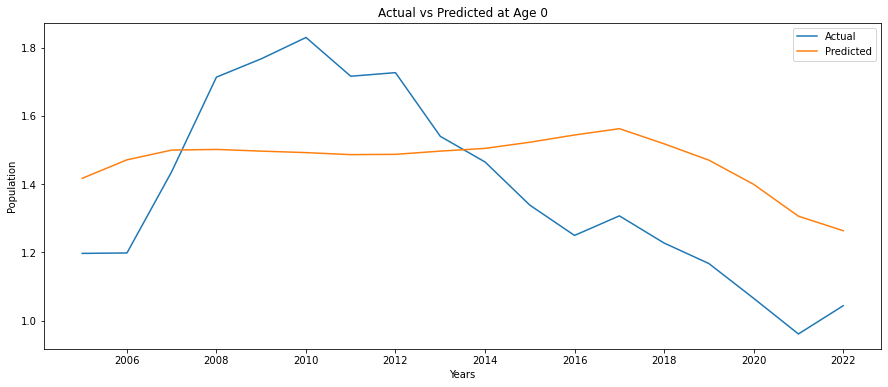

In [278]:
# Filtering for Age 0
f_0 = forecast[forecast["Age"]==0]
f_0.rename(columns={'XGBRegressor': 'Predicted', 'standardized': 'Actual'}, inplace=True)

# Plot the Actual vs Predicted graph for Age 0
plt.figure(figsize=(15, 6))
plt.plot(f_0["Year"], f_0["Actual"], label="Actual")
plt.plot(f_0["Year"], f_0["Predicted"], label="Predicted")
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Actual vs Predicted at Age 0')
plt.legend()
plt.show()

From previous graph we can recall that the data we are looking at is standardized data and not the original one. If we want to look at original form data, we need to use the inverse_transform function from StandardScaler:

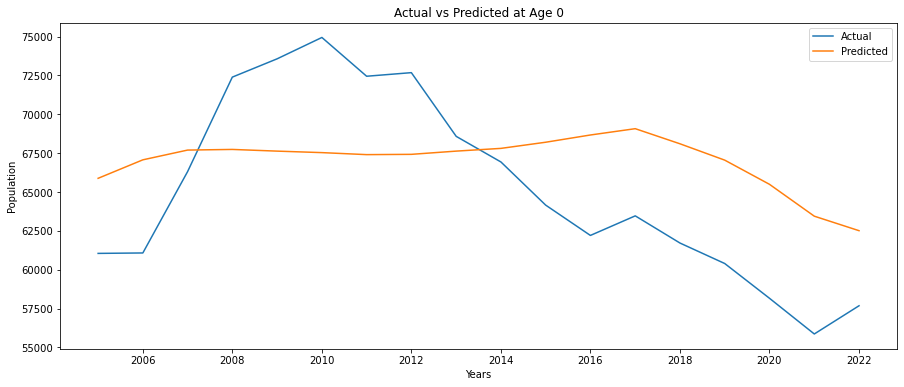

In [279]:
# Let's create a version to keep the unscaled values
f_0_unscaled = f_0.copy()

# First, create and fit the scaler
scaler = preproc.StandardScaler()
scaler.fit(concat_df[["VALUE"]])

# Let's invert back the original scale and reshape 1D array into a 2D array
f_0_unscaled["Actual"] = scaler.inverse_transform(f_0_unscaled["Actual"].values.reshape(-1, 1))
f_0_unscaled["Predicted"] = scaler.inverse_transform(f_0_unscaled["Predicted"].values.reshape(-1, 1))

# And plot the graph
plt.figure(figsize=(15, 6))
plt.plot(f_0_unscaled["Year"], f_0_unscaled["Actual"], label="Actual")
plt.plot(f_0_unscaled["Year"], f_0_unscaled["Predicted"], label="Predicted")
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Actual vs Predicted at Age 0')
plt.legend()
plt.show()

### Model comparison 

It's now time to compare all our models and how they performed:

In [160]:
# Showing all MAE results obtained
MSE_results

{'LR': 0.12420164567555969,
 'ARIMA': 0.0967141047917398,
 'VAR': 2.018573172574033,
 'XGB': 0.047561866850297604}

And graphically visualize them:

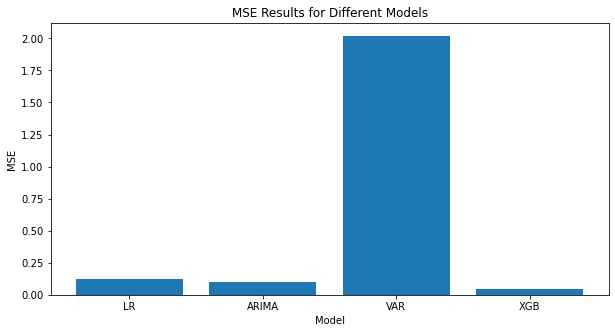

In [162]:
# Create bar chart to compare MSE values for tested models
plt.figure(figsize=(10, 5))
plt.bar(MSE_results.keys(), MSE_results.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Results for Different Models')
plt.show()

As VAR value is way higher that others, let's square them to have a better scale:

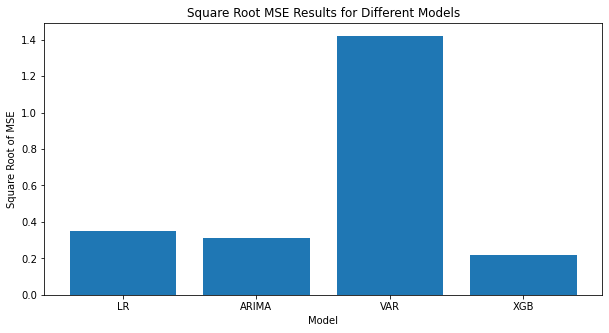

In [166]:
# Plot model comparison using square function to reduce delta with VAR
plt.figure(figsize=(10, 5))
plt.bar(MSE_results.keys(), np.sqrt(list(MSE_results.values())))
plt.xlabel('Model')
plt.ylabel('Square Root of MSE')
plt.title('Square Root MSE Results for Different Models')
plt.show()

Let's only compare LR and XGB:

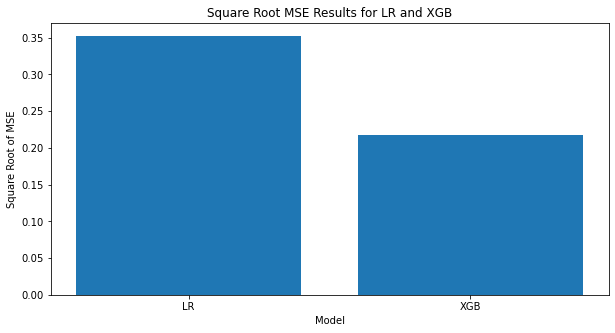

In [297]:
MSE_results_filter = {"LR":MSE_results["LR"], "XGB":MSE_results["XGB"]}

# Plot model comparison using square function to reduce delta with VAR
plt.figure(figsize=(10, 5))
plt.bar(MSE_results_filter.keys(), np.sqrt(list(MSE_results_filter.values())))
plt.xlabel('Model')
plt.ylabel('Square Root of MSE')
plt.title('Square Root MSE Results for LR and XGB')
plt.show()

Let's now compare two of the models obtained, Linear Regression and XGB.
The forecast comparison will be made, for simplicity but also for importance, on age 0. 

We start by selecting forecasted values for both models:

In [320]:
# LR Forecast for age 0
fc_lr = multi_preds.iloc[:,:1].rename(columns={"age_0":"LR"})
fc_lr["Year"] = fc_lr.index

# XGBoost Forecast for age 0
fc_xgb = f_0.iloc[:,1:].rename(columns={"Predicted":"XGB"})

Let's now merge the two datasets:

In [321]:
# Dataset merging
fc_lr_xgb = pd.merge(fc_lr, fc_xgb, on='Year', how='outer').reindex(columns=["Year","LR","XGB","Actual"]).dropna()

And rescale them to orginal value from standardization:

In [322]:
# Standardization inverse scaling
fc_lr_xgb["LR"] = scaler.inverse_transform(fc_lr_xgb["LR"].values.reshape(-1, 1))
fc_lr_xgb["XGB"] = scaler.inverse_transform(fc_lr_xgb["XGB"].values.reshape(-1, 1))
fc_lr_xgb["Actual"] = scaler.inverse_transform(fc_lr_xgb["Actual"].values.reshape(-1, 1))

We can now visually plot the data:

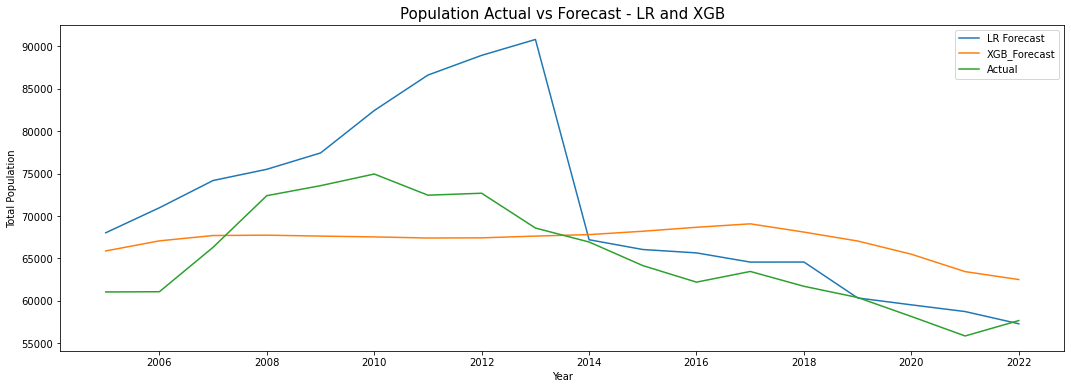

In [323]:
# Create a line plot to visualize population actual vs forecast for age 0 using LR and XGB.
plt.figure(figsize=(18, 6))
sns.lineplot(x=fc_lr_xgb["Year"], y=fc_lr_xgb["LR"], label="LR Forecast")
sns.lineplot(x=fc_lr_xgb["Year"], y=fc_lr_xgb["XGB"], label="XGB_Forecast")
sns.lineplot(x=fc_lr_xgb["Year"], y=fc_lr_xgb["Actual"], label="Actual")
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Actual vs Forecast - LR and XGB', fontsize=15)
plt.legend()
plt.show()